In [1]:
import torch
import torch.nn as nn
import os
import numpy as np
import pandas as pd
import statistics
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from pandas.plotting import register_matplotlib_converters
from matplotlib import rc
%matplotlib inline

In [2]:
!wget https://opendata.ecdc.europa.eu/covid19/virusvariant/csv/data.csv

--2023-01-12 22:45:56--  https://opendata.ecdc.europa.eu/covid19/virusvariant/csv/data.csv
Resolving opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)... 88.131.255.63
Connecting to opendata.ecdc.europa.eu (opendata.ecdc.europa.eu)|88.131.255.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6503844 (6.2M) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]   6.20M  2.87MB/s    in 2.2s    

2023-01-12 22:45:59 (2.87 MB/s) - ‘data.csv’ saved [6503844/6503844]



# Eksplorasi Data

In [3]:
df = pd.read_csv('data.csv')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant
0,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,Other,0,0,NaN
1,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.351,0,0,NaN
2,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.617.2,0,0,NaN
3,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.1.7,0,0,NaN
4,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.427/B.1.429,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
108327,Sweden,SE,2022-43,TESSy,3497.0,620,17.7,True,BA.1,1,620,0.2
108328,Sweden,SE,2022-43,TESSy,3497.0,620,17.7,True,BA.2,21,620,3.4
108329,Sweden,SE,2022-43,TESSy,3497.0,620,17.7,True,BA.4,10,620,1.6
108330,Sweden,SE,2022-43,TESSy,3497.0,620,17.7,True,BA.5,588,620,94.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108332 entries, 0 to 108331
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   country                         108332 non-null  object 
 1   country_code                    108332 non-null  object 
 2   year_week                       108332 non-null  object 
 3   source                          108332 non-null  object 
 4   new_cases                       104531 non-null  float64
 5   number_sequenced                108332 non-null  int64  
 6   percent_cases_sequenced         107188 non-null  float64
 7   valid_denominator               108332 non-null  bool   
 8   variant                         108332 non-null  object 
 9   number_detections_variant       108332 non-null  int64  
 10  number_sequenced_known_variant  108332 non-null  int64  
 11  percent_variant                 90789 non-null   object 
dtypes: bool(1), floa

In [5]:
weekly_cases = df[df["source"].str.fullmatch("TESSy") == False] 
weekly_cases = weekly_cases.drop(columns=['country_code', 'source', 'new_cases', 'number_sequenced','percent_cases_sequenced','valid_denominator','number_sequenced_known_variant','percent_variant'])
weekly_cases[['variant']]

,variant
0,Other
1,B.1.351
2,B.1.617.2
3,B.1.1.7
4,B.1.427/B.1.429
...,...
107951,C.37
107952,P.1
107953,P.3
107954,XBB


(98910, 4)

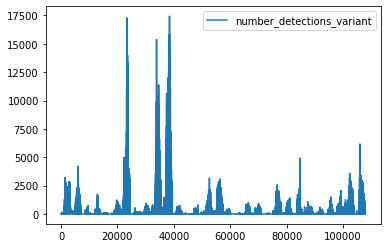

In [6]:
weekly_cases.plot()
weekly_cases.shape

# Preprocessing


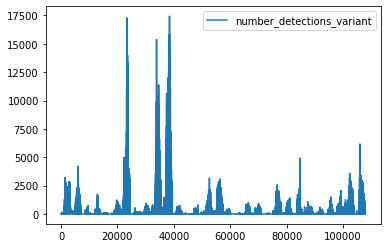

In [23]:
scaler = RobustScaler()
weekly_cases[['number_detections_variant']] = scaler.fit_transform(weekly_cases[['number_detections_variant']])
data = weekly_cases
data.plot()

In [45]:
data_list = []
variant_list = ['B.1.1.7','B.1.351','B.1.427/B.1.429','B.1.525','B.1.616','B.1.617.1','B.1.617.2', 'B.1.620','B.1.621','BA.1','BA.2','BA.2.75','BA.4','BA.5','BQ.1','C.37','Other','P.1','P.3', 'UNK','XBB']
for variant in variant_list:
    data1 = data.drop(columns=['variant'])[data['variant'].str.fullmatch(variant)]
    data1 = data1.pivot(index = 'year_week', columns = 'country', values = 'number_detections_variant').rename_axis(index=None, columns=None)
    data_list.append(data1)


for i in range(len(data_list)):
    print(variant_list[i])
    print(data_list[i])

B.1.1.7
         Austria  Belgium  Bulgaria  Croatia  Cyprus  Czechia  Denmark  \
2020-01      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2020-02      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2020-03      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2020-04      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2020-05      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
...          ...      ...       ...      ...     ...      ...      ...   
2022-48      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2022-49      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2022-50      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2022-51      0.0      0.0       0.0      0.0     0.0      0.0      0.0   
2022-52      0.0      0.0       0.0      0.0     0.0      0.0      0.0   

         Estonia  Finland  France  ...  Malta  Netherlands  Norway  Poland  \
2020-01      0.0      0.0

In [47]:
data_list[16]

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Norway,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-48,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-49,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,8.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2022-50,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-51,1.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [49]:
data_before_df = pd.DataFrame(data_list[16])
data_before_df.to_csv('data_before.csv')

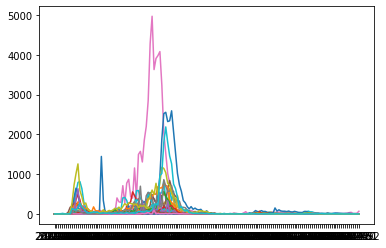

In [37]:
plt.plot(data_list[16])
plt.show()

In [50]:
norm_data = scaler.fit_transform(data_list[16])
norm_data_df = pd.DataFrame(norm_data, columns = [country_list])
norm_data_df.to_csv('data_after.csv')

In [ ]:
data_length = len(data_list[1])
train_size = int(0.8 * data_length)
train_data_list = []
test_data_list = []

for data in data_list:
  train_data = data[:train_size]
  test_data = data[train_size-10:]
  train_data_list.append(train_data)
  test_data_list.append(test_data) 

# Model LSTM dan RNN

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.layer_size = layer_size
        self.lstm = nn.LSTM(input_size, hidden_size, layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        # self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.layer_size, x.size(0), self.hidden_size, device=x.device).requires_grad_()
        c0 = torch.zeros(self.layer_size, x.size(0), self.hidden_size, device=x.device).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = out[:, -1, :]
        out = self.linear(out)
        # out = self.relu(out)
        return out

In [ ]:
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size, bidirectional = True):
        super(BiLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.layer_size = layer_size
        self.lstm = nn.LSTM(input_size, hidden_size, layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        # self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.layer_size, x.size(0), self.hidden_size, device=x.device).requires_grad_()
        c0 = torch.zeros(self.layer_size, x.size(0), self.hidden_size, device=x.device).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = out[:, -1, :]
        out = self.linear(out)
        # out = self.relu(out)
        return out

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.layer_size = layer_size
        self.rnn = nn.RNN(input_size, hidden_size, layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        # self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.layer_size, x.size(0), self.hidden_size, device=x.device).requires_grad_()
        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]
        out = self.linear(out)
        # out = self.relu(out)
        return out

In [ ]:
# model parameter value
def model_variant():
    lstm = LSTM(input_size=1, hidden_size=25, layer_size=4, output_size=1)
    bilstm = BiLSTM(input_size=1, hidden_size=25, layer_size=4, output_size=1)
    rnn = RNN(input_size=1, hidden_size=25, layer_size=4, output_size=1)

    model_list = [[lstm, 'lstm'], [bilstm, 'bilstm'], [rnn, 'rnn']]

    return model_list

# Sequence Data Univariate


In [ ]:
def make_seq(data, seq_length):
    x_seq = []
    y_seq = []

    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        x_seq.append(x)
        y_seq.append(y)

    x_seq = np.array(x_seq)
    y_seq = np.array(y_seq)

    x_seq = torch.tensor(x_seq, dtype=torch.float32).reshape(-1, seq_length, 1)
    y_seq = torch.tensor(y_seq)

    return x_seq, y_seq

In [ ]:
def training_step(variant, country, model, model_name, x_train, y_train, optimizer, criterion, epochs):
    for epoch in range(epochs):
        model.train()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train.reshape(-1,1).float())
        loss1 = torch.sqrt(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #epoch == epochs/2-1 or 
        if epoch == epochs-1:
            print("variant : ", variant, ", model type : ", model_name, ", country : ", country, ", epoch : ", epoch+1, ", MSE : ", loss.item(), ", RMSE : ", loss1.item())

    return y_pred, loss, loss1

In [ ]:
def testing_step(variant, country, model, model_name, x_test, y_test, criterion):
    for epoch in range(epochs):
        model.eval()
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test.reshape(-1,1).float())
        loss1 = torch.sqrt(loss)

        if epoch == epochs-1:
                print("variant : ", variant, ", model type : ", model_name, ", country : ", country, ", epoch : ", epoch+1, ", MSE : ", loss.item(), ", RMSE : ", loss1.item())
    
    return y_pred, loss, loss1

# Univariate

## Training

In [ ]:
# Training Process
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {}.".format(device))
model_variant_list = [] #List dari fungsi model_variant
mse_final_train = []
rmse_final_train = []
for k, train_data in enumerate(train_data_list):
    variant = variant_list[k]  # variant1, ...., variantn
    model_list = model_variant()
    all_model_in_a_variant = [] #List 3 Model untuk tiap varian
    mse_model_train = []
    rmse_model_train = []
    for model, model_name in model_list:
        model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        criterion = nn.MSELoss()
        epochs = 1
        fig = plt.figure(figsize=(16,4))
        for j, country in enumerate(train_data):
            if j > 0:
                checkpoint = torch.load('checkpoint.pth.tar')
                model.load_state_dict(checkpoint['model_state_dict'])
                optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            data = train_data[country]
            x_train, y_train = make_seq(data, 10)
            x_train, y_train = x_train.to(device), y_train.to(device)
            y_pred, loss, loss1 = training_step(variant, country, model, model_name, x_train, y_train, optimizer, criterion, epochs)
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict()
            }, 'checkpoint.pth.tar')

            ax = fig.add_axes([0.4*(j%6), 1.2*(j//6), 0.35, 1])
            ax = plt.gca()
            ax.plot(y_train.cpu(), label="original")
            ax = plt.gca()
            ax.plot(y_pred.cpu().detach().numpy(), label="predicted")
            plt.xlabel('Minggu')
            plt.title(country)
            plt.legend()
        plt.show()

        mse_model_train.append(loss.item())
        rmse_model_train.append(loss1.item())
        all_model_in_a_variant.append([model, model_name])

    mse_final_train.append(mse_model_train)
    rmse_final_train.append(rmse_model_train)
    model_variant_list.append(all_model_in_a_variant)

Output hidden; open in https://colab.research.google.com to view.

## Loss Training

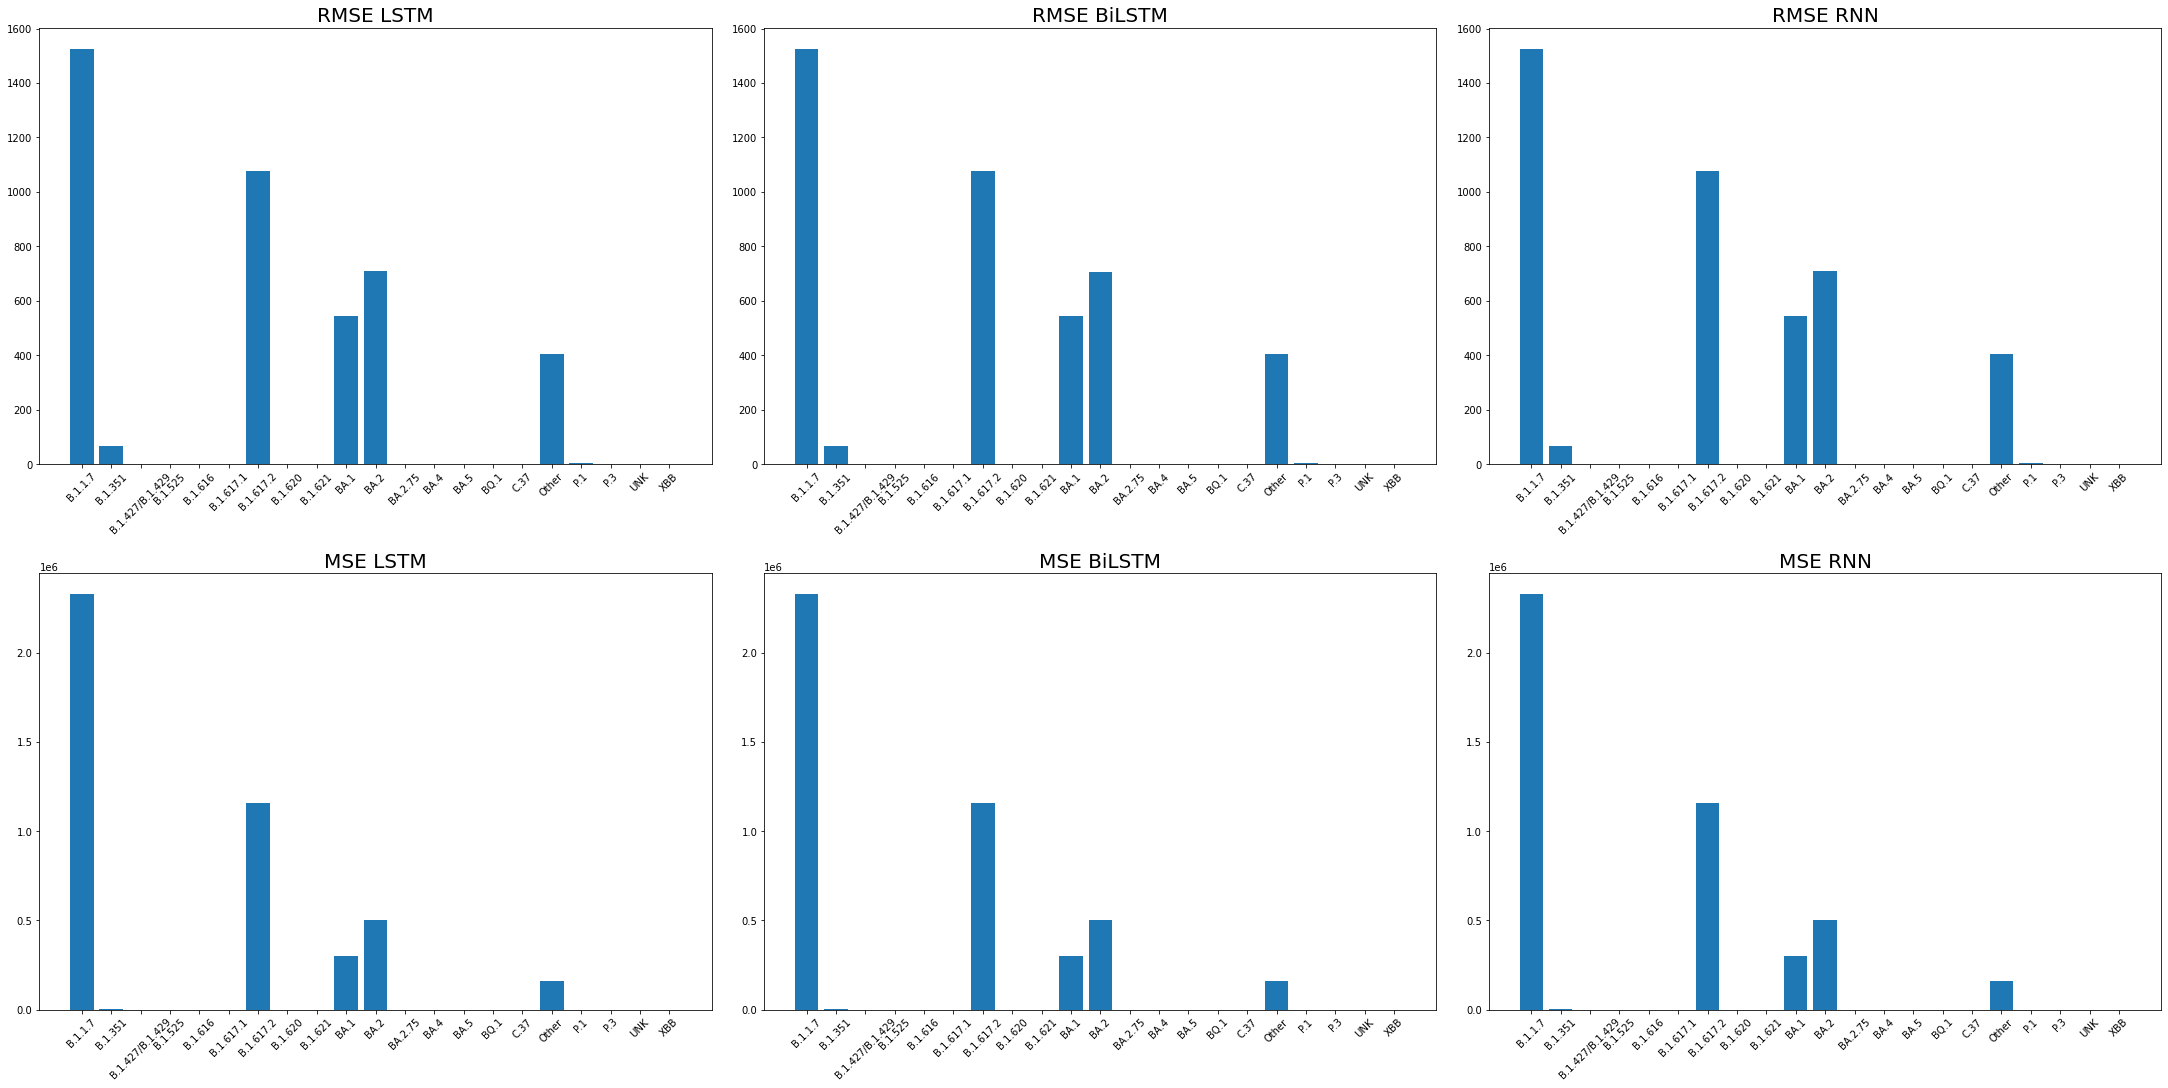


             Variant      MSE LSTM
0           B.1.1.7  2.330032e+06
1           B.1.351  4.332543e+03
2   B.1.427/B.1.429  1.743739e-02
3           B.1.525  1.006778e+00
4           B.1.616  1.532114e-05
5         B.1.617.1  6.176446e-02
6         B.1.617.2  1.156475e+06
7           B.1.620  4.358821e-02
8           B.1.621  3.699276e-02
9              BA.1  2.979745e+05
10             BA.2  5.008225e+05
11          BA.2.75  1.936433e-05
12             BA.4  3.284018e-01
13             BA.5  1.214871e-01
14             BQ.1  6.911885e-05
15             C.37  3.626665e-02
16            Other  1.626327e+05
17              P.1  1.001082e+01
18              P.3  3.532829e-02
19              UNK  3.907080e+00
20              XBB  1.452636e-04 
 
             Variant    MSE BiLSTM
0           B.1.1.7  2.330517e+06
1           B.1.351  4.322378e+03
2   B.1.427/B.1.429  1.846401e-02
3           B.1.525  5.458441e-01
4           B.1.616  1.669210e-06
5         B.1.617.1  6.298898e-02
6       

In [ ]:
mse_lstm_train = []
mse_bilstm_train = [] 
mse_rnn_train = []
for i in mse_final_train:
    mse_lstm_train.append(i[0])
    mse_bilstm_train.append(i[1])
    mse_rnn_train.append(i[2])

rmse_lstm_train = []
rmse_bilstm_train = [] 
rmse_rnn_train = []
for j in rmse_final_train:
    rmse_lstm_train.append(j[0])
    rmse_bilstm_train.append(j[1])
    rmse_rnn_train.append(j[2])

tickvalues = range(0,len(rmse_lstm_train))

figure, axis = plt.subplots(2, 3, figsize=(30,15), constrained_layout = True)
plt.setp(axis, xticks=tickvalues, xticklabels=variant_list)

axis[0, 0].bar([k for k in range (len(rmse_lstm_train))], rmse_lstm_train)
axis[0, 0].set_title("RMSE LSTM", fontsize=20)
axis[0, 0].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[0, 1].bar([k for k in range (len(rmse_bilstm_train))], rmse_bilstm_train)
axis[0, 1].set_title("RMSE BiLSTM", fontsize=20)
axis[0, 1].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[0, 2].bar([k for k in range (len(rmse_rnn_train))], rmse_rnn_train)
axis[0, 2].set_title("RMSE RNN", fontsize=20)
axis[0, 2].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[1, 0].bar([k for k in range (len(mse_lstm_train))], mse_lstm_train)
axis[1, 0].set_title("MSE LSTM", fontsize=20)
axis[1, 0].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[1, 1].bar([k for k in range (len(mse_bilstm_train))], mse_bilstm_train)
axis[1, 1].set_title("MSE BiLSTM", fontsize=20)
axis[1, 1].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[1, 2].bar([k for k in range (len(mse_rnn_train))], mse_rnn_train)
axis[1, 2].set_title("MSE RNN", fontsize=20)
axis[1, 2].set_xticklabels(variant_list, rotation=45, fontsize=10)
plt.show()

mse_lstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE LSTM': mse_lstm_train})
mse_bilstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE BiLSTM': mse_bilstm_train})
mse_rnn_train_df = pd.DataFrame({'Variant': variant_list,'MSE RNN': mse_rnn_train})
print("\n", mse_lstm_train_df, "\n", "\n", mse_bilstm_train_df, "\n", "\n", mse_rnn_train_df, "\n", "\n")

rmse_lstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE LSTM': rmse_lstm_train})
rmse_bilstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE BiLSTM': rmse_bilstm_train})
rmse_rnn_train_df = pd.DataFrame({'Variant': variant_list,'MSE RNN': rmse_rnn_train})
print("\n", rmse_lstm_train_df, "\n", "\n", rmse_bilstm_train_df, "\n", "\n", rmse_rnn_train_df, "\n", "\n")

## Testing

Using cpu.
LSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.1.7 , model type :  lstm , country :  Austria , epoch :  1 , MSE :  39.82732391357422 , RMSE :  6.31088924407959
variant :  B.1.1.7 , model type :  lstm , country :  Belgium , epoch :  1 , MSE :  39.82732391357422 , RMSE :  6.31088924407959
variant :  B.1.1.7 , model type :  lstm , country :  Bulgaria , epoch :  1 , MSE :  39.82732391357422 , RMSE :  6.31088924407959
variant :  B.1.1.7 , model type :  lstm , country :  Croatia , epoch :  1 , MSE :  39.82732391357422 , RMSE :  6.31088924407959
variant :  B.1.1.7 , model type :  lstm , country :  Cyprus , epoch :  1 , MSE :  39.82732391357422 , RMSE :  6.31088924407959
variant :  B.1.1.7 , model type :  lstm , country :  Czechia , epoch :  1 , MSE :  39.82732391357422 , RMSE :  6.31088924407959
variant :  B.1.1.7 , model type :  lstm , country :  Denmark , epoch :  1 , MSE :  39.82732391357

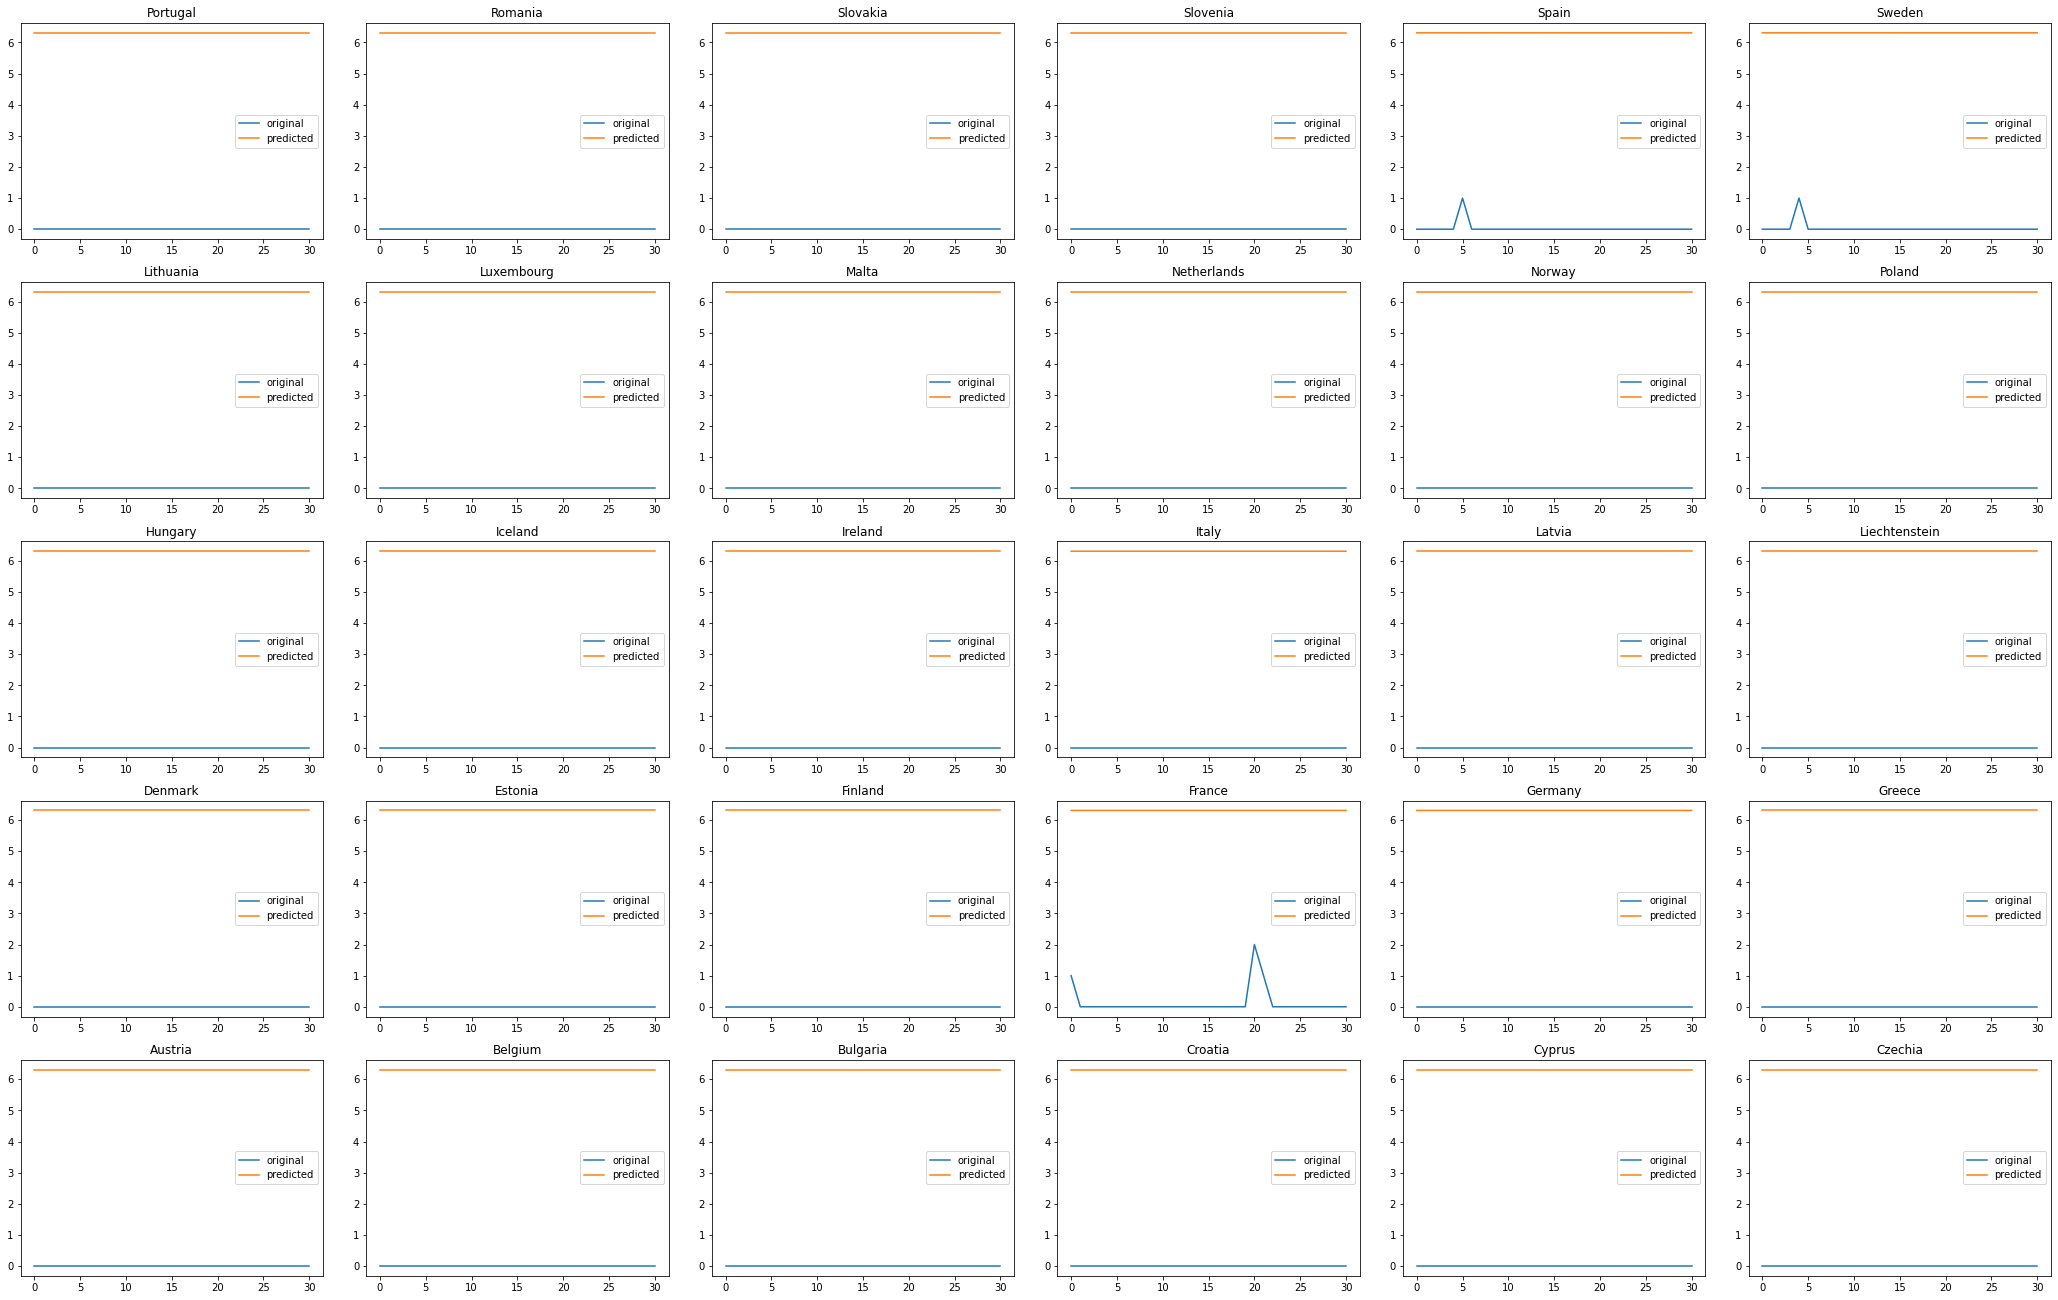

BiLSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.1.7 , model type :  bilstm , country :  Austria , epoch :  1 , MSE :  34.796390533447266 , RMSE :  5.898846626281738
variant :  B.1.1.7 , model type :  bilstm , country :  Belgium , epoch :  1 , MSE :  34.796390533447266 , RMSE :  5.898846626281738
variant :  B.1.1.7 , model type :  bilstm , country :  Bulgaria , epoch :  1 , MSE :  34.796390533447266 , RMSE :  5.898846626281738
variant :  B.1.1.7 , model type :  bilstm , country :  Croatia , epoch :  1 , MSE :  34.796390533447266 , RMSE :  5.898846626281738
variant :  B.1.1.7 , model type :  bilstm , country :  Cyprus , epoch :  1 , MSE :  34.796390533447266 , RMSE :  5.898846626281738
variant :  B.1.1.7 , model type :  bilstm , country :  Czechia , epoch :  1 , MSE :  34.796390533447266 , RMSE :  5.898846626281738
variant :  B.1.1.7 , model type :  bilstm , country :  Denmark , epoch :  1 , MSE 

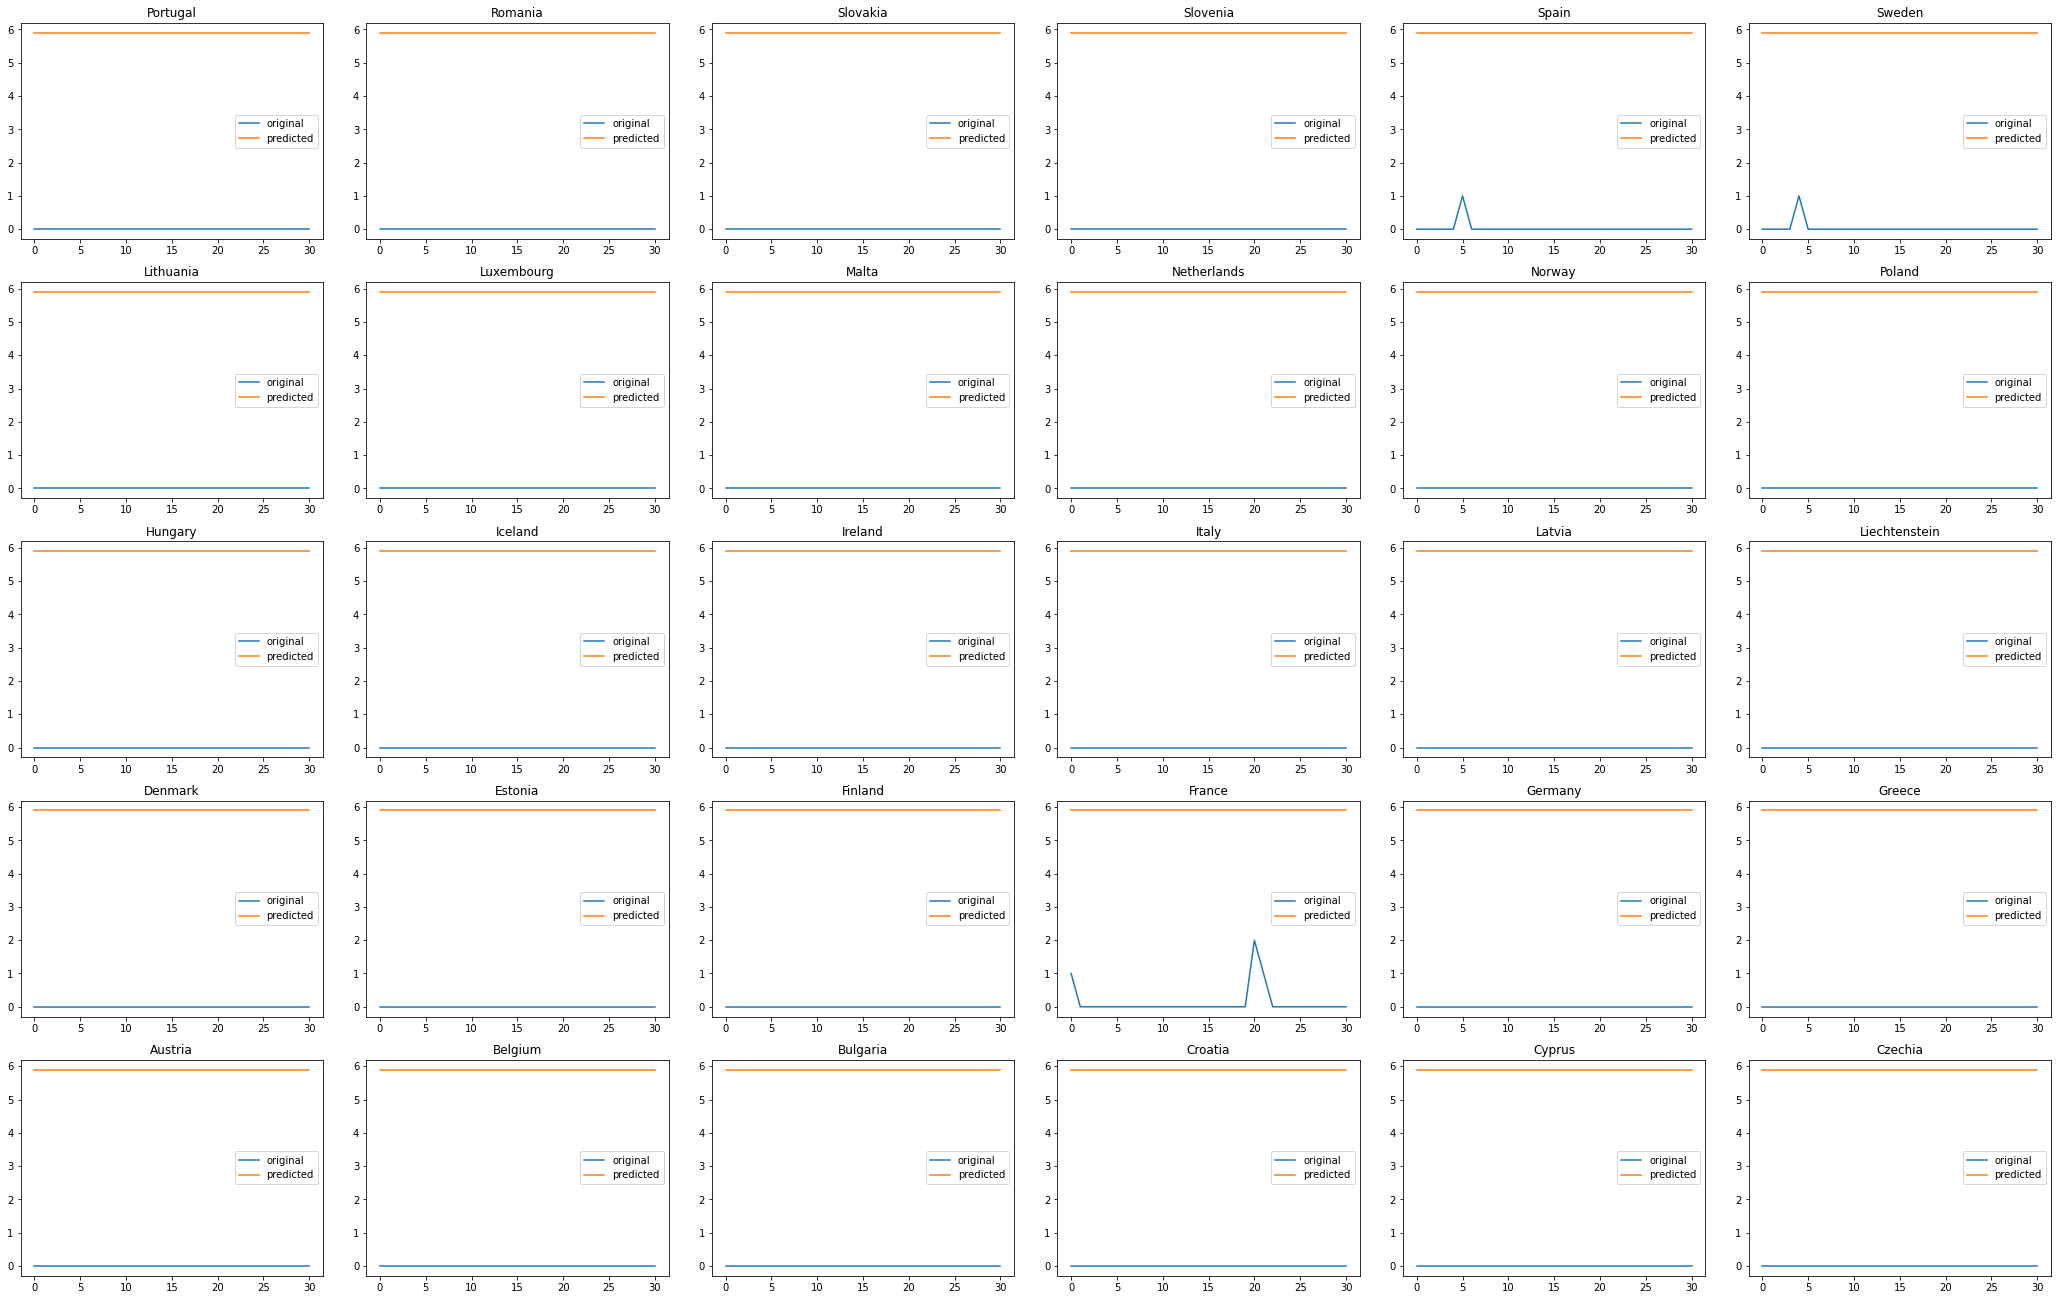

RNN(
  (rnn): RNN(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.1.7 , model type :  rnn , country :  Austria , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.594694137573242
variant :  B.1.1.7 , model type :  rnn , country :  Belgium , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.594694137573242
variant :  B.1.1.7 , model type :  rnn , country :  Bulgaria , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.594694137573242
variant :  B.1.1.7 , model type :  rnn , country :  Croatia , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.594694137573242
variant :  B.1.1.7 , model type :  rnn , country :  Cyprus , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.594694137573242
variant :  B.1.1.7 , model type :  rnn , country :  Czechia , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.594694137573242
variant :  B.1.1.7 , model type :  rnn , country :  Denmark , epoch :  1 , MSE :  43.489990234375 , RMSE :  6.5946941375732

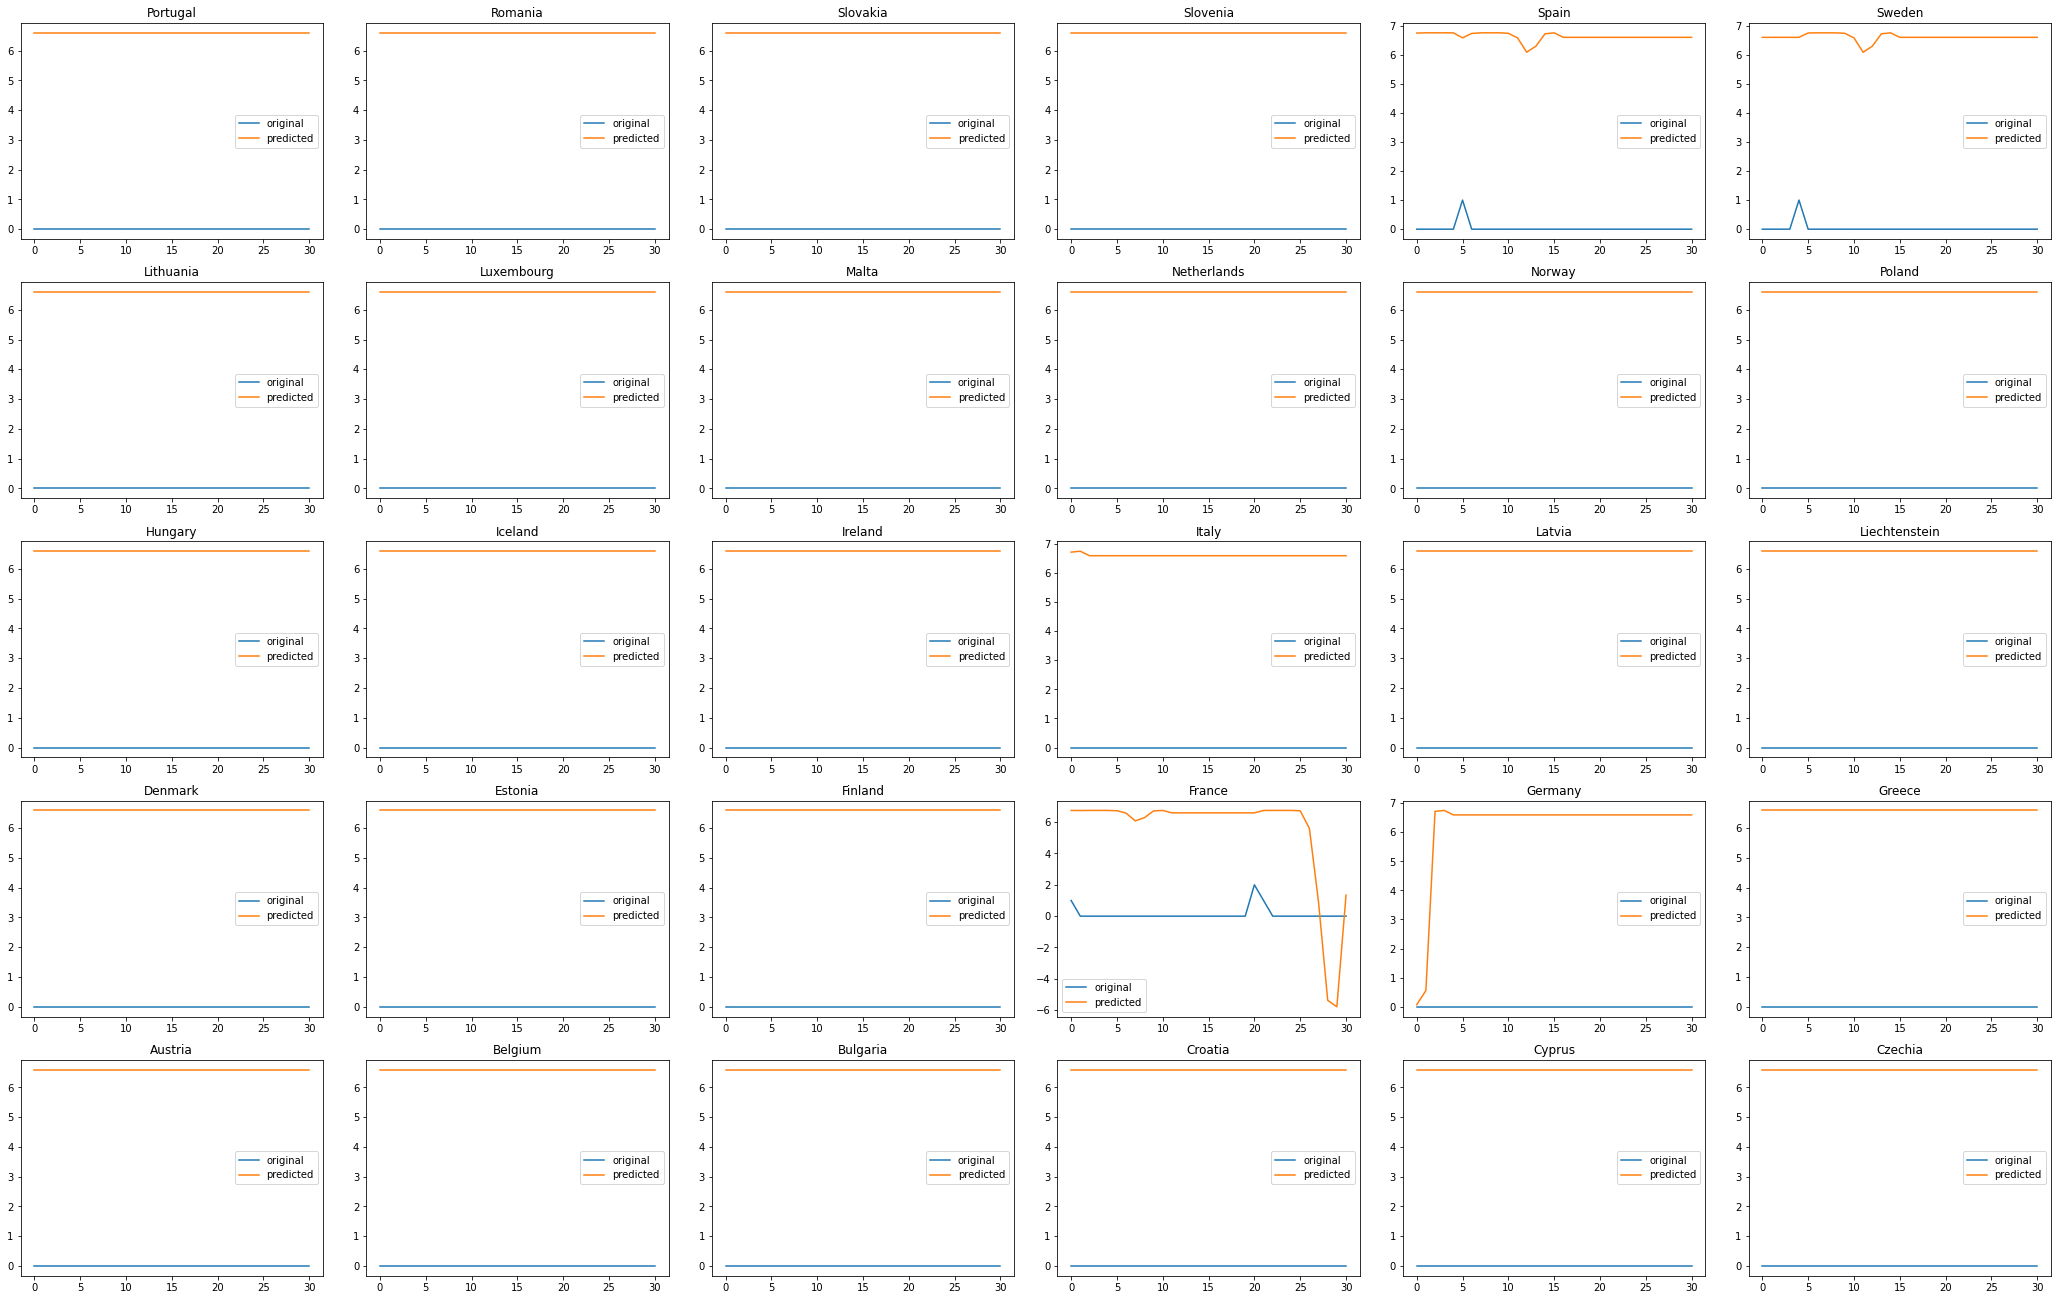

LSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.351 , model type :  lstm , country :  Austria , epoch :  1 , MSE :  0.4012419283390045 , RMSE :  0.6334366202354431
variant :  B.1.351 , model type :  lstm , country :  Belgium , epoch :  1 , MSE :  0.4012419283390045 , RMSE :  0.6334366202354431
variant :  B.1.351 , model type :  lstm , country :  Bulgaria , epoch :  1 , MSE :  0.4012419283390045 , RMSE :  0.6334366202354431
variant :  B.1.351 , model type :  lstm , country :  Croatia , epoch :  1 , MSE :  0.4012419283390045 , RMSE :  0.6334366202354431
variant :  B.1.351 , model type :  lstm , country :  Cyprus , epoch :  1 , MSE :  0.4012419283390045 , RMSE :  0.6334366202354431
variant :  B.1.351 , model type :  lstm , country :  Czechia , epoch :  1 , MSE :  0.4012419283390045 , RMSE :  0.6334366202354431
variant :  B.1.351 , model type :  lstm , country :  Denmark , epoch :  1 , MSE :  0.40124

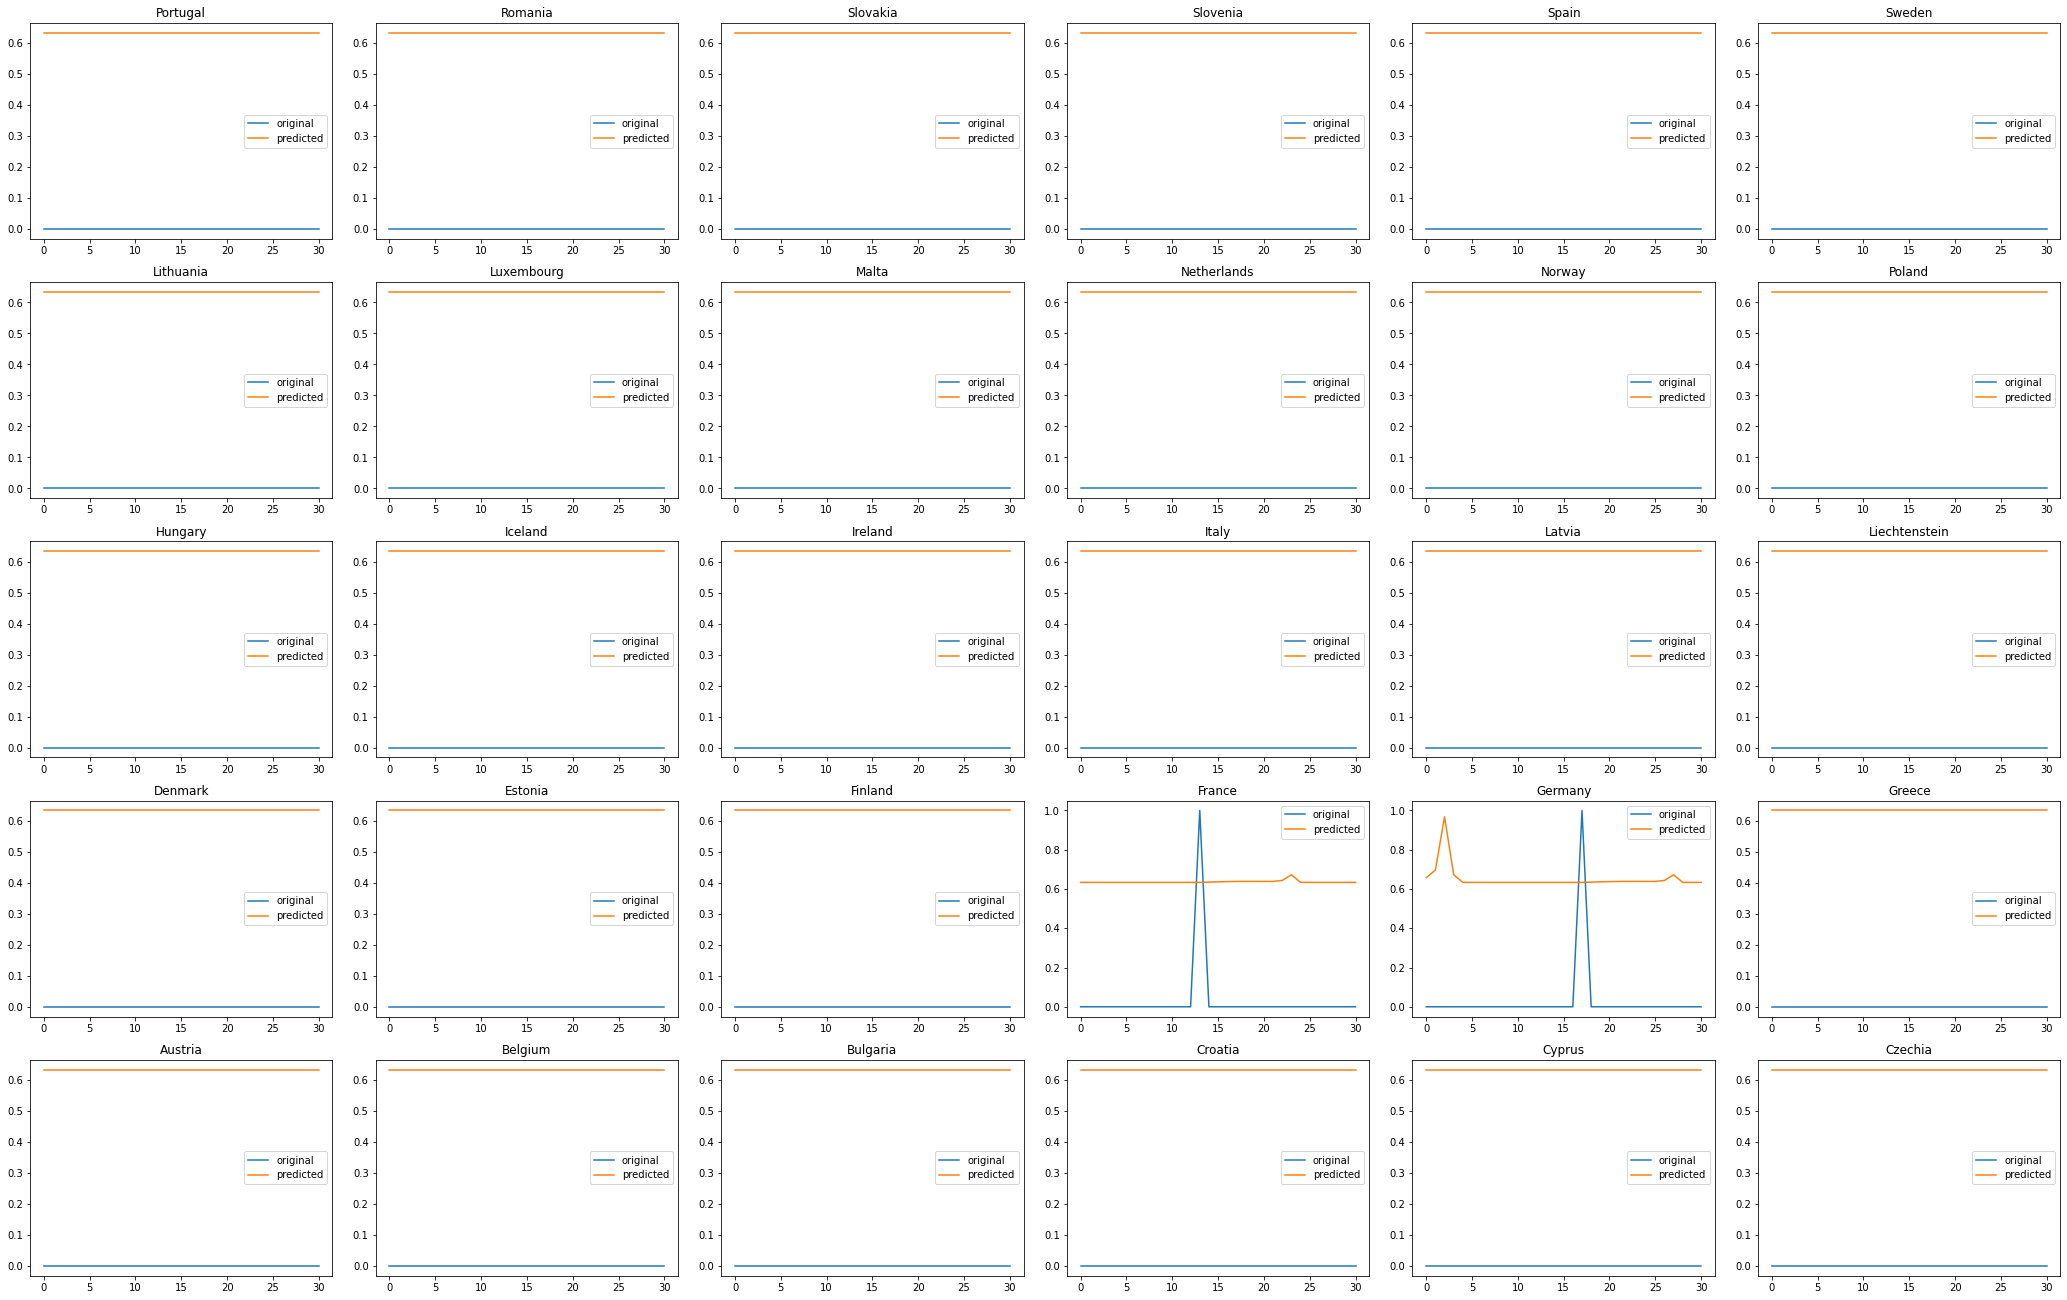

BiLSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.351 , model type :  bilstm , country :  Austria , epoch :  1 , MSE :  0.3662841022014618 , RMSE :  0.6052141189575195
variant :  B.1.351 , model type :  bilstm , country :  Belgium , epoch :  1 , MSE :  0.3662841022014618 , RMSE :  0.6052141189575195
variant :  B.1.351 , model type :  bilstm , country :  Bulgaria , epoch :  1 , MSE :  0.3662841022014618 , RMSE :  0.6052141189575195
variant :  B.1.351 , model type :  bilstm , country :  Croatia , epoch :  1 , MSE :  0.3662841022014618 , RMSE :  0.6052141189575195
variant :  B.1.351 , model type :  bilstm , country :  Cyprus , epoch :  1 , MSE :  0.3662841022014618 , RMSE :  0.6052141189575195
variant :  B.1.351 , model type :  bilstm , country :  Czechia , epoch :  1 , MSE :  0.3662841022014618 , RMSE :  0.6052141189575195
variant :  B.1.351 , model type :  bilstm , country :  Denmark , epoch :  1 

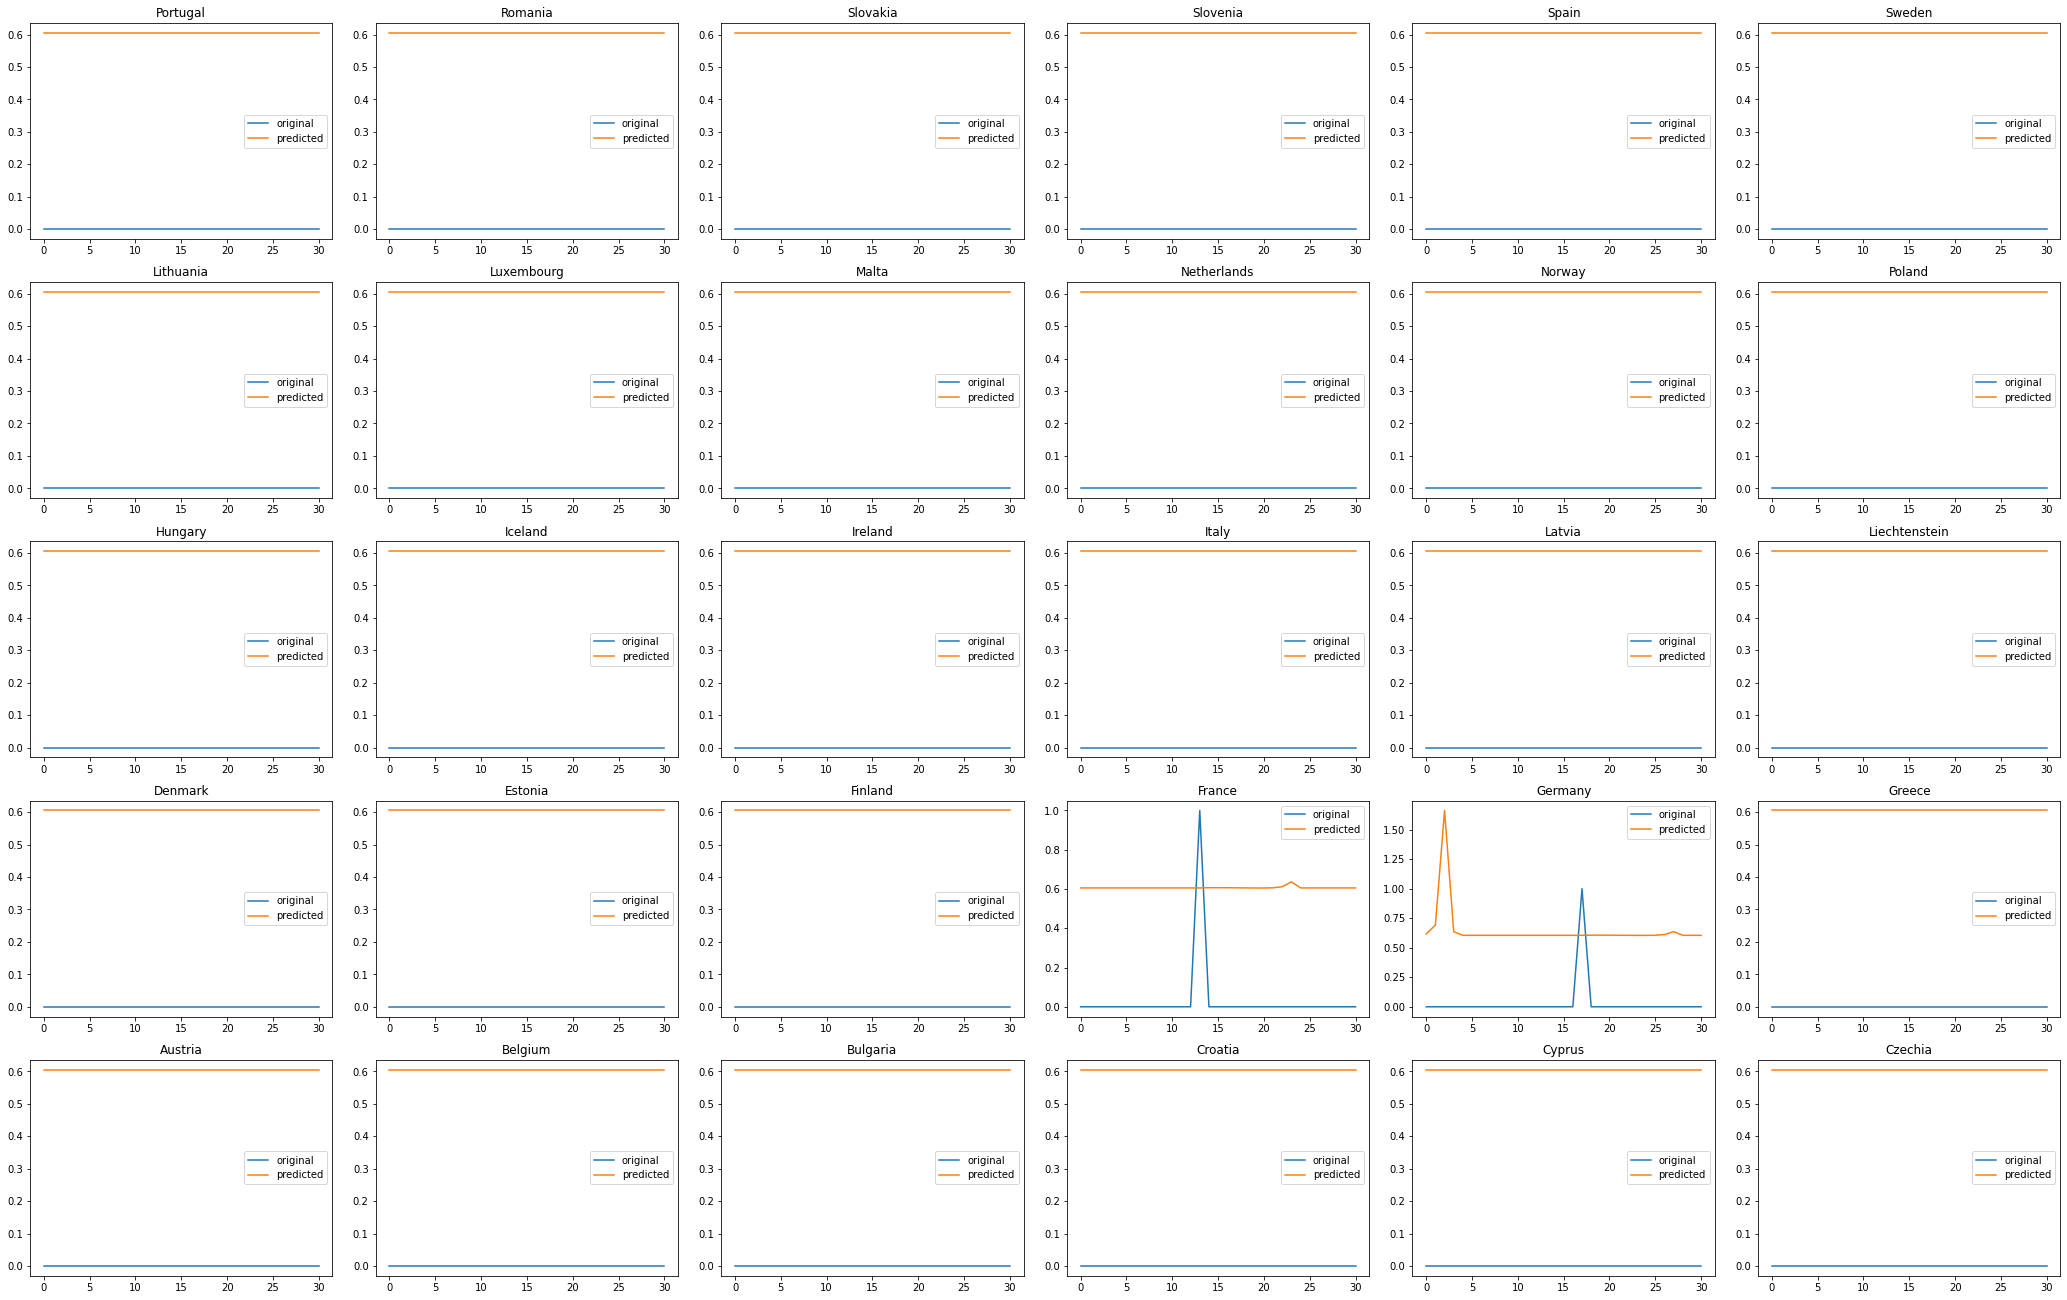

RNN(
  (rnn): RNN(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.351 , model type :  rnn , country :  Austria , epoch :  1 , MSE :  0.05053543671965599 , RMSE :  0.22480088472366333
variant :  B.1.351 , model type :  rnn , country :  Belgium , epoch :  1 , MSE :  0.05053543671965599 , RMSE :  0.22480088472366333
variant :  B.1.351 , model type :  rnn , country :  Bulgaria , epoch :  1 , MSE :  0.05053543671965599 , RMSE :  0.22480088472366333
variant :  B.1.351 , model type :  rnn , country :  Croatia , epoch :  1 , MSE :  0.05053543671965599 , RMSE :  0.22480088472366333
variant :  B.1.351 , model type :  rnn , country :  Cyprus , epoch :  1 , MSE :  0.05053543671965599 , RMSE :  0.22480088472366333
variant :  B.1.351 , model type :  rnn , country :  Czechia , epoch :  1 , MSE :  0.05053543671965599 , RMSE :  0.22480088472366333
variant :  B.1.351 , model type :  rnn , country :  Denmark , epoch :  1 , MSE :  0.050

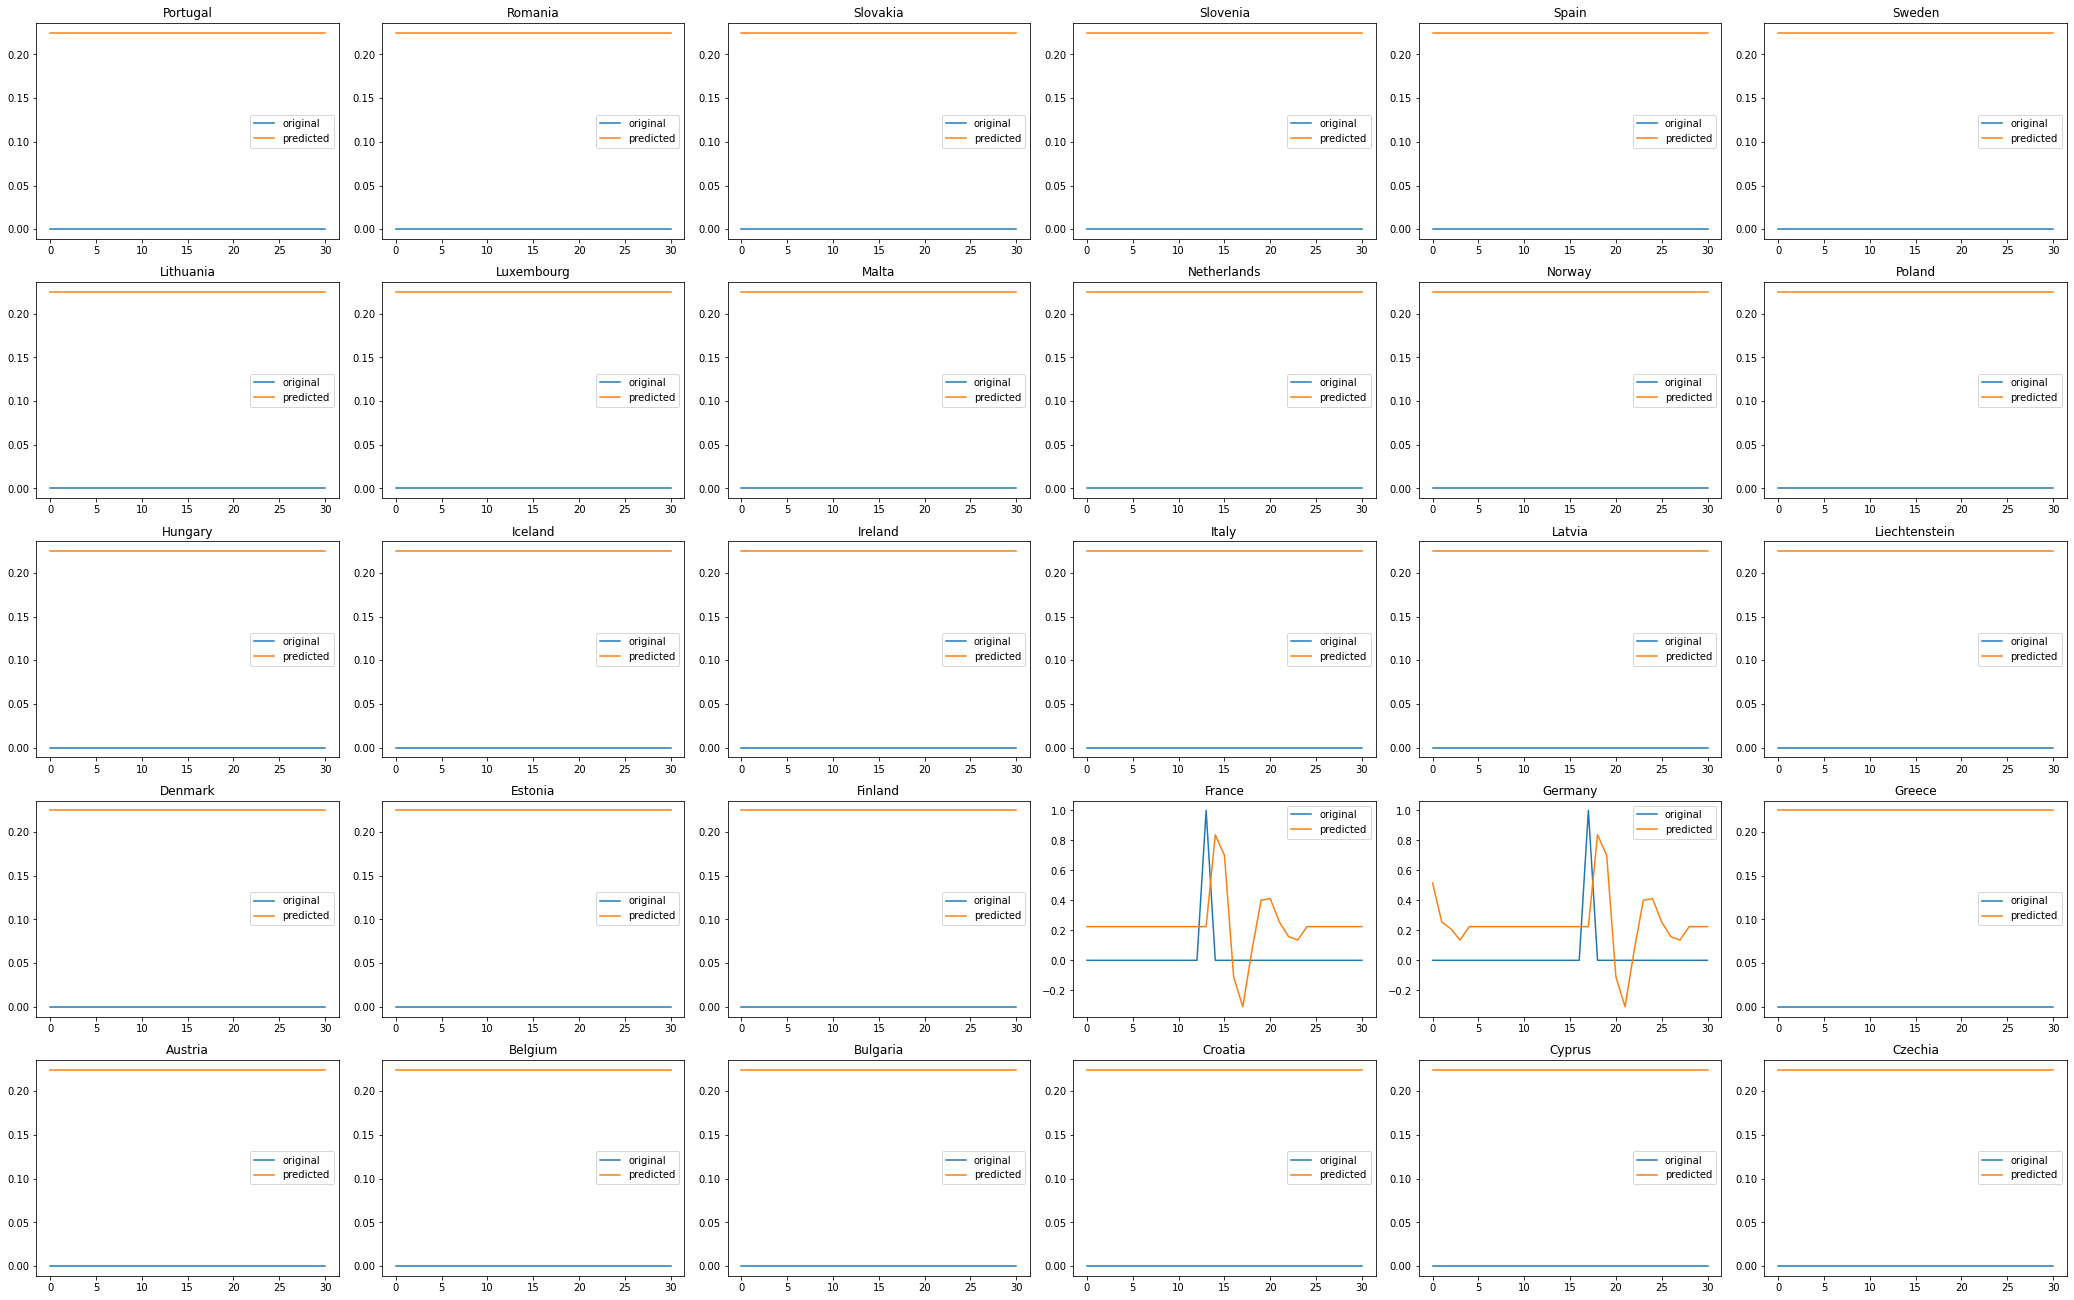

LSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.427/B.1.429 , model type :  lstm , country :  Austria , epoch :  1 , MSE :  0.000209719393751584 , RMSE :  0.014481691643595695
variant :  B.1.427/B.1.429 , model type :  lstm , country :  Belgium , epoch :  1 , MSE :  0.000209719393751584 , RMSE :  0.014481691643595695
variant :  B.1.427/B.1.429 , model type :  lstm , country :  Bulgaria , epoch :  1 , MSE :  0.000209719393751584 , RMSE :  0.014481691643595695
variant :  B.1.427/B.1.429 , model type :  lstm , country :  Croatia , epoch :  1 , MSE :  0.000209719393751584 , RMSE :  0.014481691643595695
variant :  B.1.427/B.1.429 , model type :  lstm , country :  Cyprus , epoch :  1 , MSE :  0.000209719393751584 , RMSE :  0.014481691643595695
variant :  B.1.427/B.1.429 , model type :  lstm , country :  Czechia , epoch :  1 , MSE :  0.000209719393751584 , RMSE :  0.014481691643595695
variant :  B.1.427

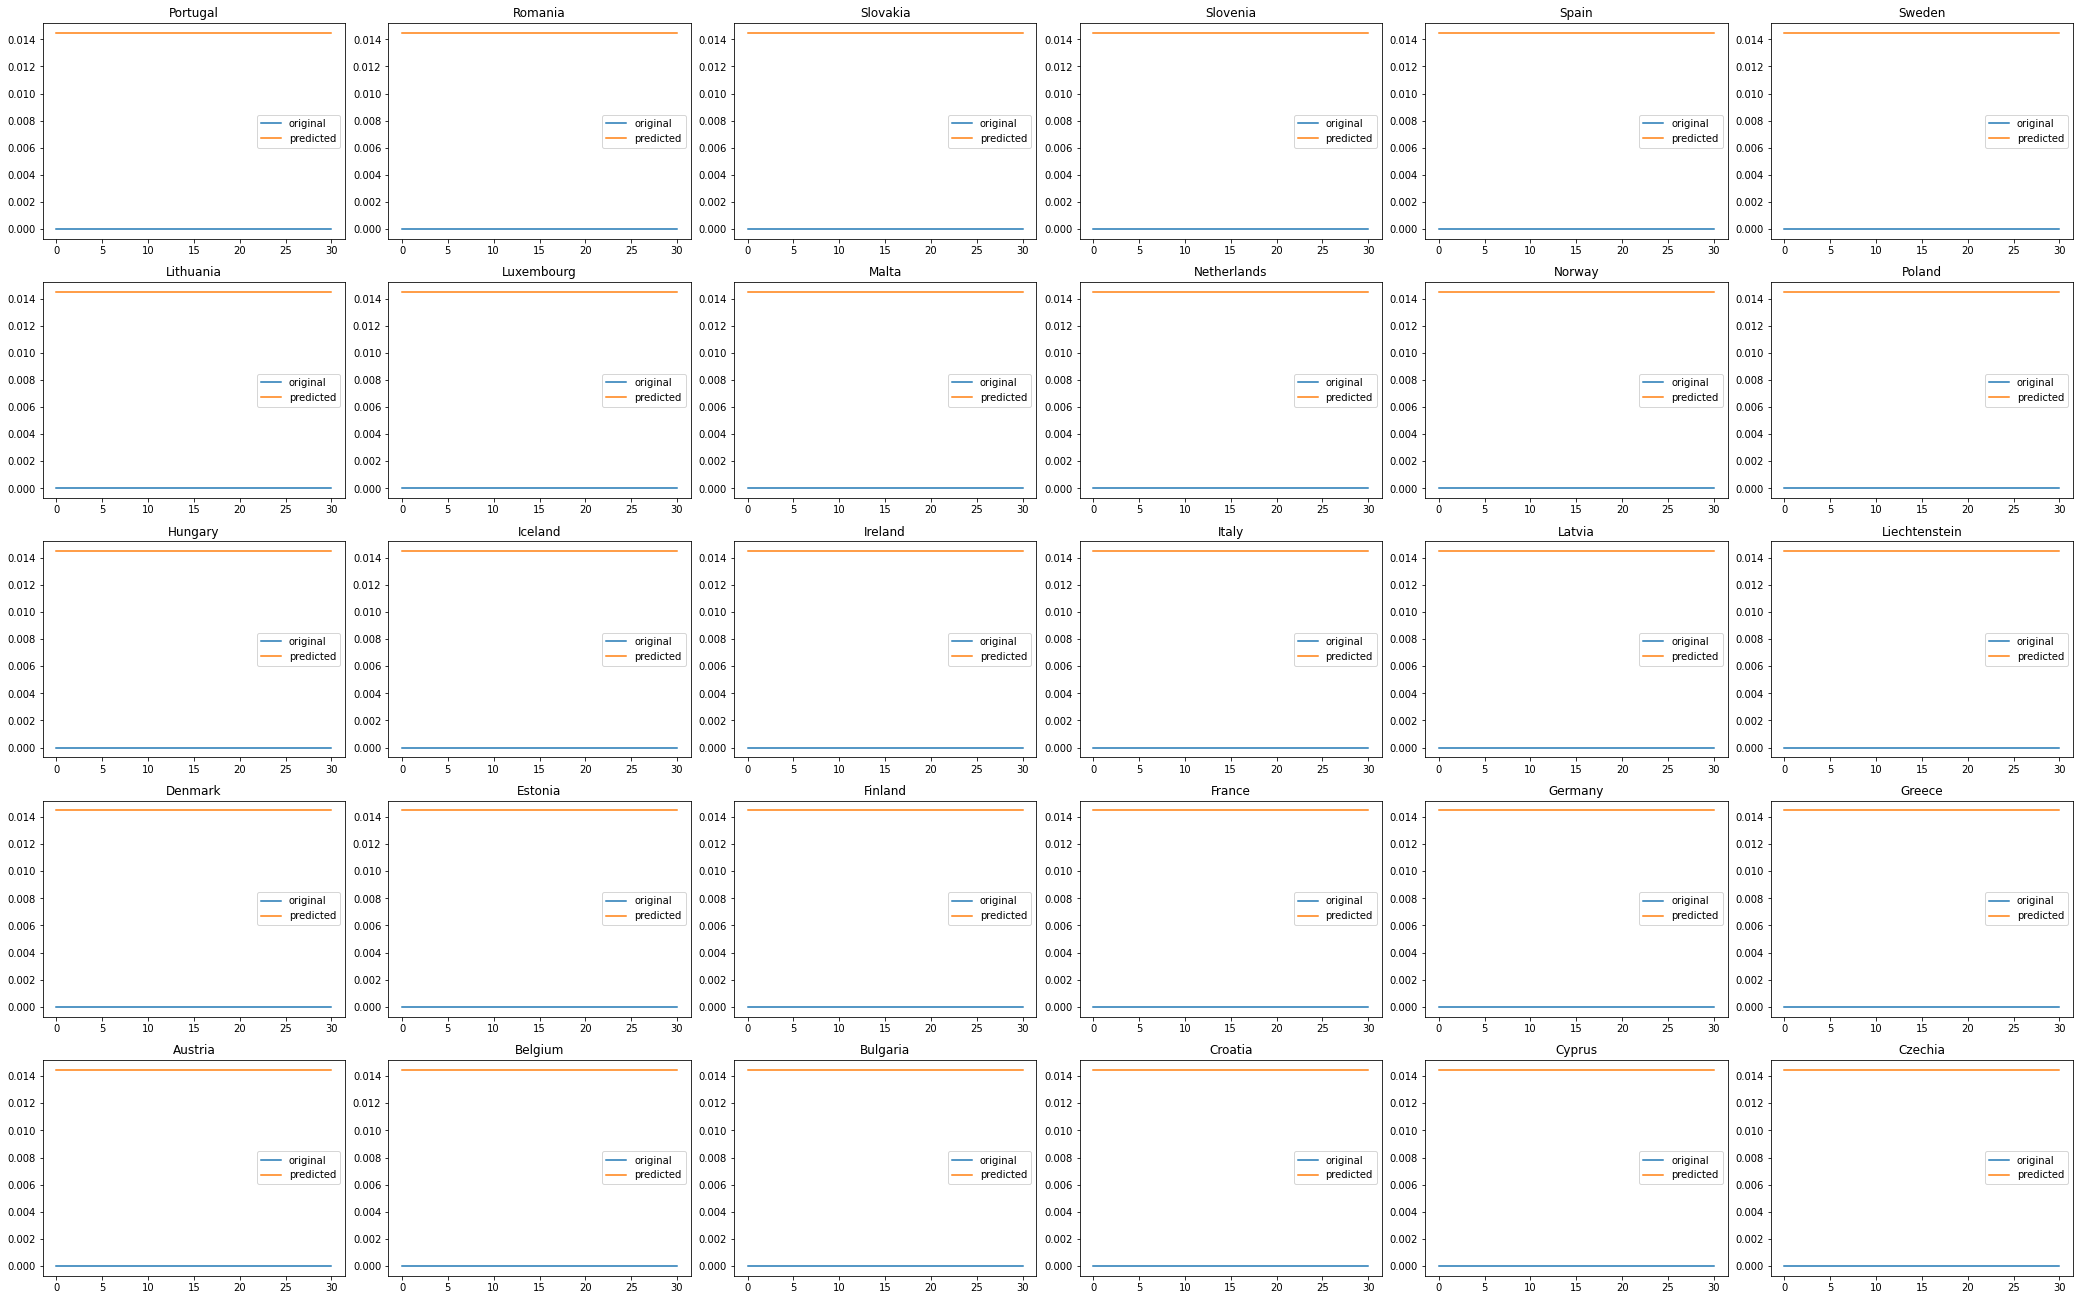

BiLSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.427/B.1.429 , model type :  bilstm , country :  Austria , epoch :  1 , MSE :  0.00012025501200696453 , RMSE :  0.010966084897518158
variant :  B.1.427/B.1.429 , model type :  bilstm , country :  Belgium , epoch :  1 , MSE :  0.00012025501200696453 , RMSE :  0.010966084897518158
variant :  B.1.427/B.1.429 , model type :  bilstm , country :  Bulgaria , epoch :  1 , MSE :  0.00012025501200696453 , RMSE :  0.010966084897518158
variant :  B.1.427/B.1.429 , model type :  bilstm , country :  Croatia , epoch :  1 , MSE :  0.00012025501200696453 , RMSE :  0.010966084897518158
variant :  B.1.427/B.1.429 , model type :  bilstm , country :  Cyprus , epoch :  1 , MSE :  0.00012025501200696453 , RMSE :  0.010966084897518158
variant :  B.1.427/B.1.429 , model type :  bilstm , country :  Czechia , epoch :  1 , MSE :  0.00012025501200696453 , RMSE :  0.01096608489

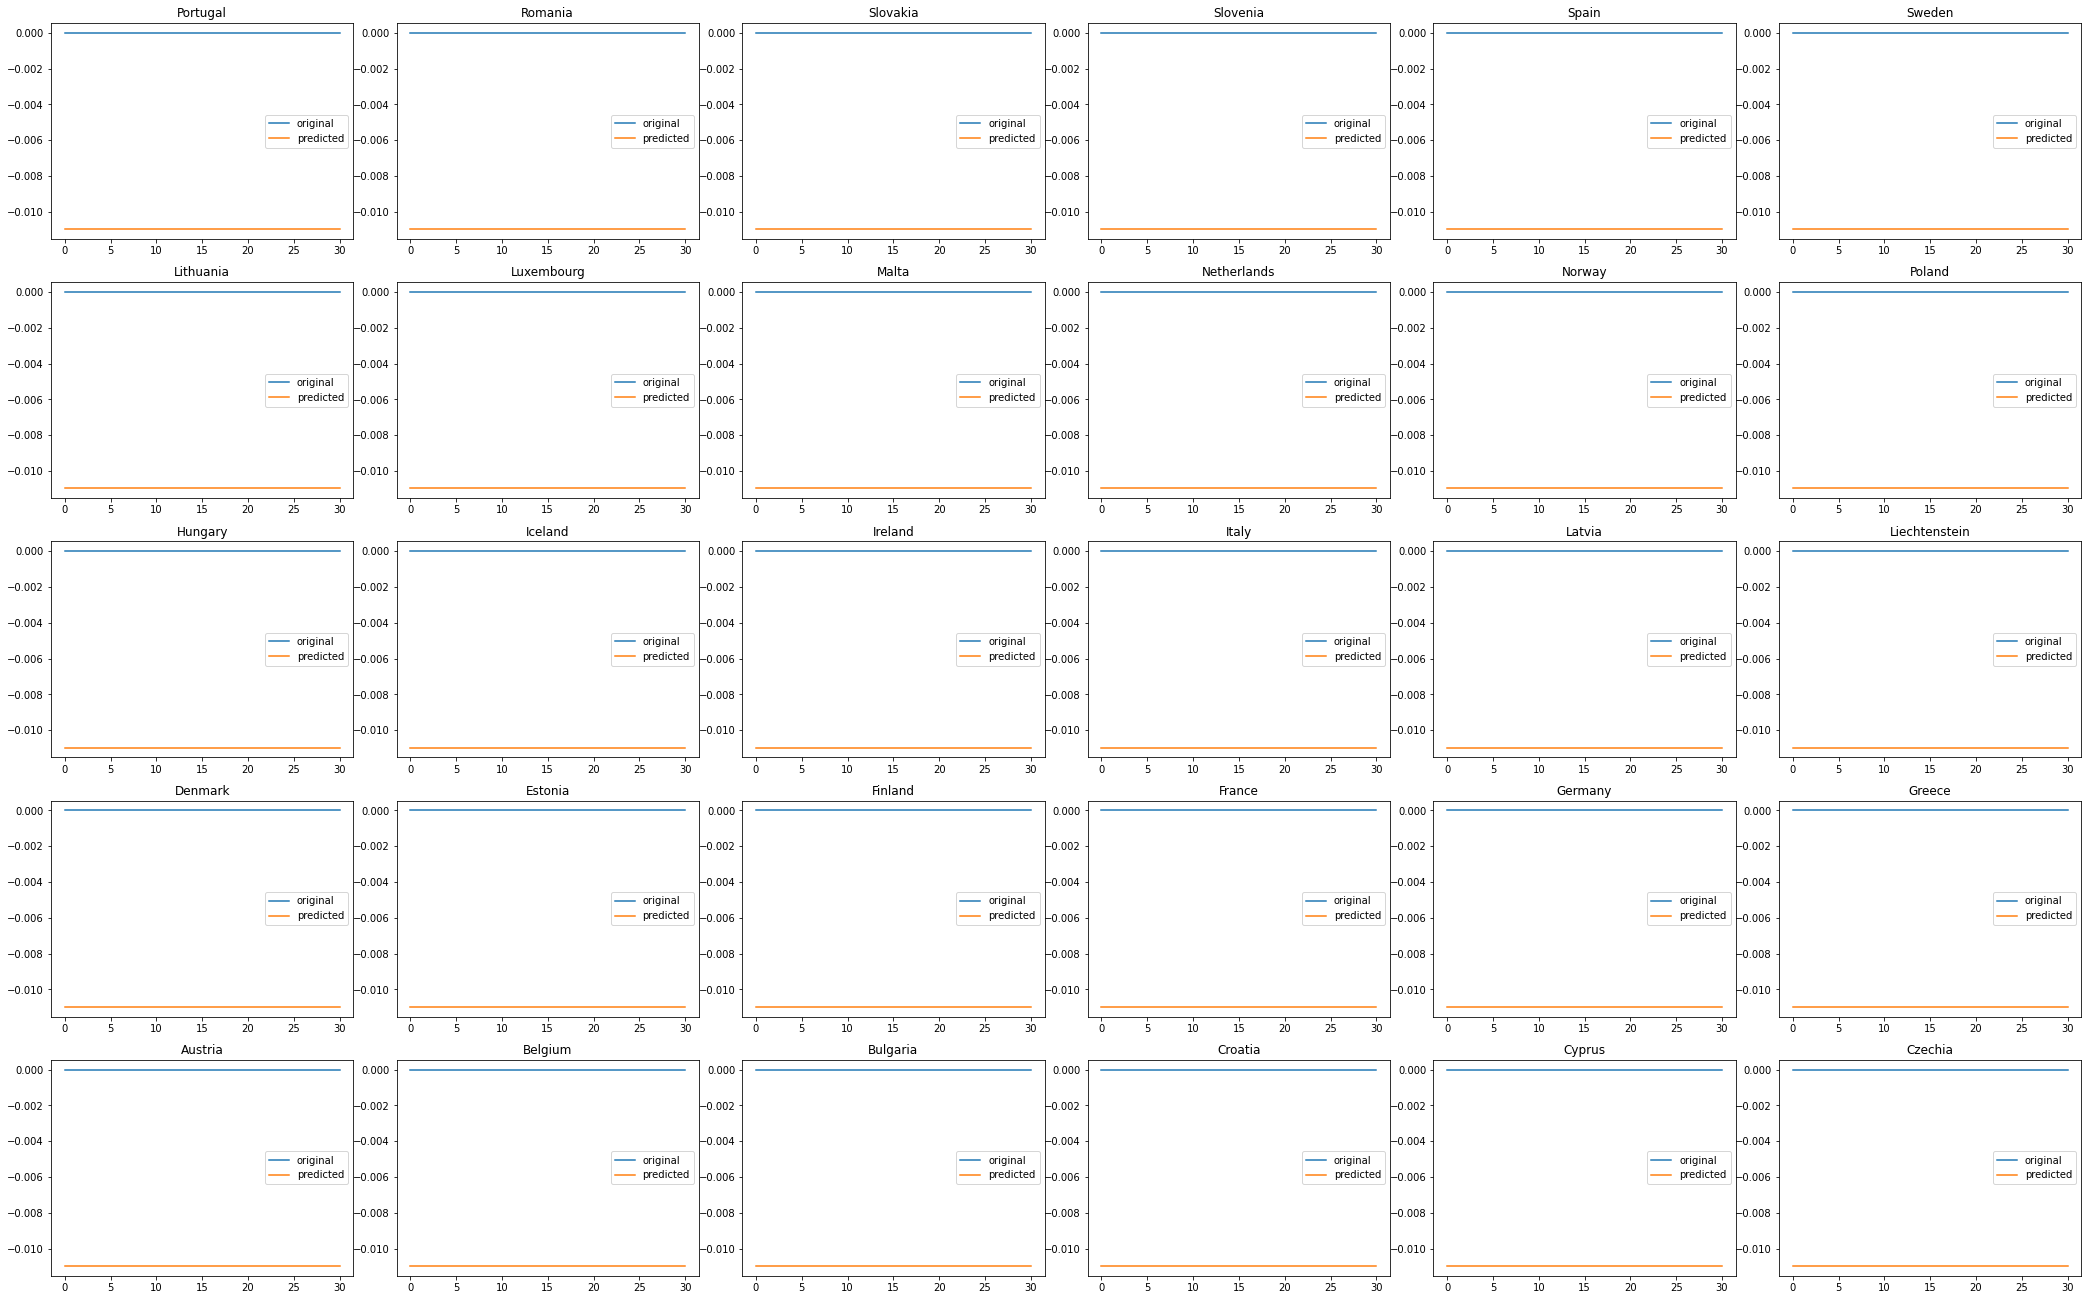

RNN(
  (rnn): RNN(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.427/B.1.429 , model type :  rnn , country :  Austria , epoch :  1 , MSE :  0.00011657951836241409 , RMSE :  0.010797199793159962
variant :  B.1.427/B.1.429 , model type :  rnn , country :  Belgium , epoch :  1 , MSE :  0.00011657951836241409 , RMSE :  0.010797199793159962
variant :  B.1.427/B.1.429 , model type :  rnn , country :  Bulgaria , epoch :  1 , MSE :  0.00011657951836241409 , RMSE :  0.010797199793159962
variant :  B.1.427/B.1.429 , model type :  rnn , country :  Croatia , epoch :  1 , MSE :  0.00011657951836241409 , RMSE :  0.010797199793159962
variant :  B.1.427/B.1.429 , model type :  rnn , country :  Cyprus , epoch :  1 , MSE :  0.00011657951836241409 , RMSE :  0.010797199793159962
variant :  B.1.427/B.1.429 , model type :  rnn , country :  Czechia , epoch :  1 , MSE :  0.00011657951836241409 , RMSE :  0.010797199793159962
variant :  B.1.

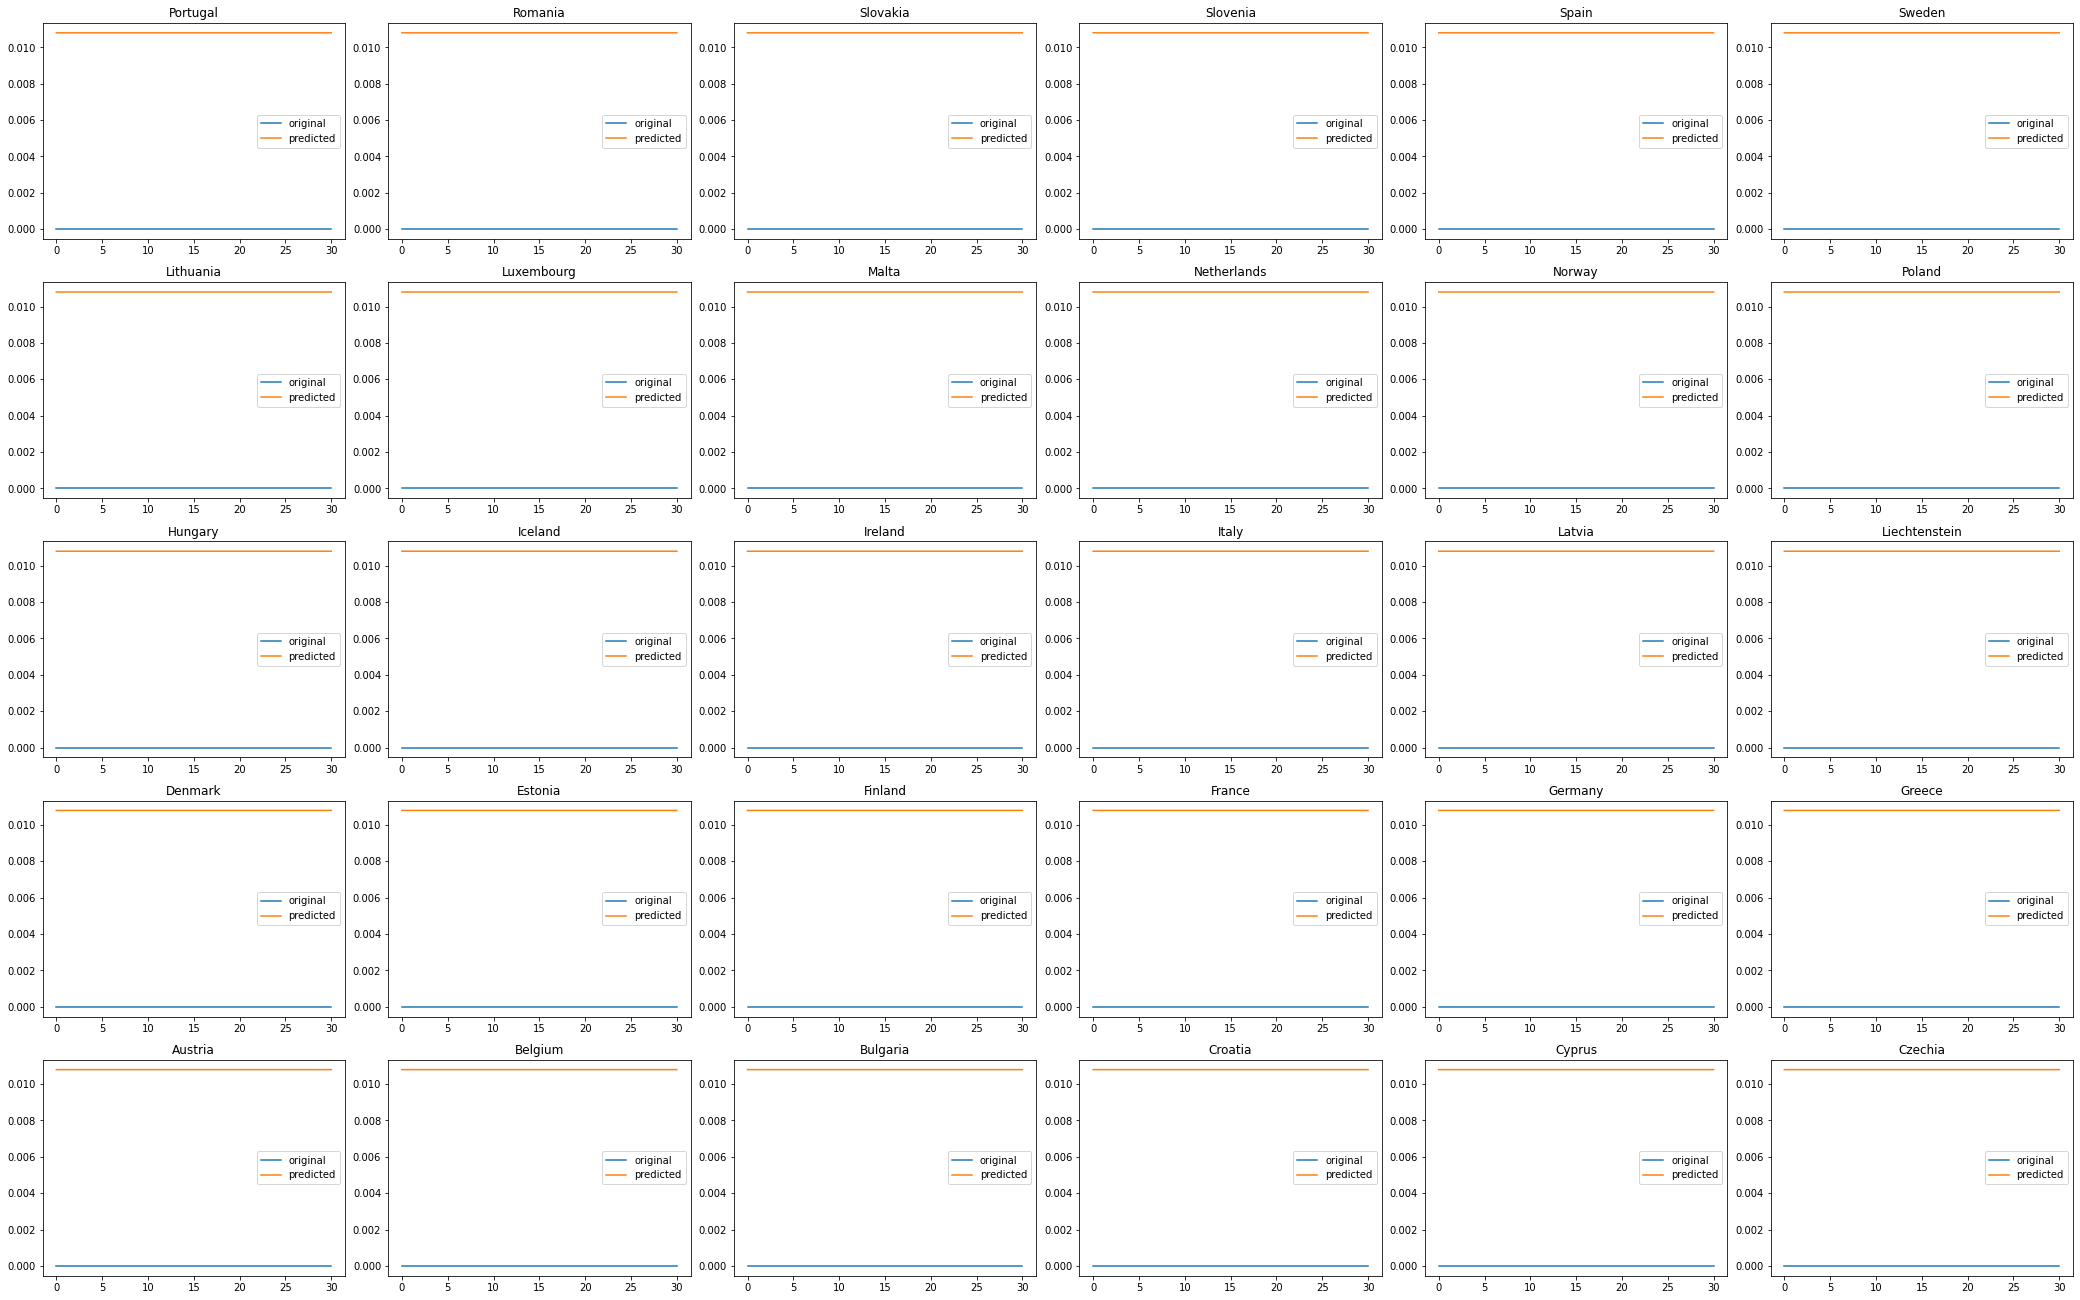

LSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.525 , model type :  lstm , country :  Austria , epoch :  1 , MSE :  0.0011714915744960308 , RMSE :  0.03422705829143524
variant :  B.1.525 , model type :  lstm , country :  Belgium , epoch :  1 , MSE :  0.0011714915744960308 , RMSE :  0.03422705829143524
variant :  B.1.525 , model type :  lstm , country :  Bulgaria , epoch :  1 , MSE :  0.0011714915744960308 , RMSE :  0.03422705829143524
variant :  B.1.525 , model type :  lstm , country :  Croatia , epoch :  1 , MSE :  0.0011714915744960308 , RMSE :  0.03422705829143524
variant :  B.1.525 , model type :  lstm , country :  Cyprus , epoch :  1 , MSE :  0.0011714915744960308 , RMSE :  0.03422705829143524
variant :  B.1.525 , model type :  lstm , country :  Czechia , epoch :  1 , MSE :  0.0011714915744960308 , RMSE :  0.03422705829143524
variant :  B.1.525 , model type :  lstm , country :  Denmark , epo

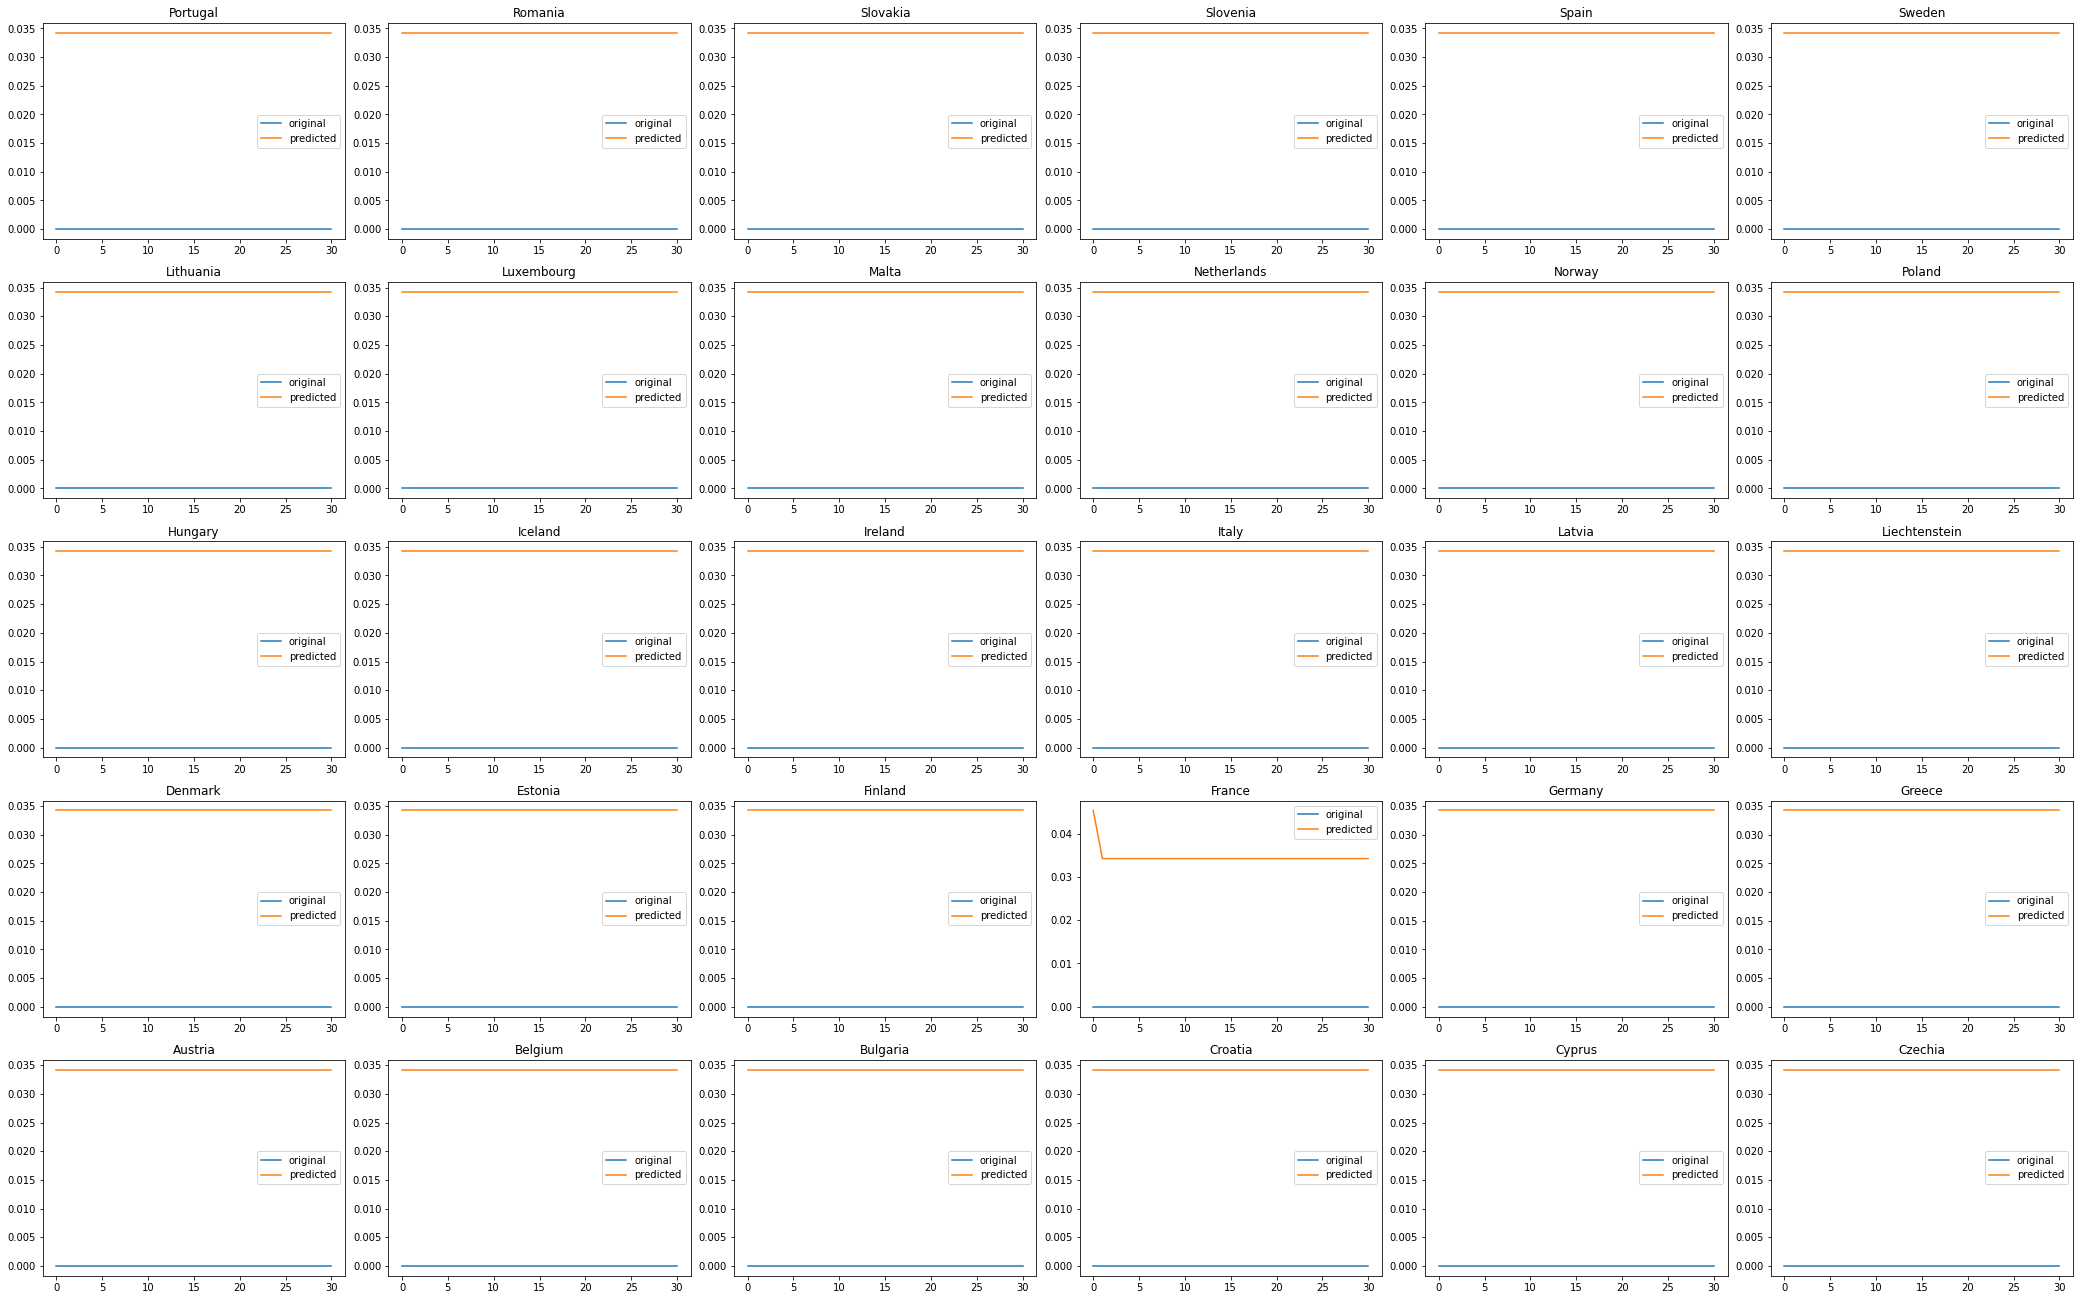

BiLSTM(
  (lstm): LSTM(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.525 , model type :  bilstm , country :  Austria , epoch :  1 , MSE :  0.02025020308792591 , RMSE :  0.1423032134771347
variant :  B.1.525 , model type :  bilstm , country :  Belgium , epoch :  1 , MSE :  0.02025020308792591 , RMSE :  0.1423032134771347
variant :  B.1.525 , model type :  bilstm , country :  Bulgaria , epoch :  1 , MSE :  0.02025020308792591 , RMSE :  0.1423032134771347
variant :  B.1.525 , model type :  bilstm , country :  Croatia , epoch :  1 , MSE :  0.02025020308792591 , RMSE :  0.1423032134771347
variant :  B.1.525 , model type :  bilstm , country :  Cyprus , epoch :  1 , MSE :  0.02025020308792591 , RMSE :  0.1423032134771347
variant :  B.1.525 , model type :  bilstm , country :  Czechia , epoch :  1 , MSE :  0.02025020308792591 , RMSE :  0.1423032134771347
variant :  B.1.525 , model type :  bilstm , country :  Denmark , epoch

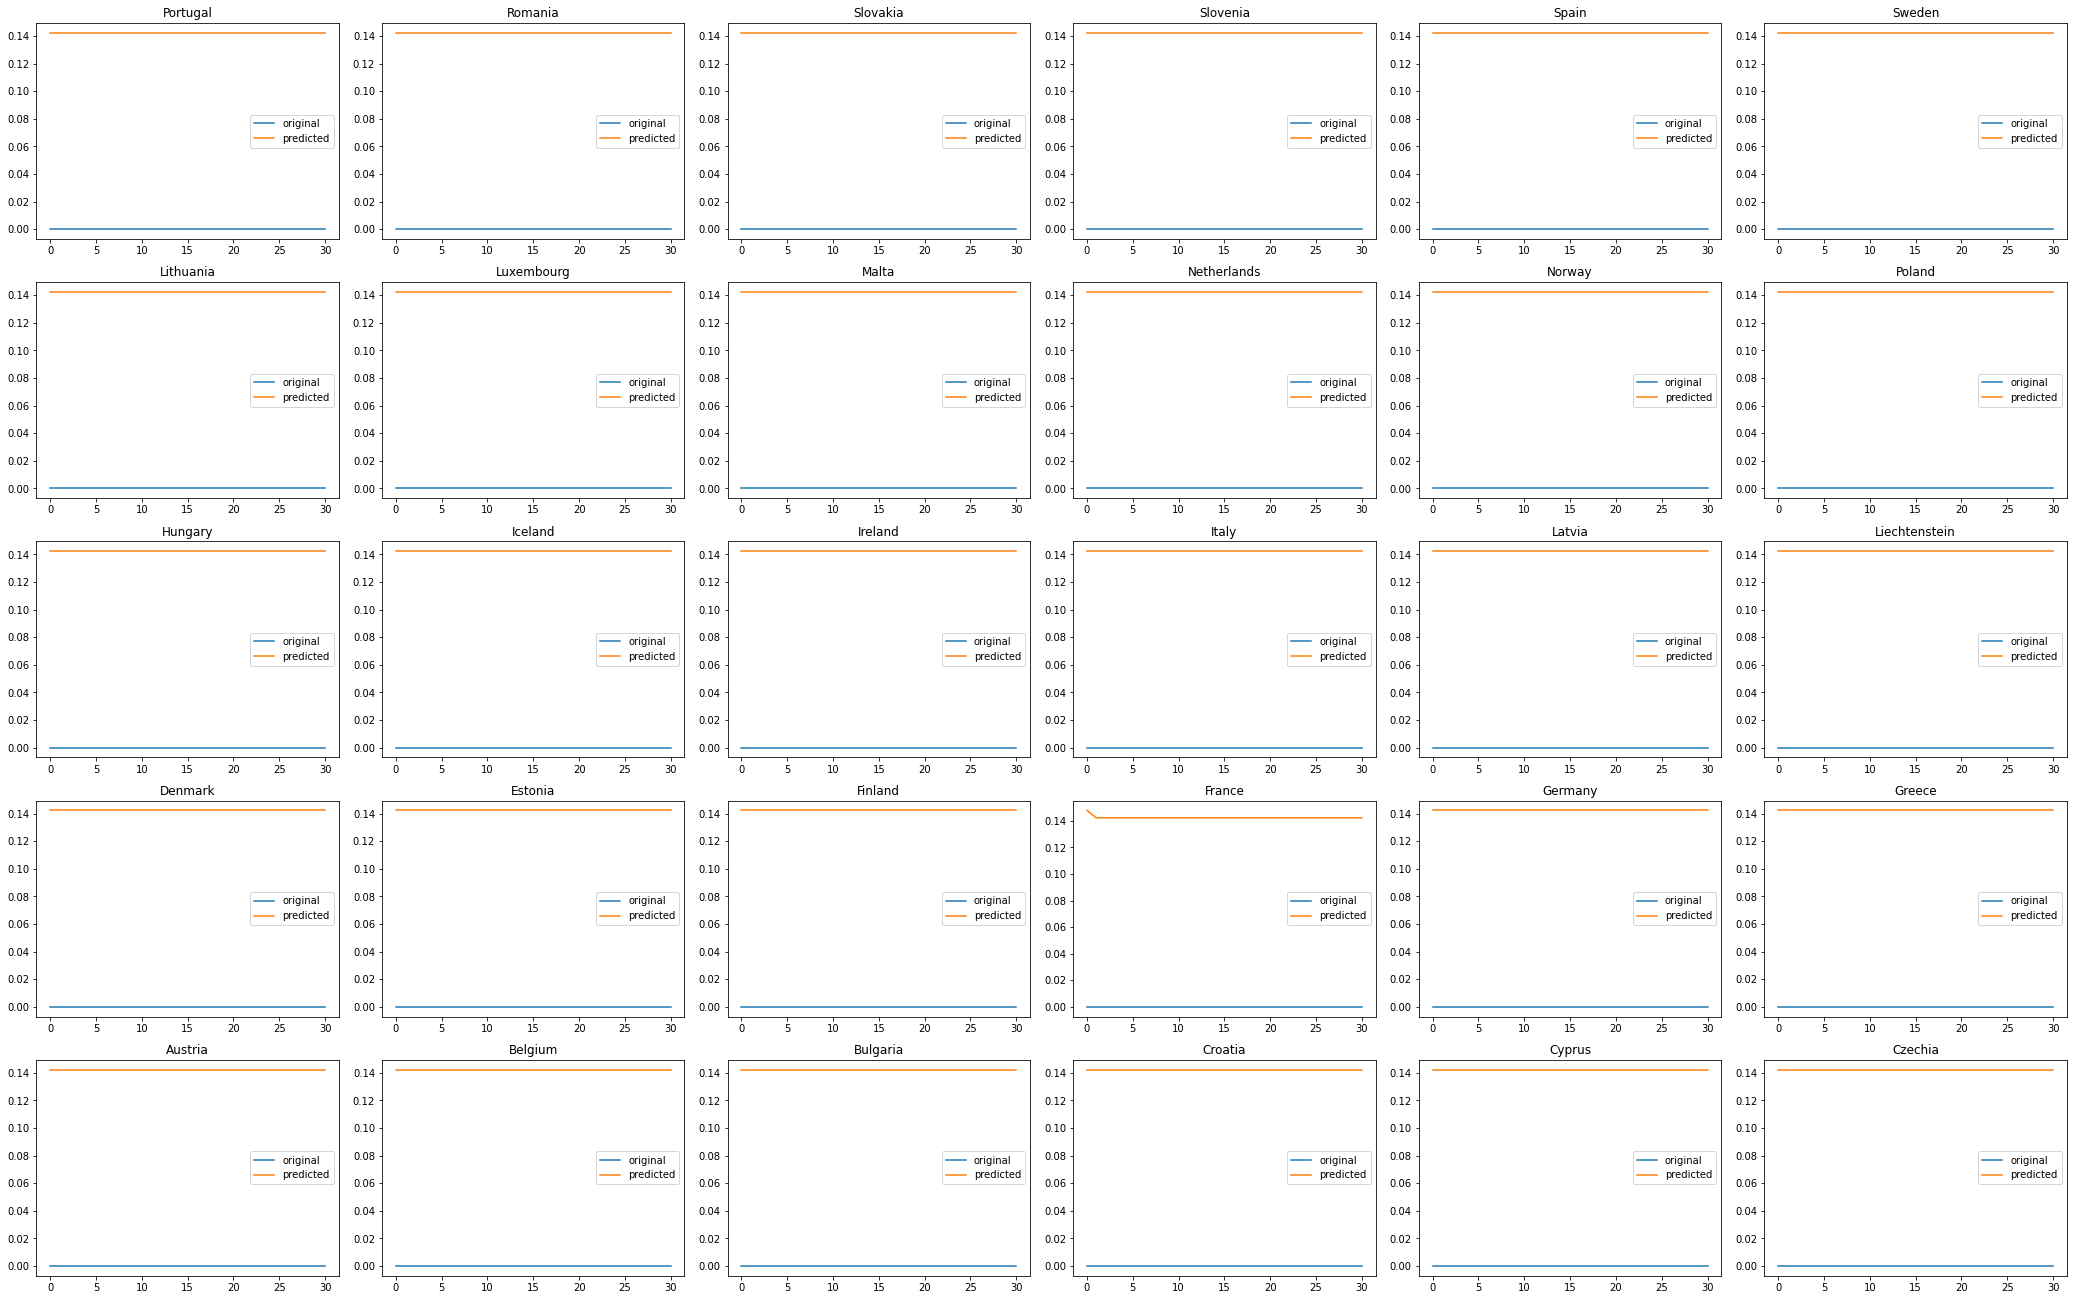

RNN(
  (rnn): RNN(1, 25, num_layers=4, batch_first=True)
  (linear): Linear(in_features=25, out_features=1, bias=True)
)
variant :  B.1.525 , model type :  rnn , country :  Austria , epoch :  1 , MSE :  0.15186166763305664 , RMSE :  0.38969433307647705
variant :  B.1.525 , model type :  rnn , country :  Belgium , epoch :  1 , MSE :  0.15186166763305664 , RMSE :  0.38969433307647705
variant :  B.1.525 , model type :  rnn , country :  Bulgaria , epoch :  1 , MSE :  0.15186166763305664 , RMSE :  0.38969433307647705
variant :  B.1.525 , model type :  rnn , country :  Croatia , epoch :  1 , MSE :  0.15186166763305664 , RMSE :  0.38969433307647705
variant :  B.1.525 , model type :  rnn , country :  Cyprus , epoch :  1 , MSE :  0.15186166763305664 , RMSE :  0.38969433307647705
variant :  B.1.525 , model type :  rnn , country :  Czechia , epoch :  1 , MSE :  0.15186166763305664 , RMSE :  0.38969433307647705
variant :  B.1.525 , model type :  rnn , country :  Denmark , epoch :  1 , MSE :  0.151

KeyboardInterrupt: ignored

In [ ]:
# Testing Process
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {}.".format(device))
mse_final_test = []
rmse_final_test = []
for k, test_data in enumerate(test_data_list):
    mse_model_test = []
    rmse_model_test = []
    variant = variant_list[k]  
    models = model_variant_list[k]
    for model, model_name in models:
        print(model)
        model.to(device)
        criterion = nn.MSELoss()
        epochs = 1
        fig = plt.figure(figsize=(12,3))
        for j, country in enumerate(test_data):
            data = test_data[country]
            x_test, y_test = make_seq(data, 10)
            x_test, y_test = x_test.to(device), y_test.to(device)
            y_pred, loss, loss1 = testing_step(variant, country, model, model_name, x_test, y_test, criterion)
            ax = fig.add_axes([0.4*(j%6), 1.2*(j//6), 0.35, 1])
            ax = plt.gca()
            ax.plot(y_test.cpu(), label="original")
            ax = plt.gca()
            ax.plot(y_pred.cpu().detach().numpy(), label="predicted")
            plt.title(country)
            plt.legend()
        plt.show() 
        mse_model_test.append(loss.item())
        rmse_model_test.append(loss1.item())

    mse_final_test.append(mse_model_test)
    rmse_final_test.append(rmse_model_test)

## Loss Testing

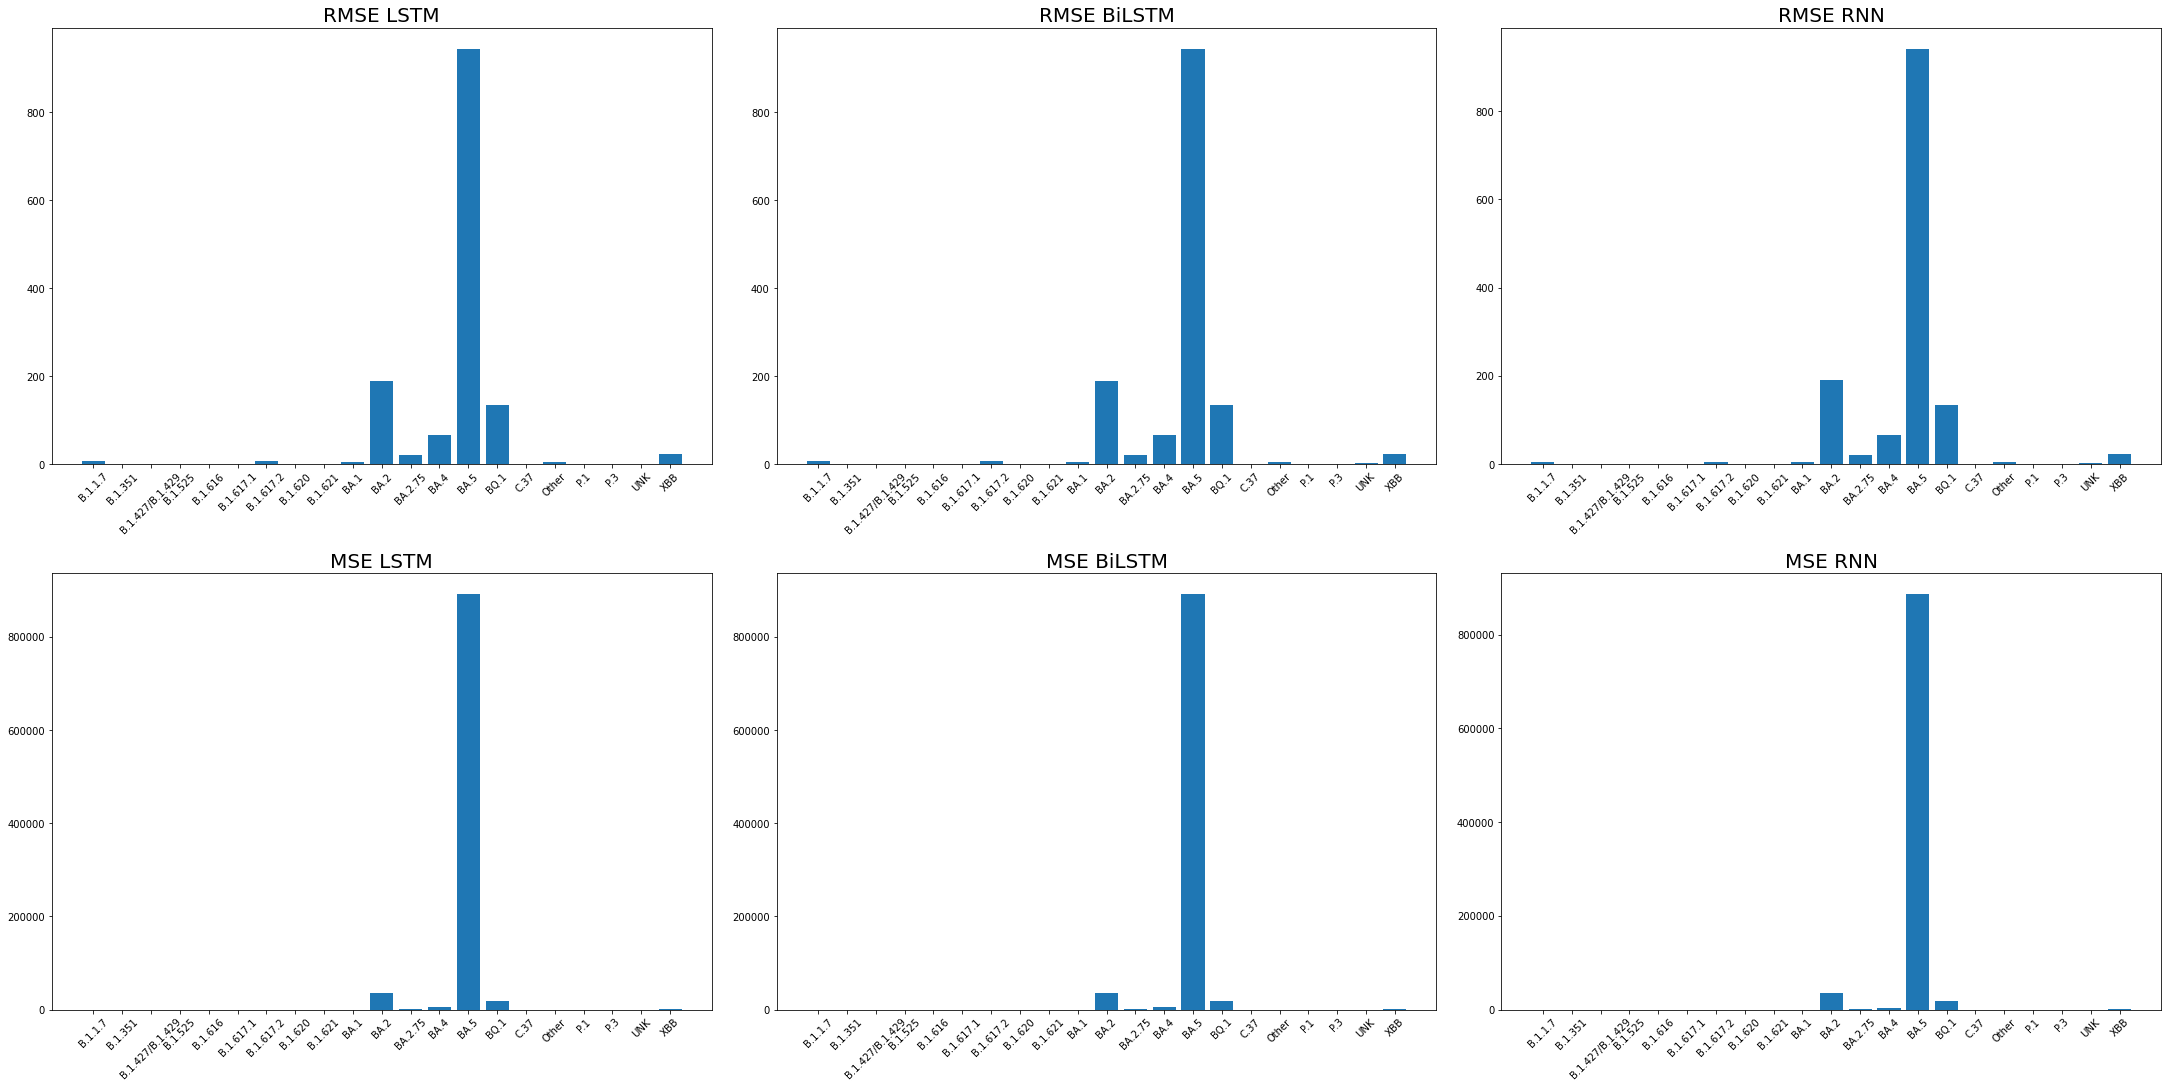


             Variant       MSE LSTM
0           B.1.1.7      41.800140
1           B.1.351       0.511299
2   B.1.427/B.1.429       0.000165
3           B.1.525       0.015958
4           B.1.616       0.000185
5         B.1.617.1       0.000026
6         B.1.617.2      45.737022
7           B.1.620       0.003123
8           B.1.621       0.005176
9              BA.1      28.379694
10             BA.2   36121.441406
11          BA.2.75     445.231720
12             BA.4    4449.771484
13             BA.5  892398.750000
14             BQ.1   18012.060547
15             C.37       0.002164
16            Other      21.768074
17              P.1       0.045307
18              P.3       0.000091
19              UNK       2.070624
20              XBB     562.105103 
 
             Variant     MSE BiLSTM
0           B.1.1.7      36.762951
1           B.1.351       0.260641
2   B.1.427/B.1.429       0.000379
3           B.1.525       0.011073
4           B.1.616       0.000404
5         B.1.

In [ ]:
mse_lstm_test = []
mse_bilstm_test = [] 
mse_rnn_test = []
for i in mse_final_test:
    mse_lstm_test.append(i[0])
    mse_bilstm_test.append(i[1])
    mse_rnn_test.append(i[2])

rmse_lstm_test = []
rmse_bilstm_test = [] 
rmse_rnn_test = []
for j in rmse_final_test:
    rmse_lstm_test.append(j[0])
    rmse_bilstm_test.append(j[1])
    rmse_rnn_test.append(j[2])

figure, axis1 = plt.subplots(2, 3, figsize=(30,15), constrained_layout = True)
plt.setp(axis1, xticks=tickvalues, xticklabels=variant_list)

axis1[0, 0].bar([k for k in range (len(rmse_lstm_test))], rmse_lstm_test)
axis1[0, 0].set_title("RMSE LSTM", fontsize=20)
axis1[0, 0].set_xticklabels(variant_list, rotation=45)
axis1[0, 1].bar([k for k in range (len(rmse_bilstm_test))], rmse_bilstm_test)
axis1[0, 1].set_title("RMSE BiLSTM", fontsize=20)
axis1[0, 1].set_xticklabels(variant_list, rotation=45)
axis1[0, 2].bar([k for k in range (len(rmse_rnn_test))], rmse_rnn_test)
axis1[0, 2].set_title("RMSE RNN", fontsize=20)
axis1[0, 2].set_xticklabels(variant_list, rotation=45)
axis1[1, 0].bar([k for k in range (len(mse_lstm_test))], mse_lstm_test)
axis1[1, 0].set_title("MSE LSTM", fontsize=20)
axis1[1, 0].set_xticklabels(variant_list, rotation=45)
axis1[1, 1].bar([k for k in range (len(mse_bilstm_test))], mse_bilstm_test)
axis1[1, 1].set_title("MSE BiLSTM", fontsize=20)
axis1[1, 1].set_xticklabels(variant_list, rotation=45)
axis1[1, 2].bar([k for k in range (len(mse_rnn_test))], mse_rnn_test)
axis1[1, 2].set_title("MSE RNN", fontsize=20)
axis1[1, 2].set_xticklabels(variant_list, rotation=45)
plt.show()

mse_lstm_test_df = pd.DataFrame({'Variant': variant_list,'MSE LSTM': mse_lstm_test})
mse_bilstm_test_df = pd.DataFrame({'Variant': variant_list,'MSE BiLSTM': mse_bilstm_test})
mse_rnn_test_df = pd.DataFrame({'Variant': variant_list,'MSE RNN': mse_rnn_test})
print("\n", mse_lstm_test_df, "\n", "\n", mse_bilstm_test_df, "\n", "\n", mse_rnn_test_df, "\n", "\n")

rmse_lstm_test_df = pd.DataFrame({'Variant': variant_list,'RMSE LSTM': rmse_lstm_test})
rmse_bilstm_test_df = pd.DataFrame({'Variant': variant_list,'RMSE BiLSTM': rmse_bilstm_test})
rmse_rnn_test_df = pd.DataFrame({'Variant': variant_list,'RMSE RNN': rmse_rnn_test})
print("\n", rmse_lstm_test_df, "\n", "\n", rmse_bilstm_test_df, "\n", "\n", rmse_rnn_test_df, "\n", "\n")

# Sequence Data Multivariate


In [ ]:
def multi_seq(data, seq_length):
    data = np.array(data)
    x_seq = []
    y_seq = []

    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length,:]
        y = data[i+seq_length]
        x_seq.append(x)
        y_seq.append(y)

    x_seq = torch.tensor(x_seq, dtype=torch.float32).reshape(-1, seq_length, 30)
    y_seq = torch.tensor(y_seq, dtype=torch.float32)

    return x_seq, y_seq

In [ ]:
def training_step(variant, model, model_name, x_train, y_train, optimizer, criterion, epochs):
    for epoch in range(epochs):
        model.train()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train.reshape(-1,30).float())
        loss1 = torch.sqrt(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch == epochs-1:
          print("variant : ", variant, ", model type : ", model_name, ", epoch : ", epoch+1, ", MSE : ", loss.item(), ", RMSE : ", loss1.item())
        
    return y_pred, loss, loss1

In [ ]:
def testing_step(variant, model, model_name, x_test, y_test, criterion, epochs):
    for epoch in range(epochs):
        model.eval()
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test.reshape(-1,30).float())
        loss1 = torch.sqrt(loss)

        if epoch == epochs-1:
                print("variant : ", variant, ", model type : ", model_name, ", epoch : ", epoch+1, ", MSE : ", loss.item(), ", RMSE : ", loss1.item())
    
    return y_pred, loss, loss1

In [ ]:
def model_variant():
    lstm = LSTM(input_size=30, hidden_size=25, layer_size=4, output_size=30)
    bilstm = BiLSTM(input_size=30, hidden_size=25, layer_size=4, output_size=30)
    rnn = RNN(input_size=30, hidden_size=25, layer_size=4, output_size=30)

    model_list = [[lstm, 'lstm'], [bilstm, 'bilstm'], [rnn, 'rnn']]

    return model_list

# Multivariate


## Training

In [ ]:
# Training Process
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {}.".format(device))
country_list = ['Austria', 'Belgium', 'Bulgaria',	'Croatia',	'Cyprus',	'Czechia',	'Denmark', 'Estonia','Finland','France', 'Germany',
                'Greece','Hungary', 'Iceland',	'Ireland',	'Italy',	'Latvia', 'Liechtenstein',	'Lithuania',	'Luxembourg','Malta','Netherland','Norway','Poland','Portugal','Romania','Slovaki','Slovenia','Spain','Sweden']
model_variant_list = [] #List dari fungsi model_variant
mse_final_train = []
rmse_final_train = []
for k, train_data in enumerate(train_data_list):
    variant = variant_list[k]  # variant1, ...., variantn
    model_list = model_variant()
    all_model_in_a_variant = [] #List 3 Model untuk tiap varian
    mse_model_train = []
    rmse_model_train = []
    for model, model_name in model_list:
        model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        criterion = nn.MSELoss()
        epochs = 1
        data = train_data
        x_train, y_train = multi_seq(data, 10)
        x_train, y_train = x_train.to(device), y_train.to(device)
        y_pred, loss, loss1 = training_step(variant, model, model_name, x_train, y_train, optimizer, criterion, epochs)
        mse_model_train.append(loss.item())
        rmse_model_train.append(loss1.item())
        all_model_in_a_variant.append([model, model_name])
        y_train_t = y_train.T
        y_pred_t = y_pred.T
        fig = plt.figure(figsize=(16,4))
        for i, country in enumerate (y_pred.T):
            ax = fig.add_axes([0.4*(i%6), 1.2*(i//6), 0.35, 1])
            ax = plt.gca()
            ax.plot(y_train_t[i].cpu(), label="original")
            ax = plt.gca()
            ax.plot(y_pred_t[i].cpu().detach().numpy(), label="predicted")
            plt.xlabel('Minggu')
            plt.title(country_list[i])
            plt.legend()
        plt.show()
        
    mse_final_train.append(mse_model_train)
    rmse_final_train.append(rmse_model_train)      
    model_variant_list.append(all_model_in_a_variant)

Output hidden; open in https://colab.research.google.com to view.

## Loss Training

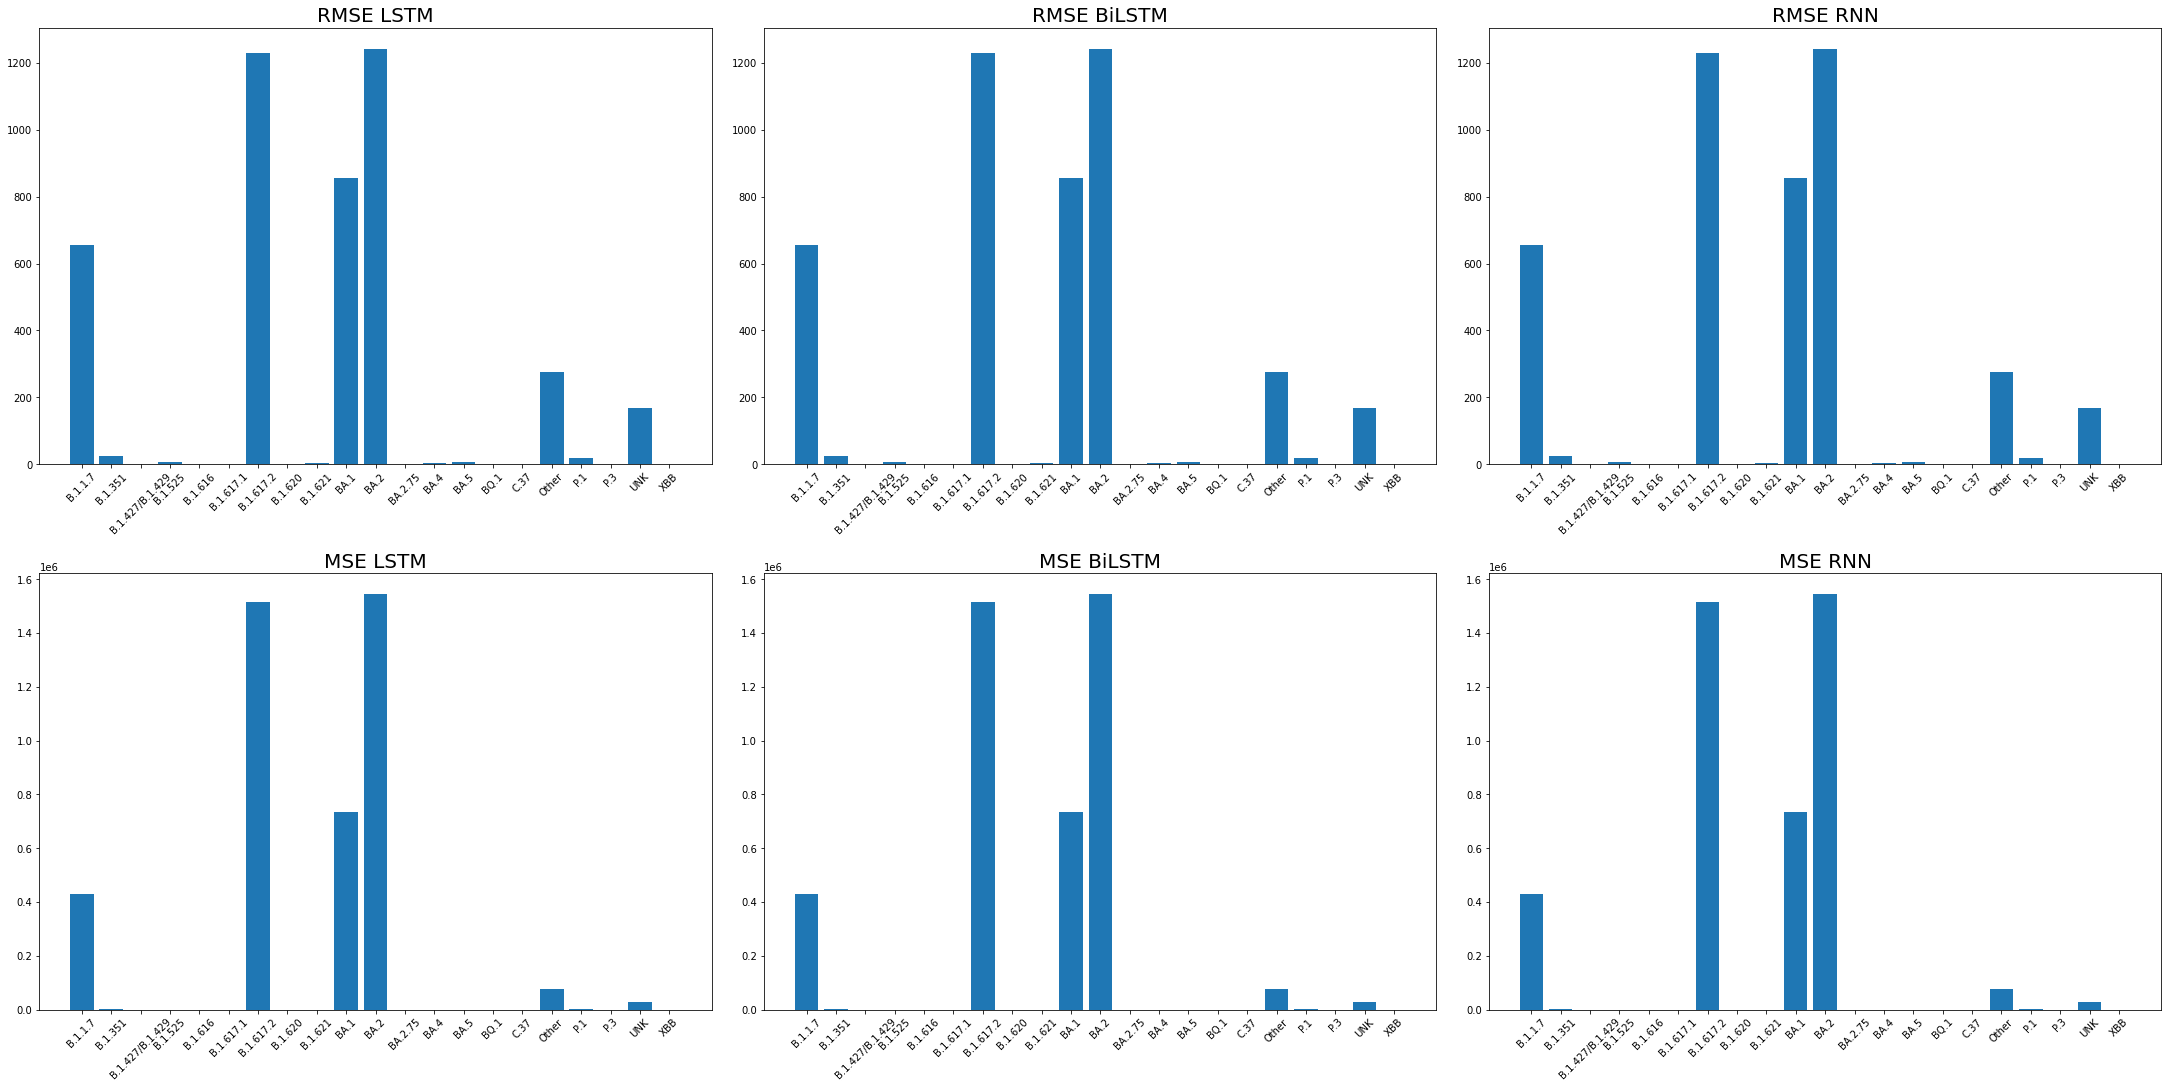


             Variant      MSE LSTM
0           B.1.1.7  4.279023e+05
1           B.1.351  6.214910e+02
2   B.1.427/B.1.429  1.112457e-01
3           B.1.525  4.446901e+01
4           B.1.616  8.343904e-02
5         B.1.617.1  2.744465e+00
6         B.1.617.2  1.515874e+06
7           B.1.620  2.522875e+00
8           B.1.621  1.636654e+01
9              BA.1  7.331275e+05
10             BA.2  1.544950e+06
11          BA.2.75  1.544045e-02
12             BA.4  5.183556e+00
13             BA.5  3.690146e+01
14             BQ.1  4.761291e-02
15             C.37  1.831800e+00
16            Other  7.673341e+04
17              P.1  2.874231e+02
18              P.3  2.371569e-02
19              UNK  2.852121e+04
20              XBB  1.571633e-02 
 
             Variant    MSE BiLSTM
0           B.1.1.7  4.279093e+05
1           B.1.351  6.214564e+02
2   B.1.427/B.1.429  1.011958e-01
3           B.1.525  4.440498e+01
4           B.1.616  8.106443e-02
5         B.1.617.1  2.768181e+00
6       

In [ ]:
# pd.options.display.float_format = '{:.2f}'.format
mse_lstm_train = []
mse_bilstm_train = [] 
mse_rnn_train = []
for i in mse_final_train:
    mse_lstm_train.append(i[0])
    mse_bilstm_train.append(i[1])
    mse_rnn_train.append(i[2])

rmse_lstm_train = []
rmse_bilstm_train = [] 
rmse_rnn_train = []
for j in rmse_final_train:
    rmse_lstm_train.append(j[0])
    rmse_bilstm_train.append(j[1])
    rmse_rnn_train.append(j[2])

tickvalues = range(0,len(rmse_lstm_train))

figure, axis = plt.subplots(2, 3, figsize=(30,15), constrained_layout = True)
plt.setp(axis, xticks=tickvalues, xticklabels=variant_list)

axis[0, 0].bar([k for k in range (len(rmse_lstm_train))], rmse_lstm_train)
axis[0, 0].set_title("RMSE LSTM", fontsize=20)
axis[0, 0].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[0, 1].bar([k for k in range (len(rmse_bilstm_train))], rmse_bilstm_train)
axis[0, 1].set_title("RMSE BiLSTM", fontsize=20)
axis[0, 1].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[0, 2].bar([k for k in range (len(rmse_rnn_train))], rmse_rnn_train)
axis[0, 2].set_title("RMSE RNN", fontsize=20)
axis[0, 2].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[1, 0].bar([k for k in range (len(mse_lstm_train))], mse_lstm_train)
axis[1, 0].set_title("MSE LSTM", fontsize=20)
axis[1, 0].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[1, 1].bar([k for k in range (len(mse_bilstm_train))], mse_bilstm_train)
axis[1, 1].set_title("MSE BiLSTM", fontsize=20)
axis[1, 1].set_xticklabels(variant_list, rotation=45, fontsize=10)
axis[1, 2].bar([k for k in range (len(mse_rnn_train))], mse_rnn_train)
axis[1, 2].set_title("MSE RNN", fontsize=20)
axis[1, 2].set_xticklabels(variant_list, rotation=45, fontsize=10)
plt.show()

mse_lstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE LSTM': mse_lstm_train})
mse_bilstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE BiLSTM': mse_bilstm_train})
mse_rnn_train_df = pd.DataFrame({'Variant': variant_list,'MSE RNN': mse_rnn_train})
print("\n", mse_lstm_train_df, "\n", "\n", mse_bilstm_train_df, "\n", "\n", mse_rnn_train_df, "\n", "\n")

rmse_lstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE LSTM': rmse_lstm_train})
rmse_bilstm_train_df = pd.DataFrame({'Variant': variant_list,'MSE BiLSTM': rmse_bilstm_train})
rmse_rnn_train_df = pd.DataFrame({'Variant': variant_list,'MSE RNN': rmse_rnn_train})
print("\n", rmse_lstm_train_df, "\n", "\n", rmse_bilstm_train_df, "\n", "\n", rmse_rnn_train_df, "\n", "\n")

mean_mse_lstm_train = statistics.mean(mse_lstm_train)
mean_mse_bilstm_train = statistics.mean(mse_bilstm_train)
mean_mse_rnn_train = statistics.mean(mse_rnn_train)

print("Rata - rata Loss MSE tiap model:")
print("LSTM: ", mean_mse_lstm_train)
print("BiLSTM: ", mean_mse_bilstm_train)
print("RNN: ", mean_mse_rnn_train, "\n")

mean_rmse_lstm_train = statistics.mean(rmse_lstm_train)
mean_rmse_bilstm_train = statistics.mean(rmse_bilstm_train)
mean_rmse_rnn_train = statistics.mean(rmse_rnn_train)

print("Rata - Rata Loss RMSE tiap model")
print("LSTM: ", mean_rmse_lstm_train)
print("BiLSTM: ", mean_rmse_bilstm_train)
print("RNN: ", mean_rmse_rnn_train)

## Testing

Using cpu.
variant :  B.1.1.7 , model type :  lstm , epoch :  1 , MSE :  0.02601892687380314 , RMSE :  0.1613038331270218


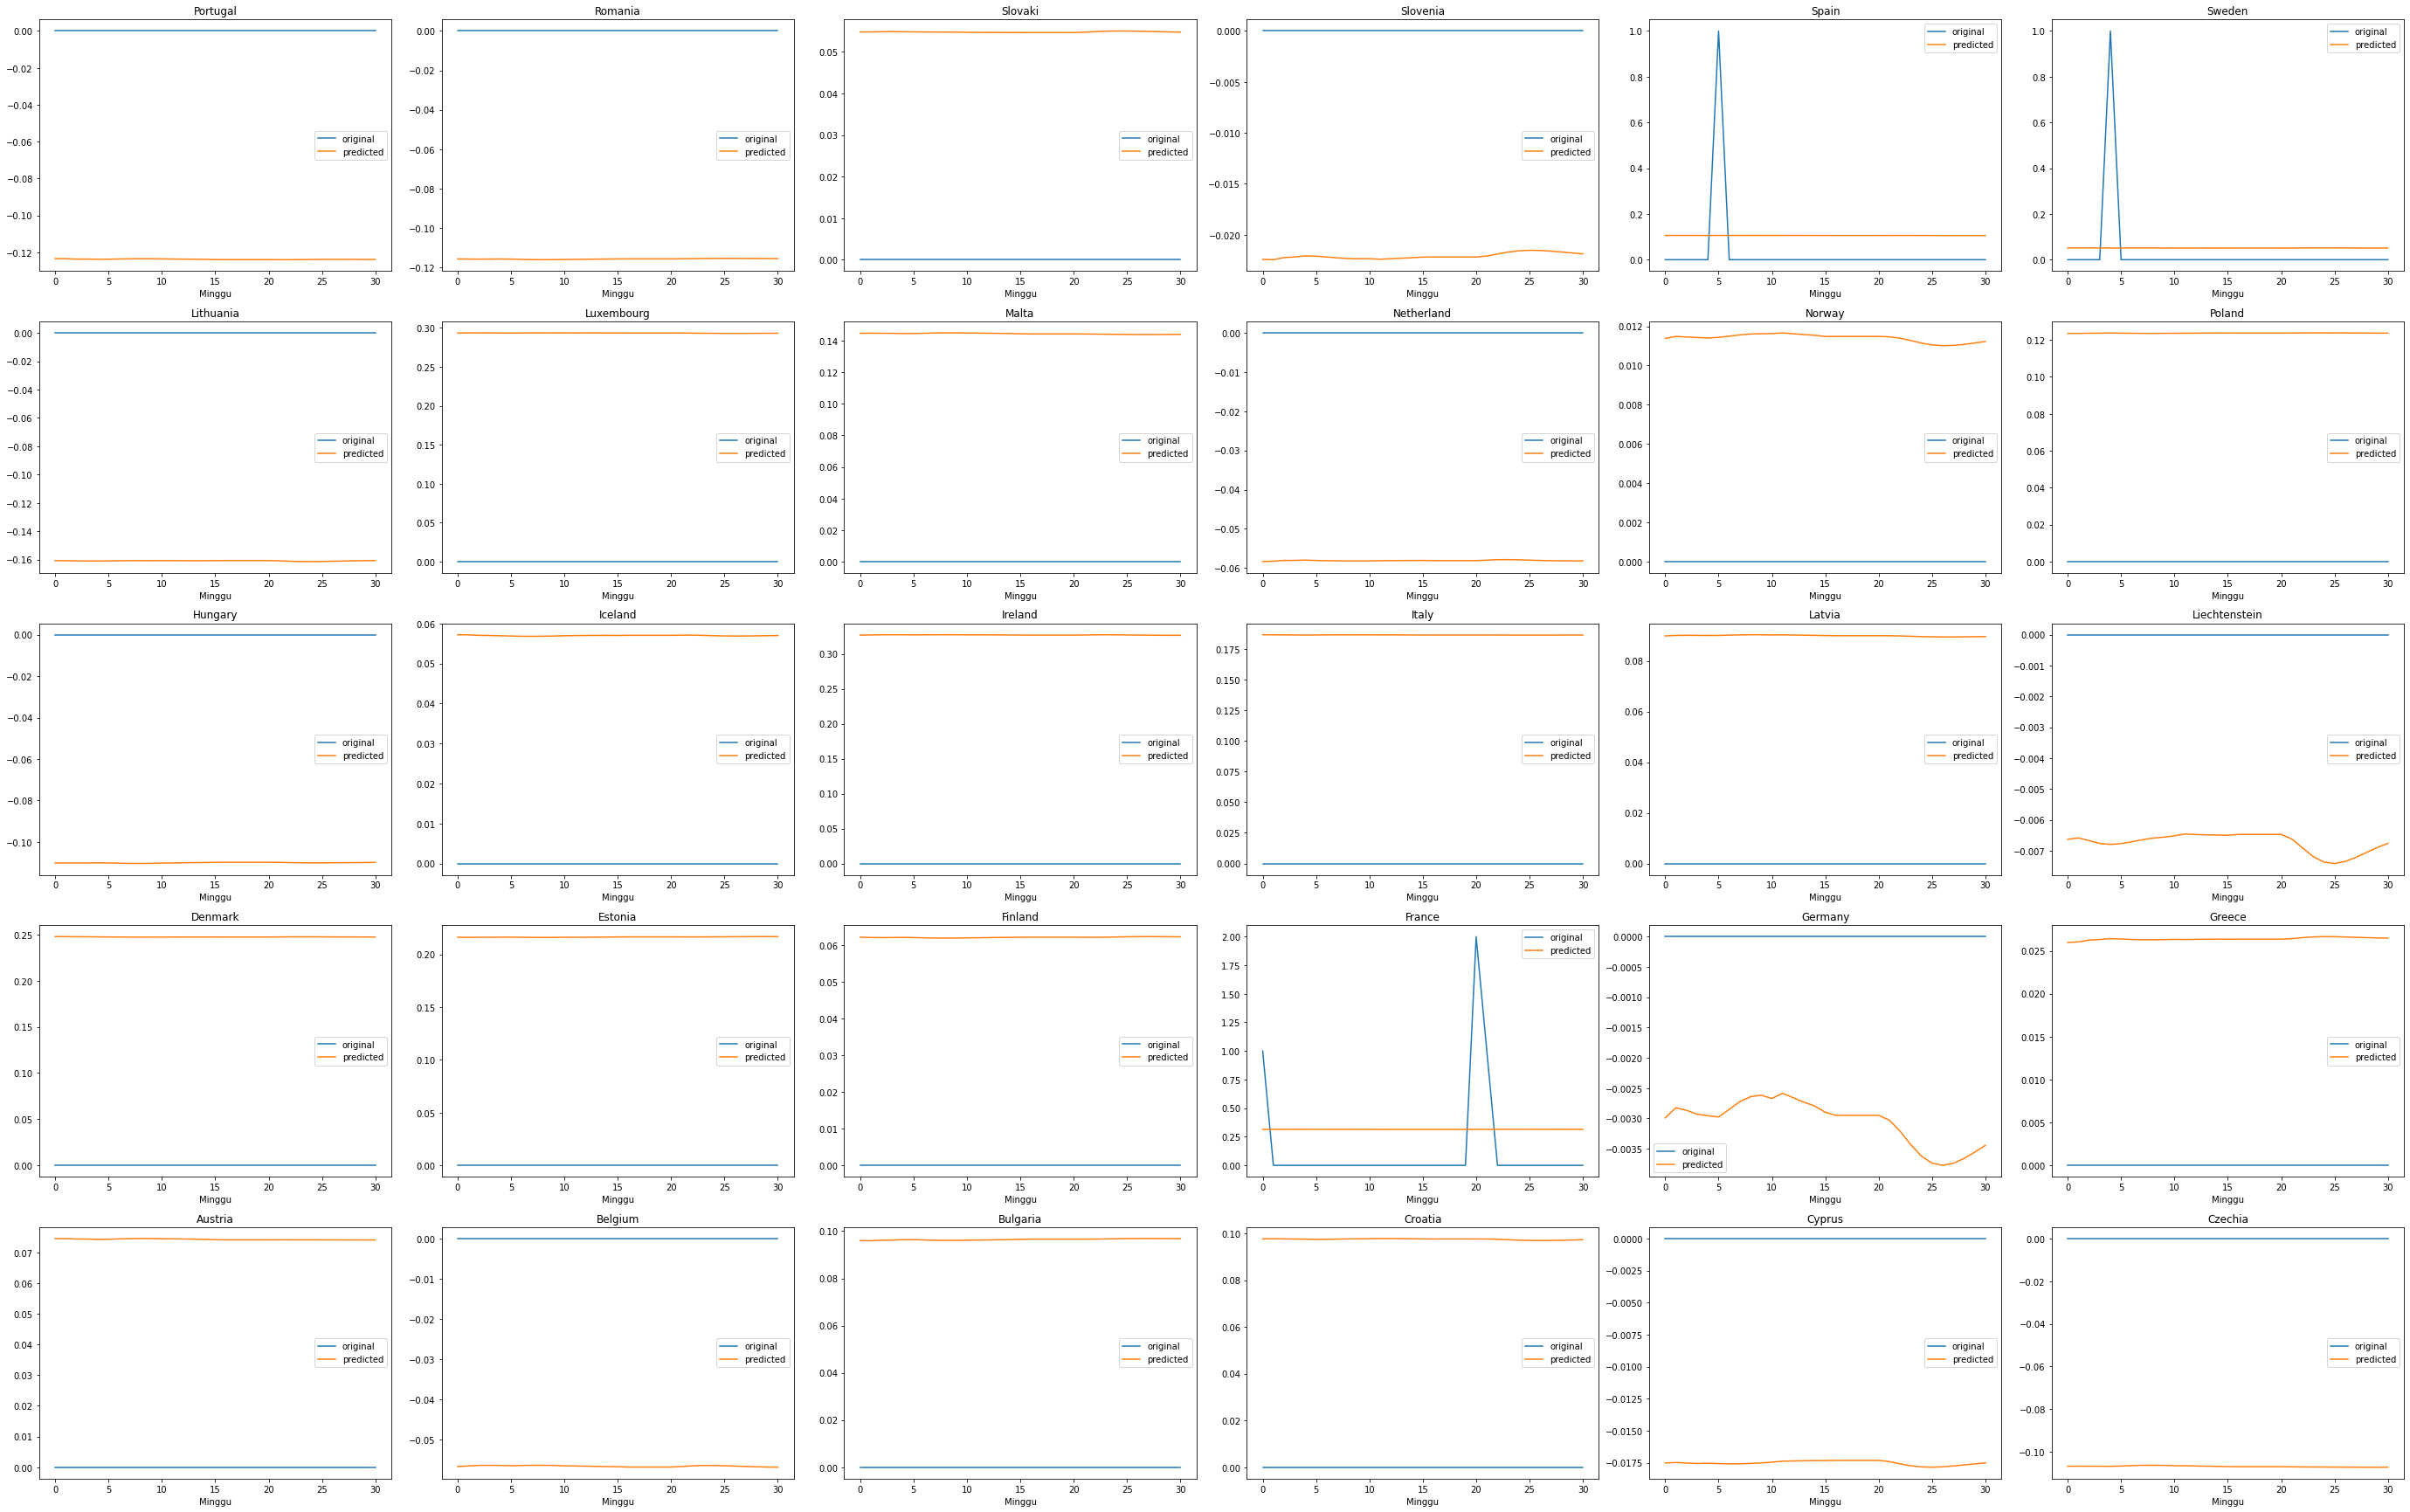

variant :  B.1.1.7 , model type :  bilstm , epoch :  1 , MSE :  0.024488773196935654 , RMSE :  0.15648889541625977


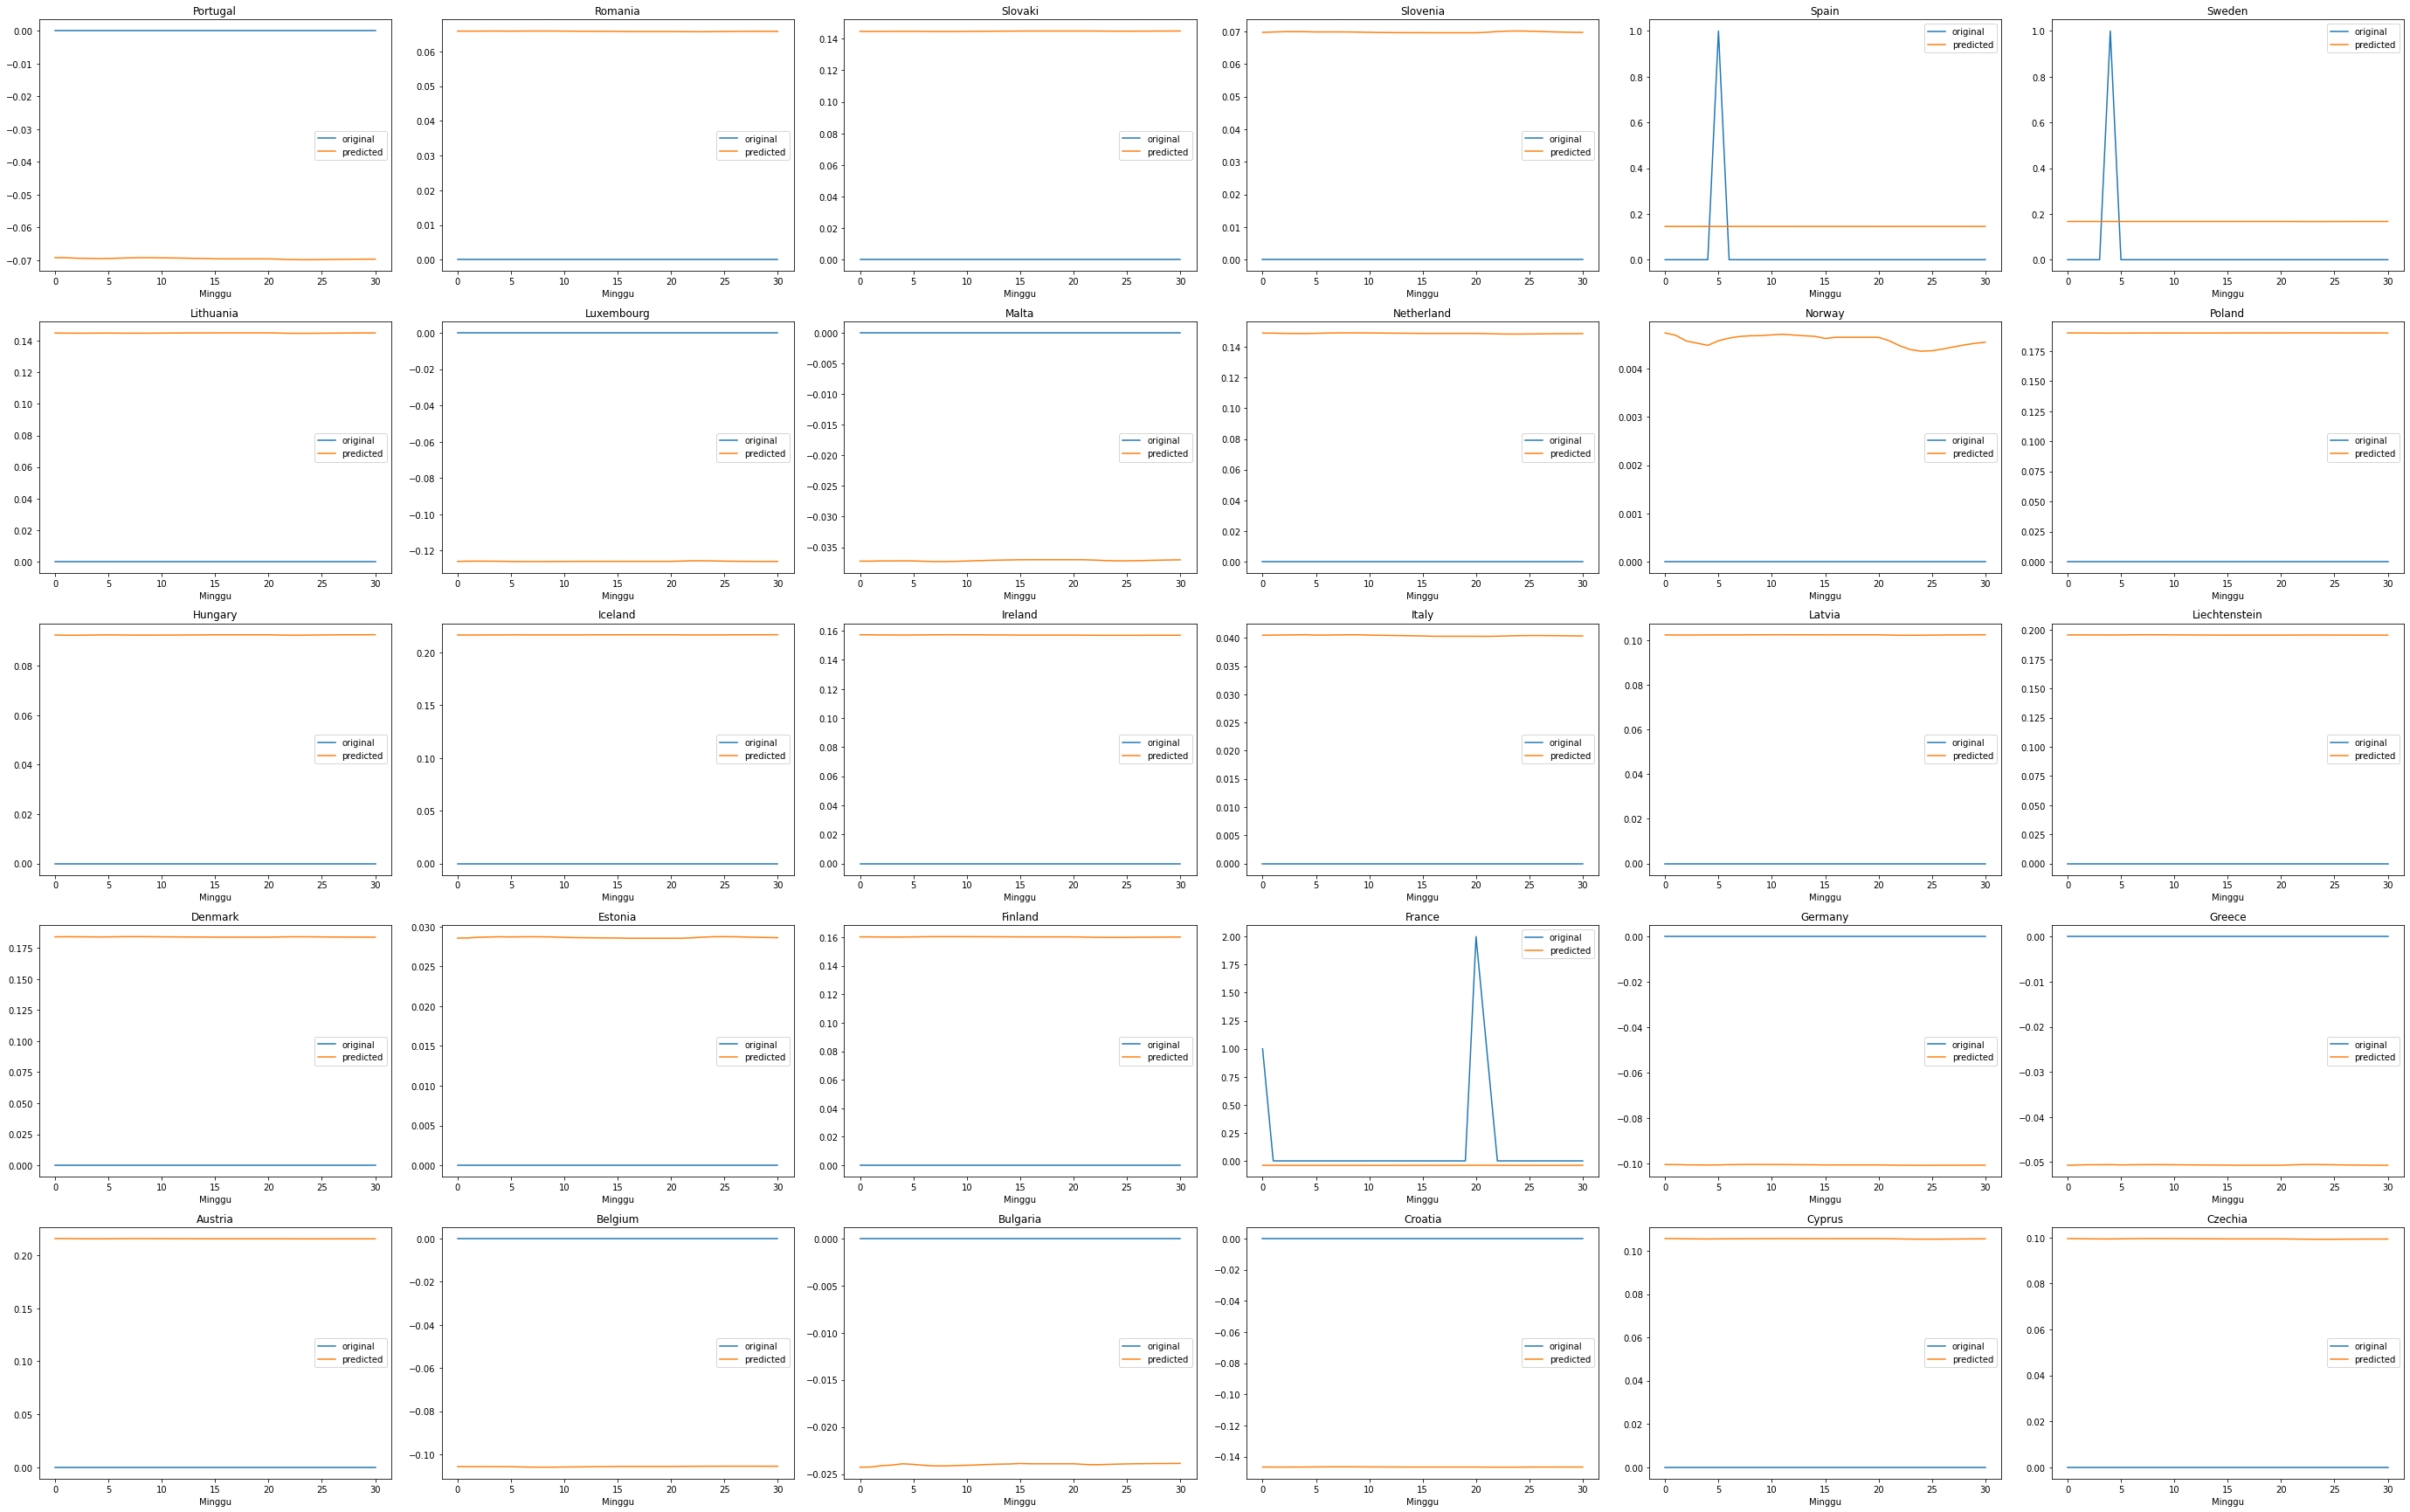

variant :  B.1.1.7 , model type :  rnn , epoch :  1 , MSE :  0.060389596968889236 , RMSE :  0.24574294686317444


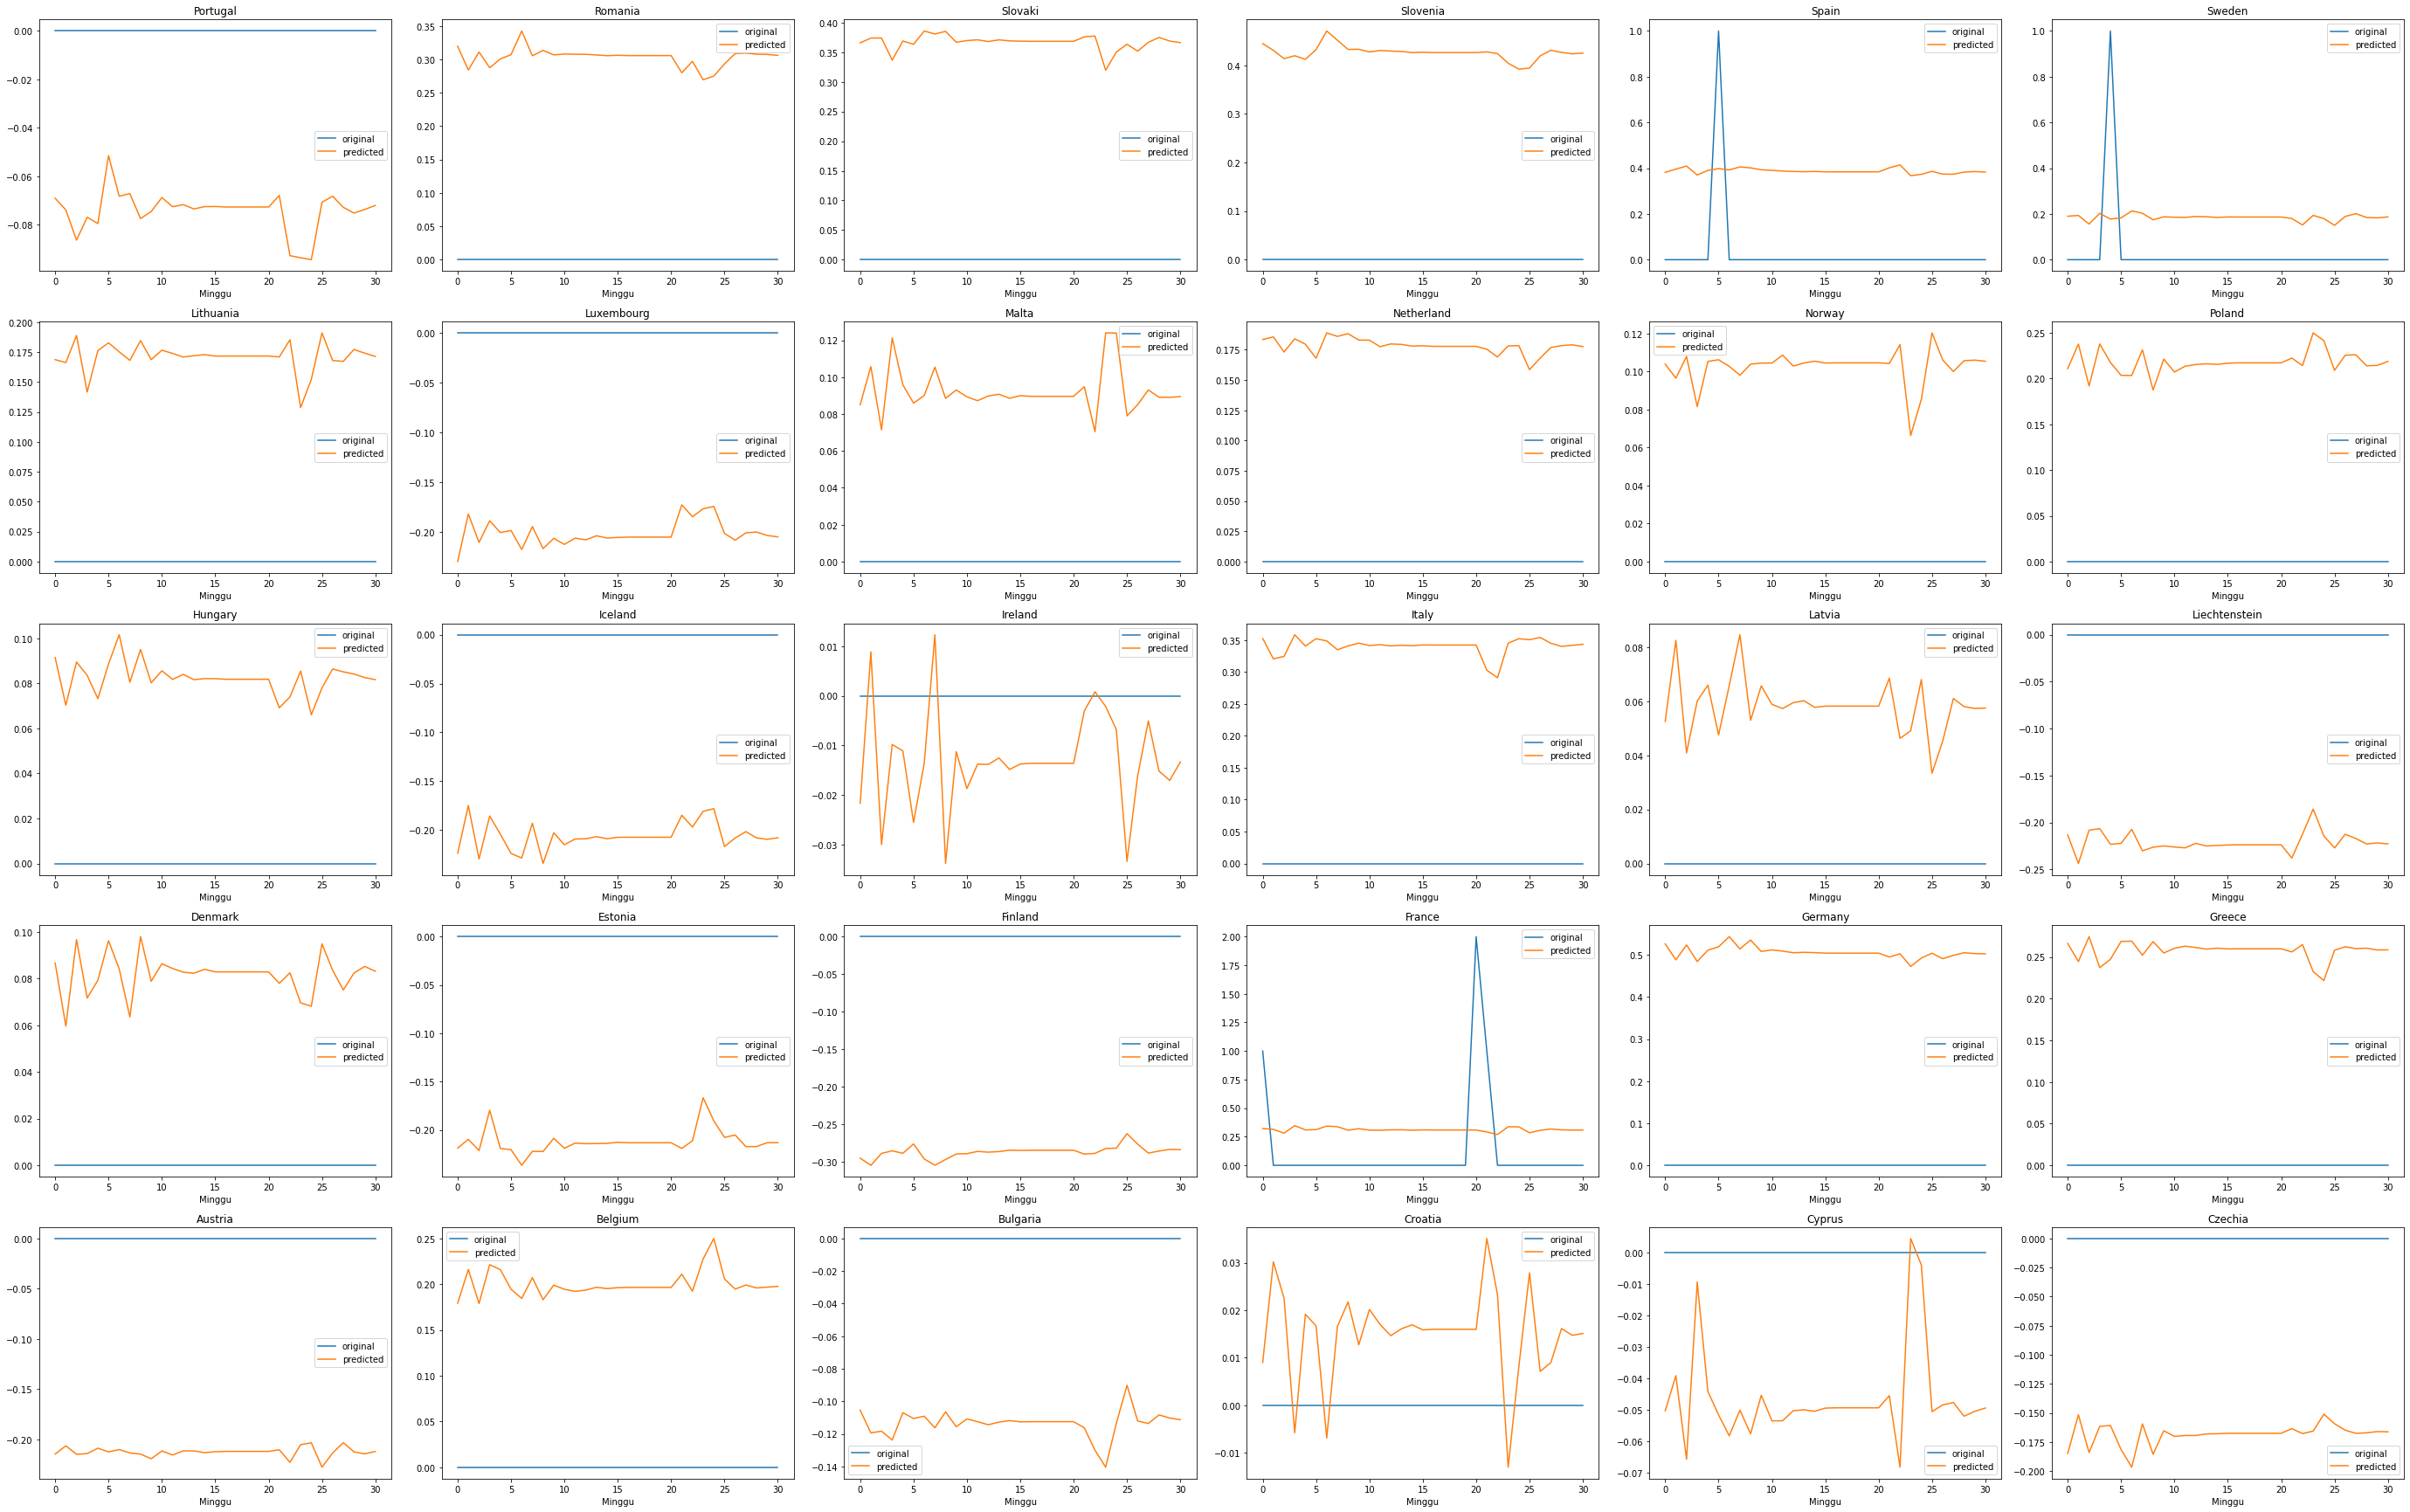

variant :  B.1.351 , model type :  lstm , epoch :  1 , MSE :  0.013294147327542305 , RMSE :  0.1153002455830574


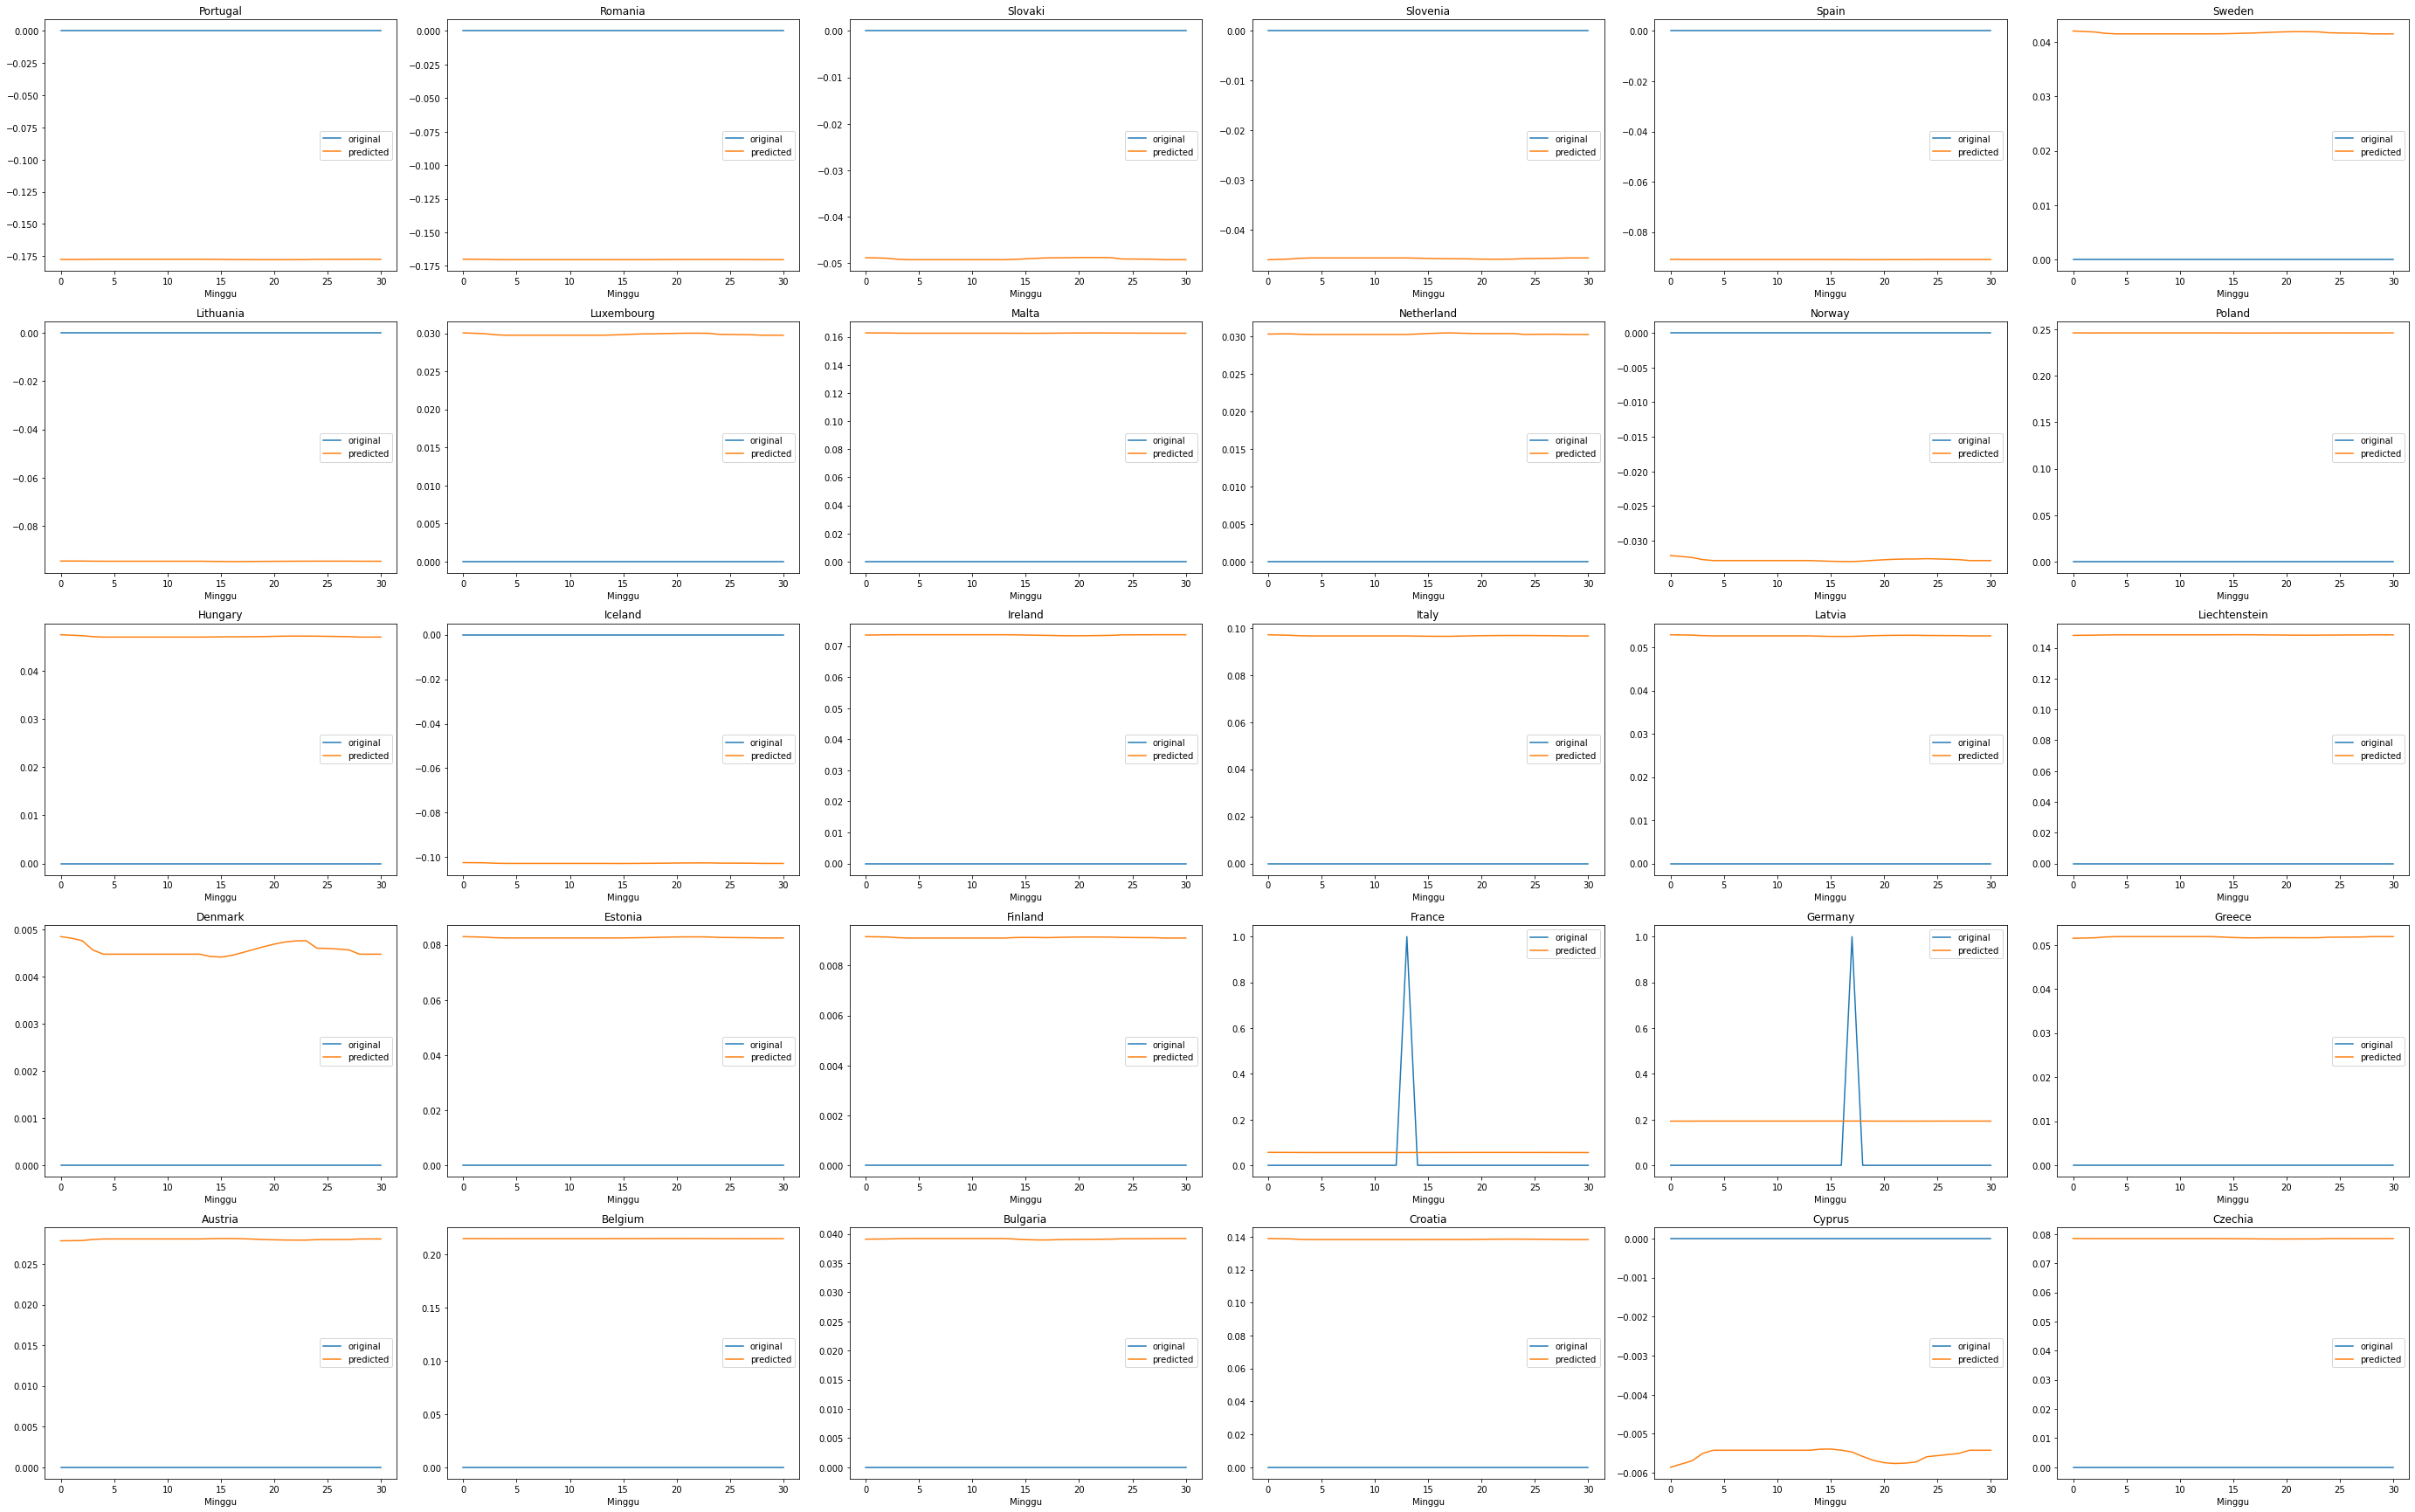

variant :  B.1.351 , model type :  bilstm , epoch :  1 , MSE :  0.015012132935225964 , RMSE :  0.12252400815486908


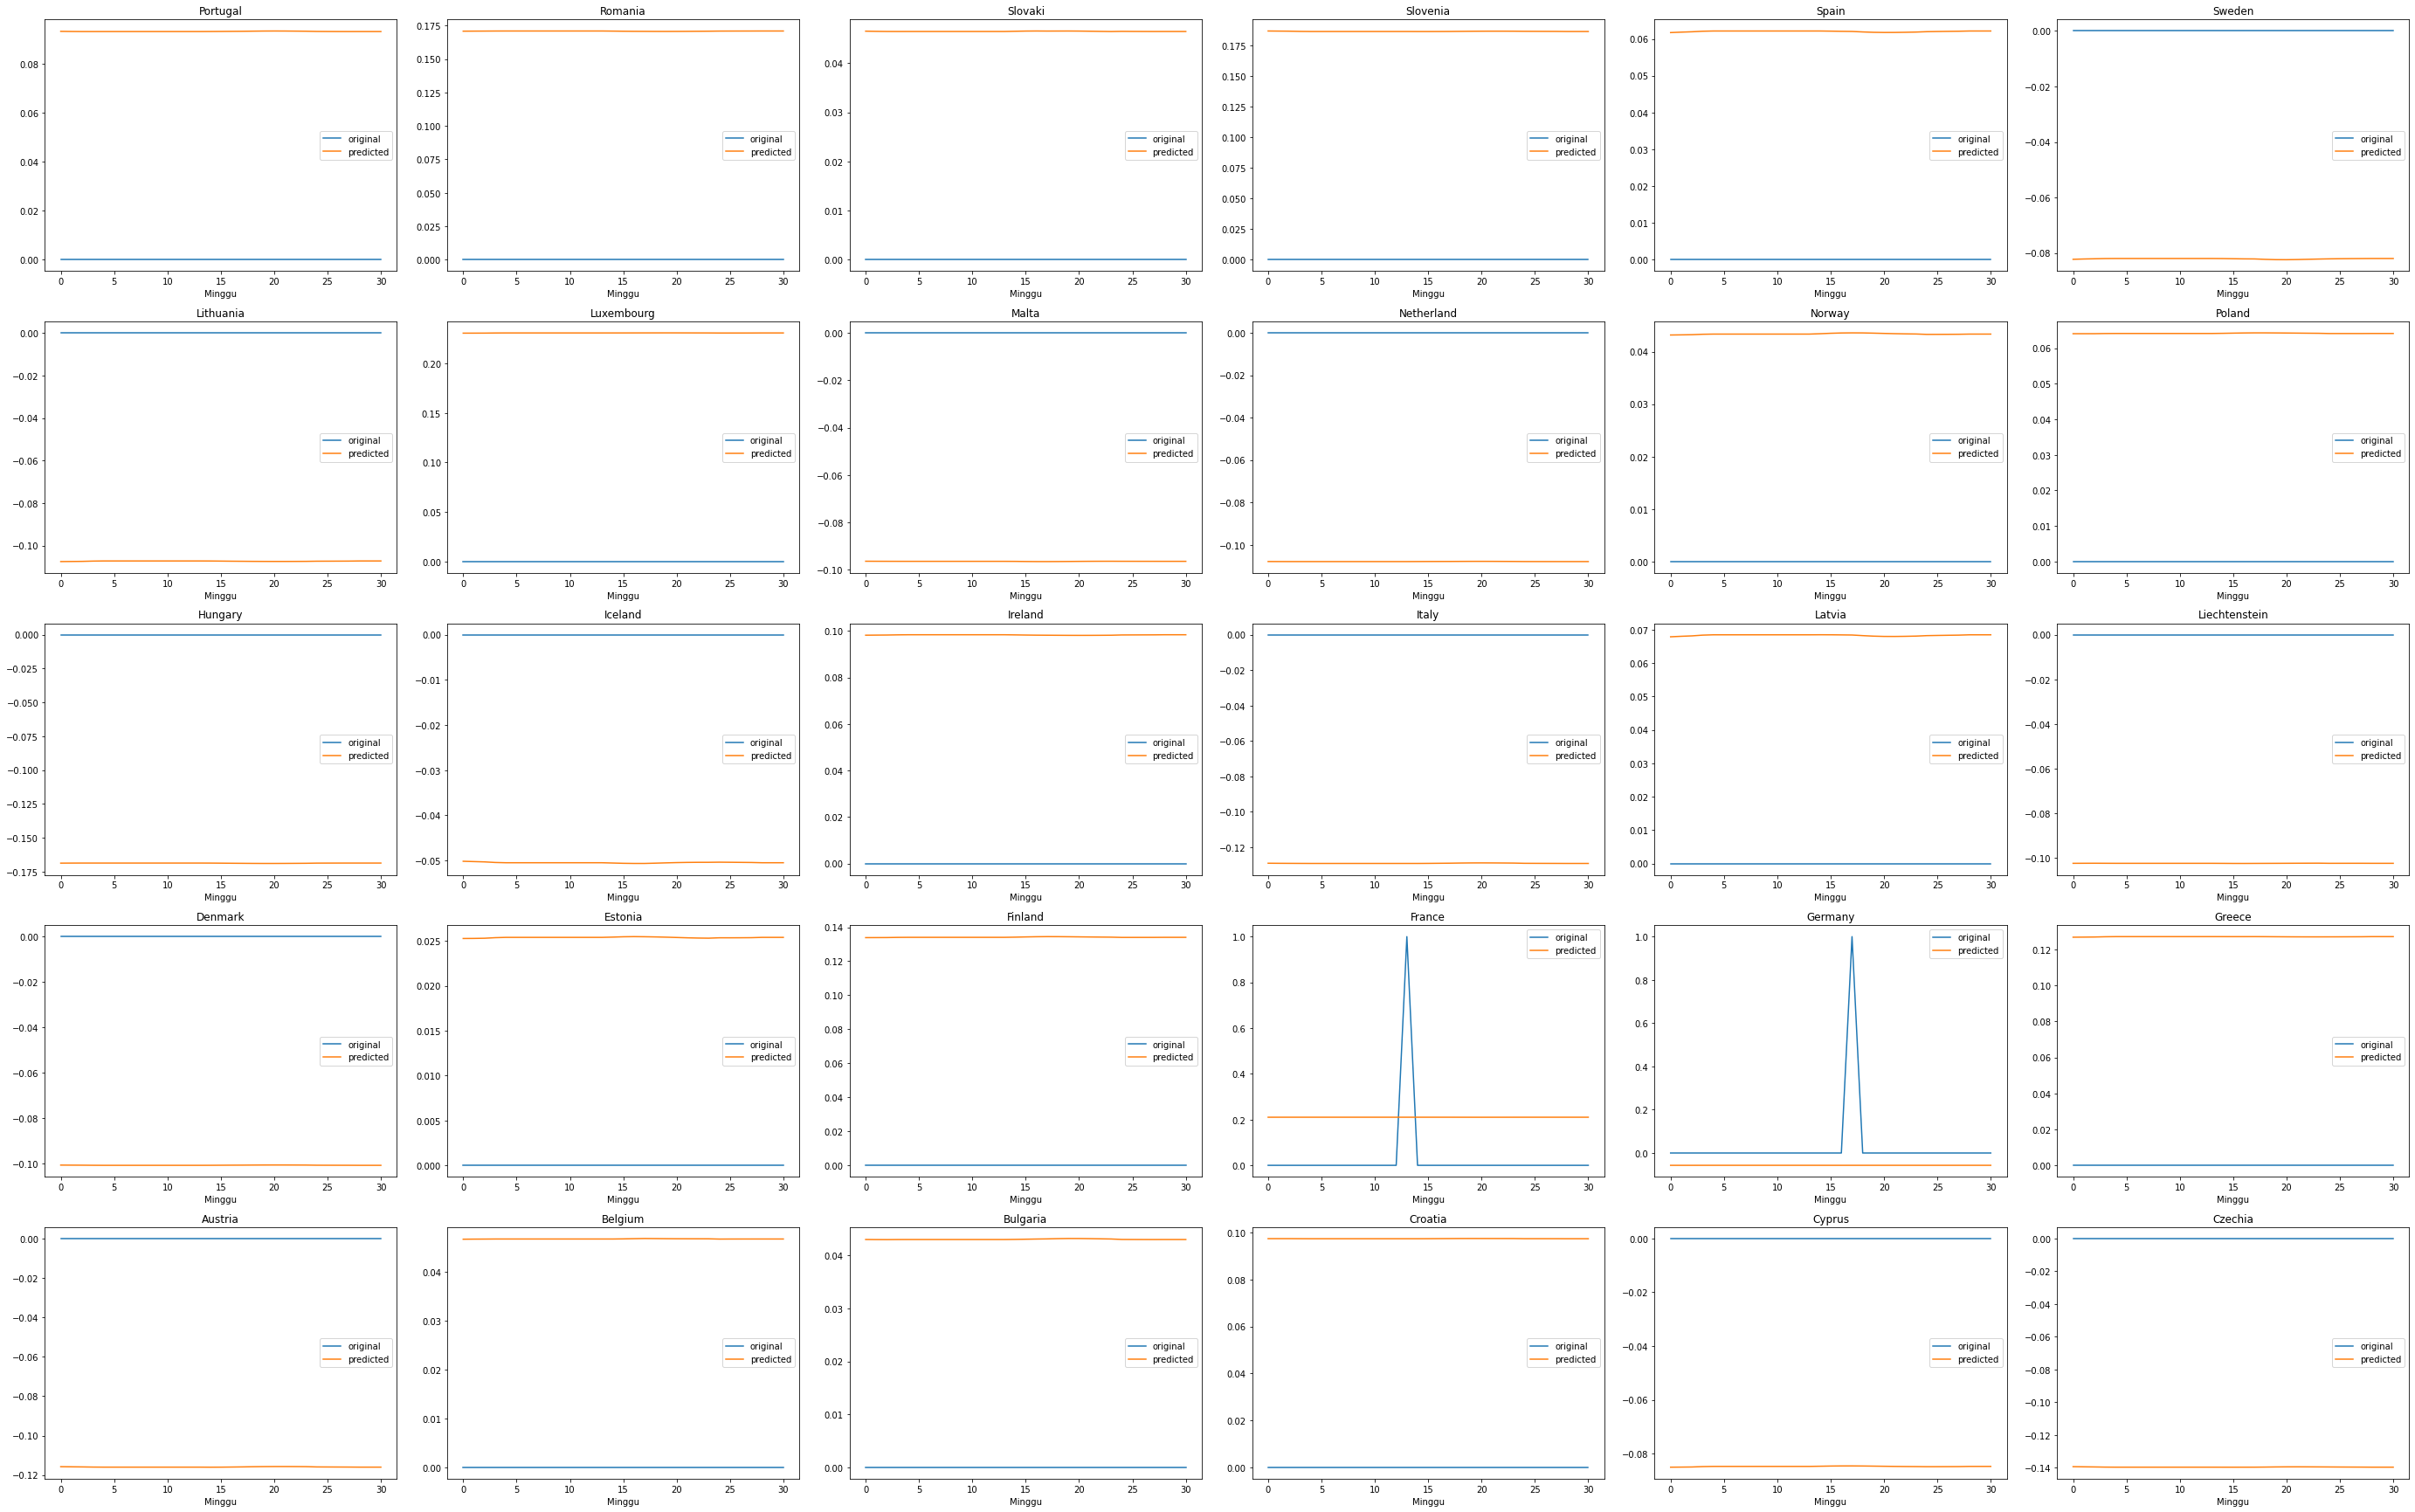

variant :  B.1.351 , model type :  rnn , epoch :  1 , MSE :  0.05001857131719589 , RMSE :  0.2236483246088028


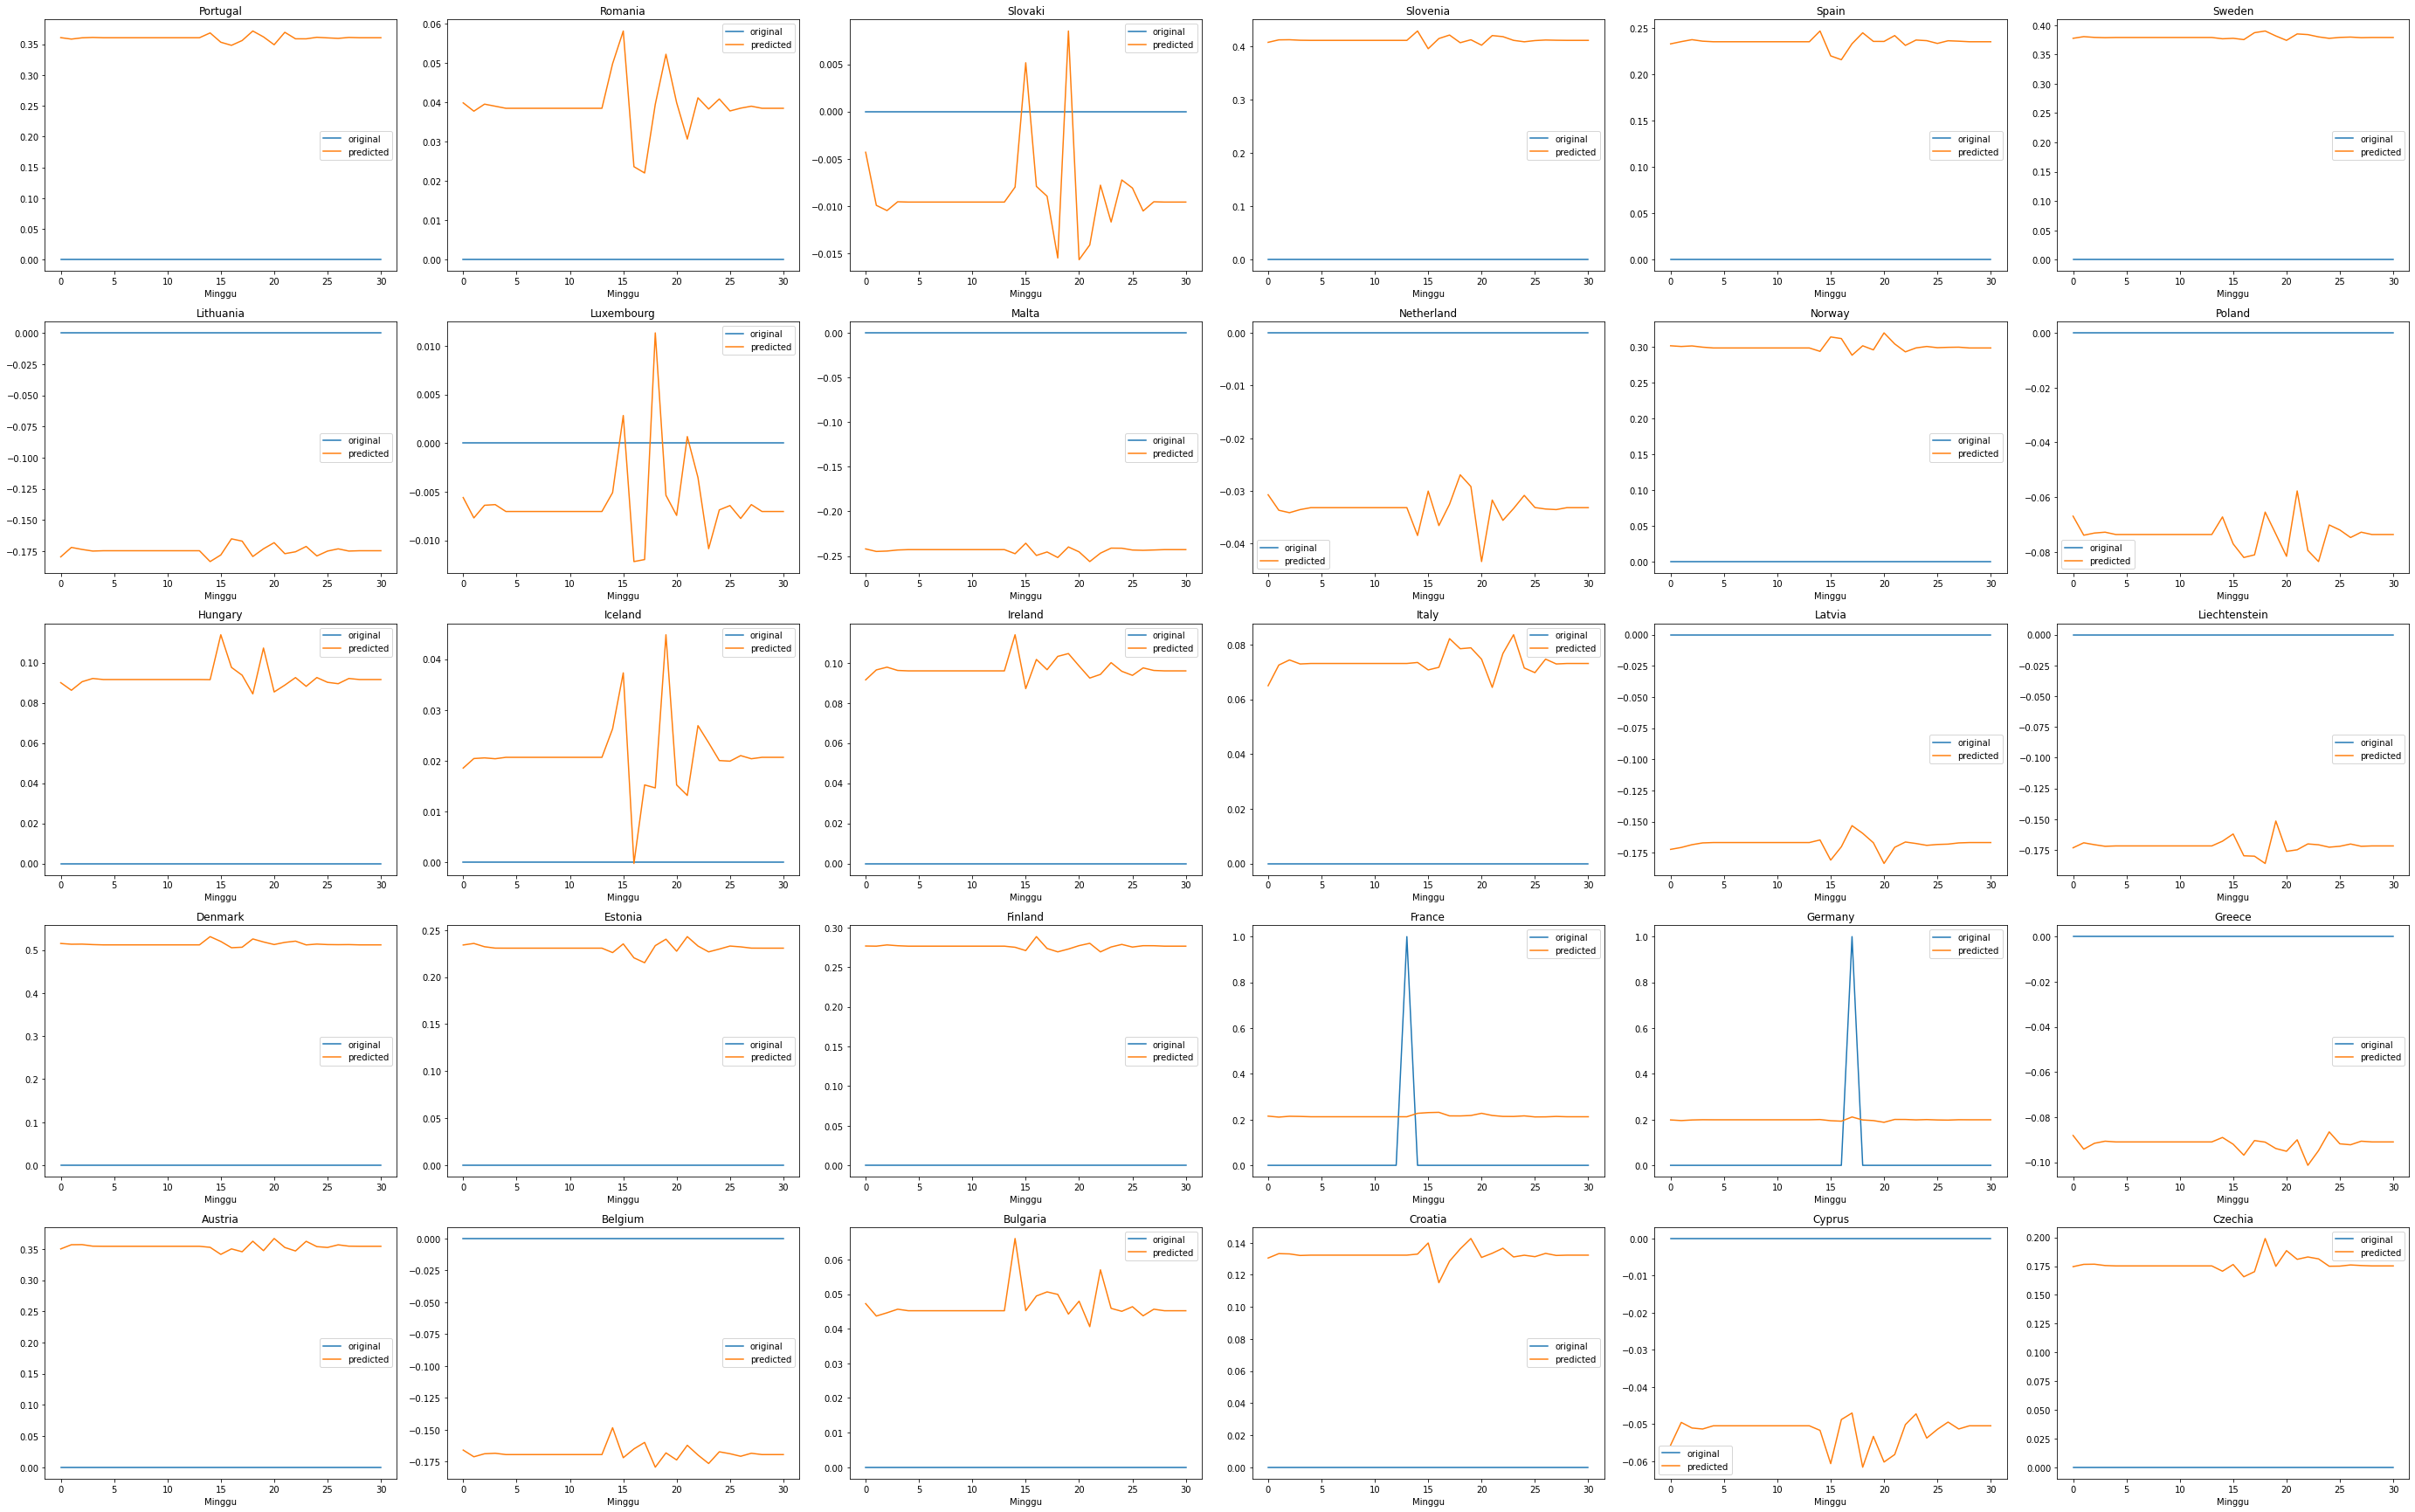

variant :  B.1.427/B.1.429 , model type :  lstm , epoch :  1 , MSE :  0.00955674983561039 , RMSE :  0.09775862842798233


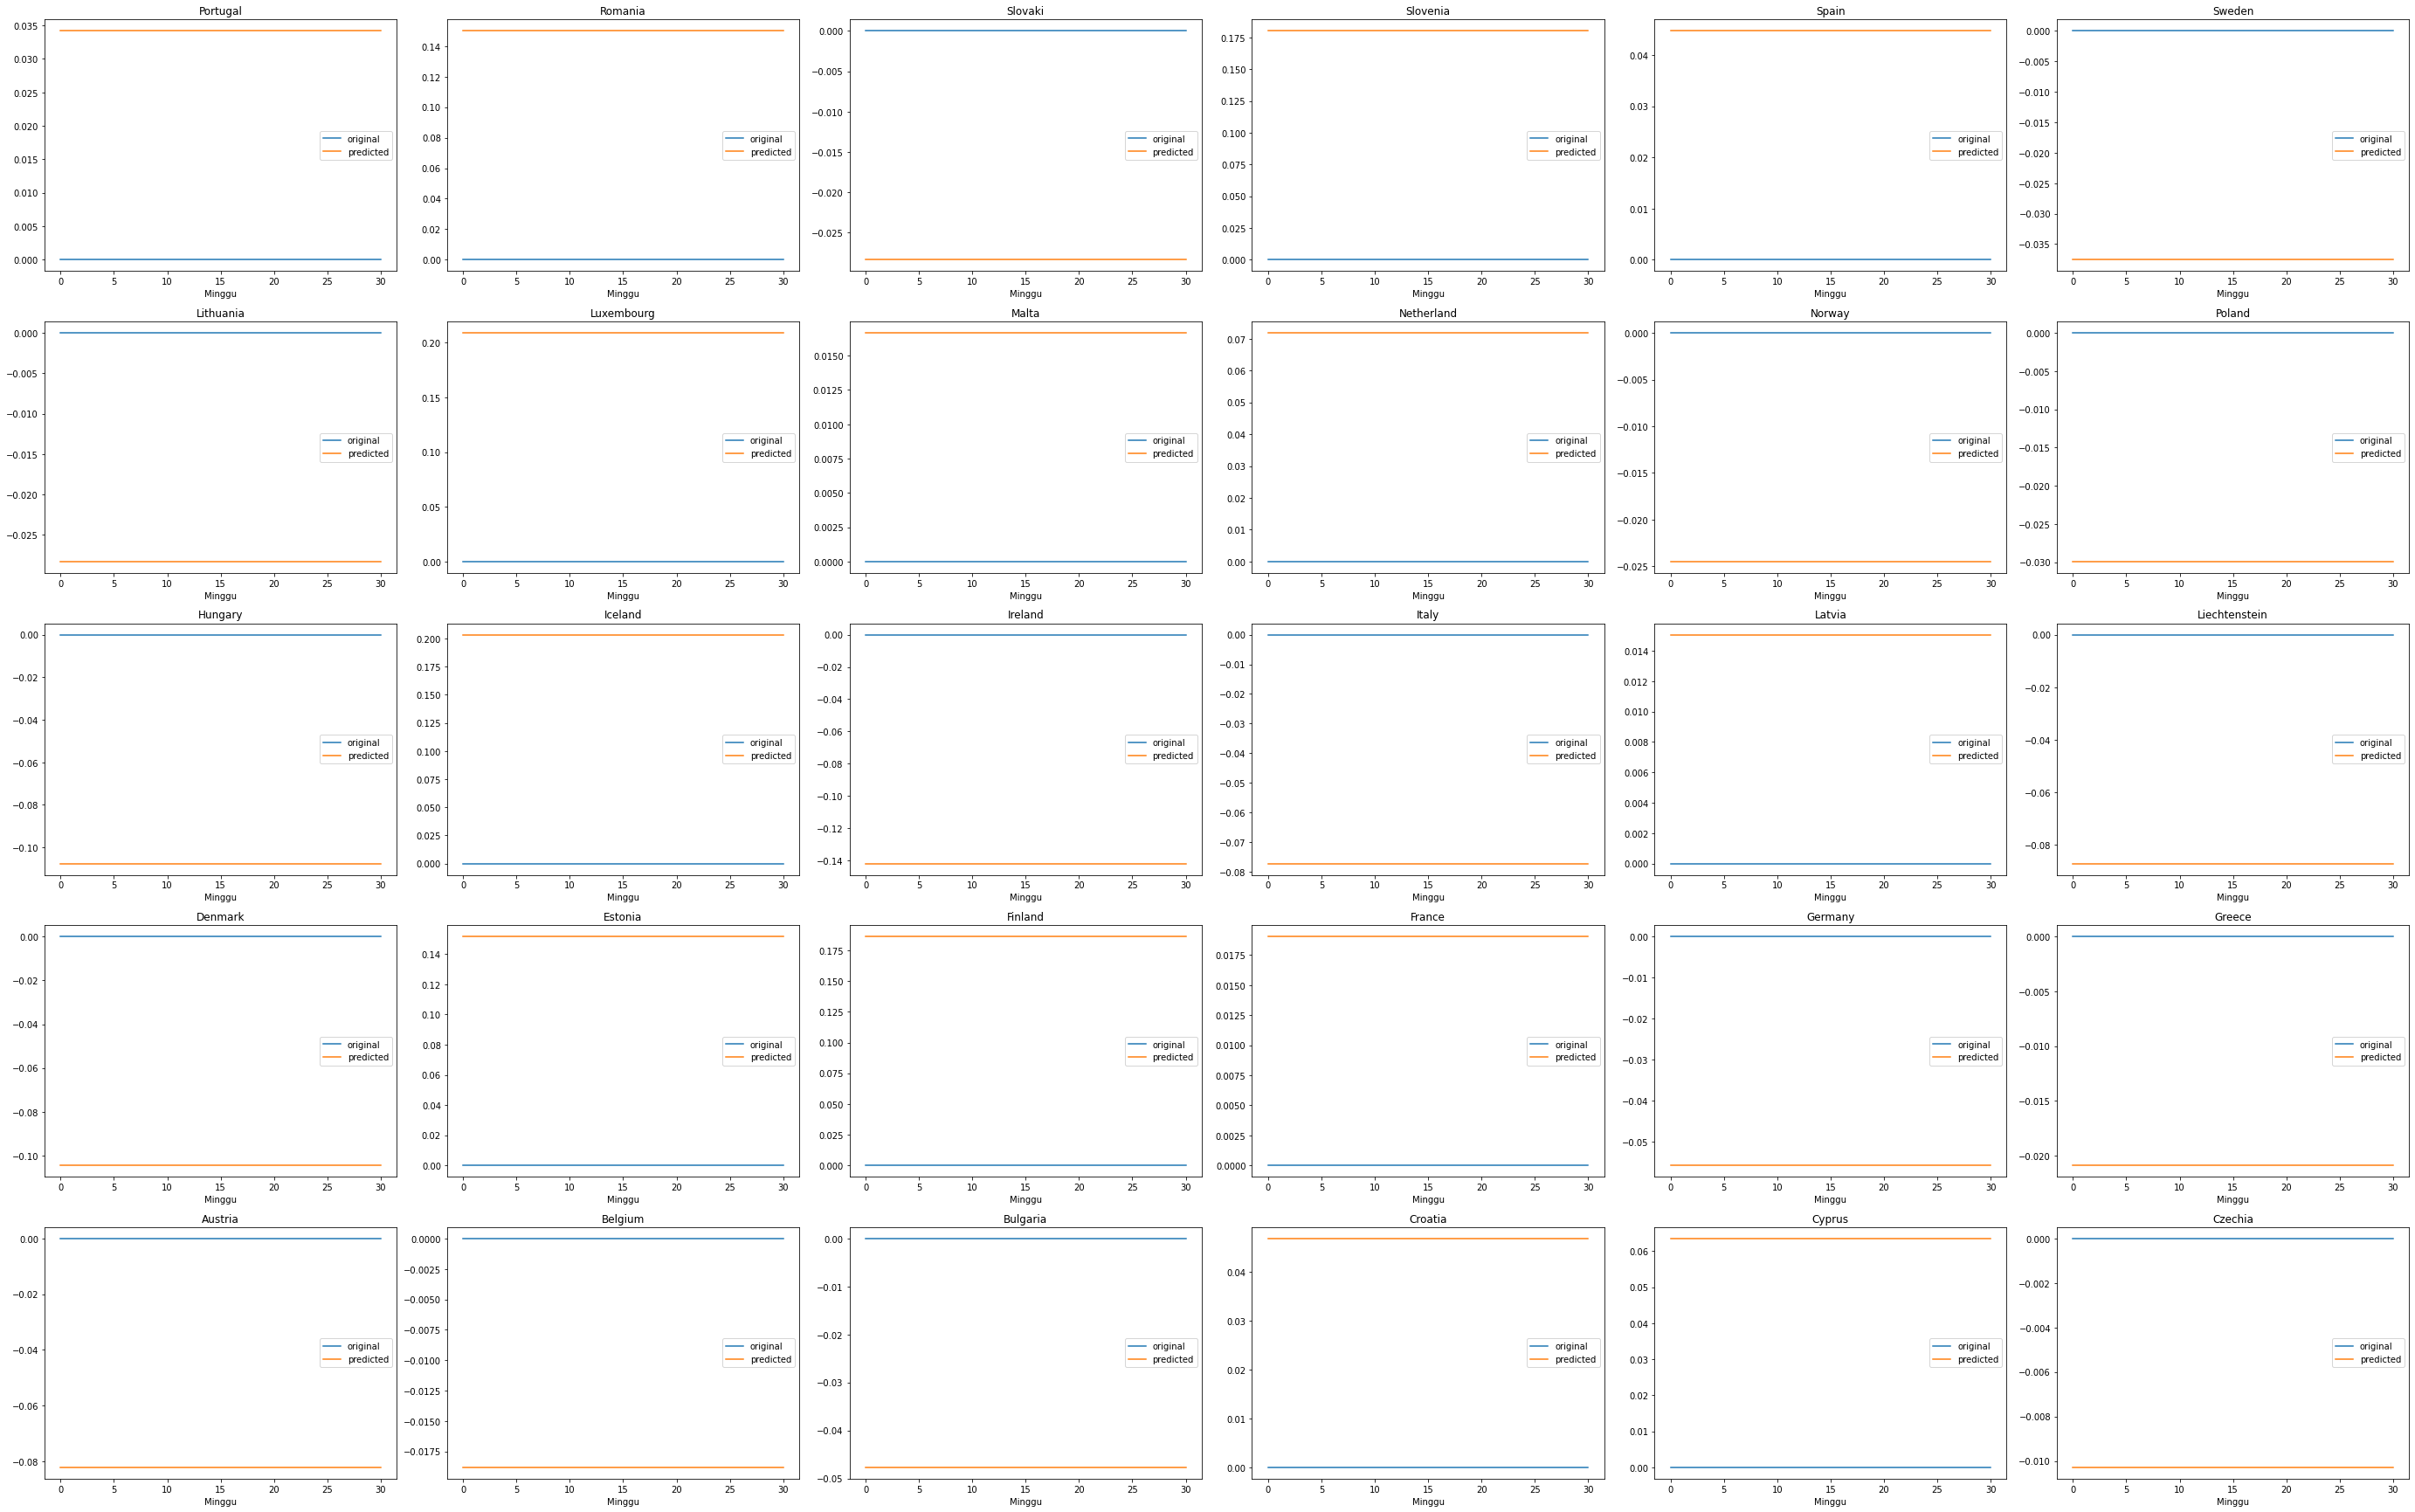

variant :  B.1.427/B.1.429 , model type :  bilstm , epoch :  1 , MSE :  0.008796708658337593 , RMSE :  0.09379076957702637


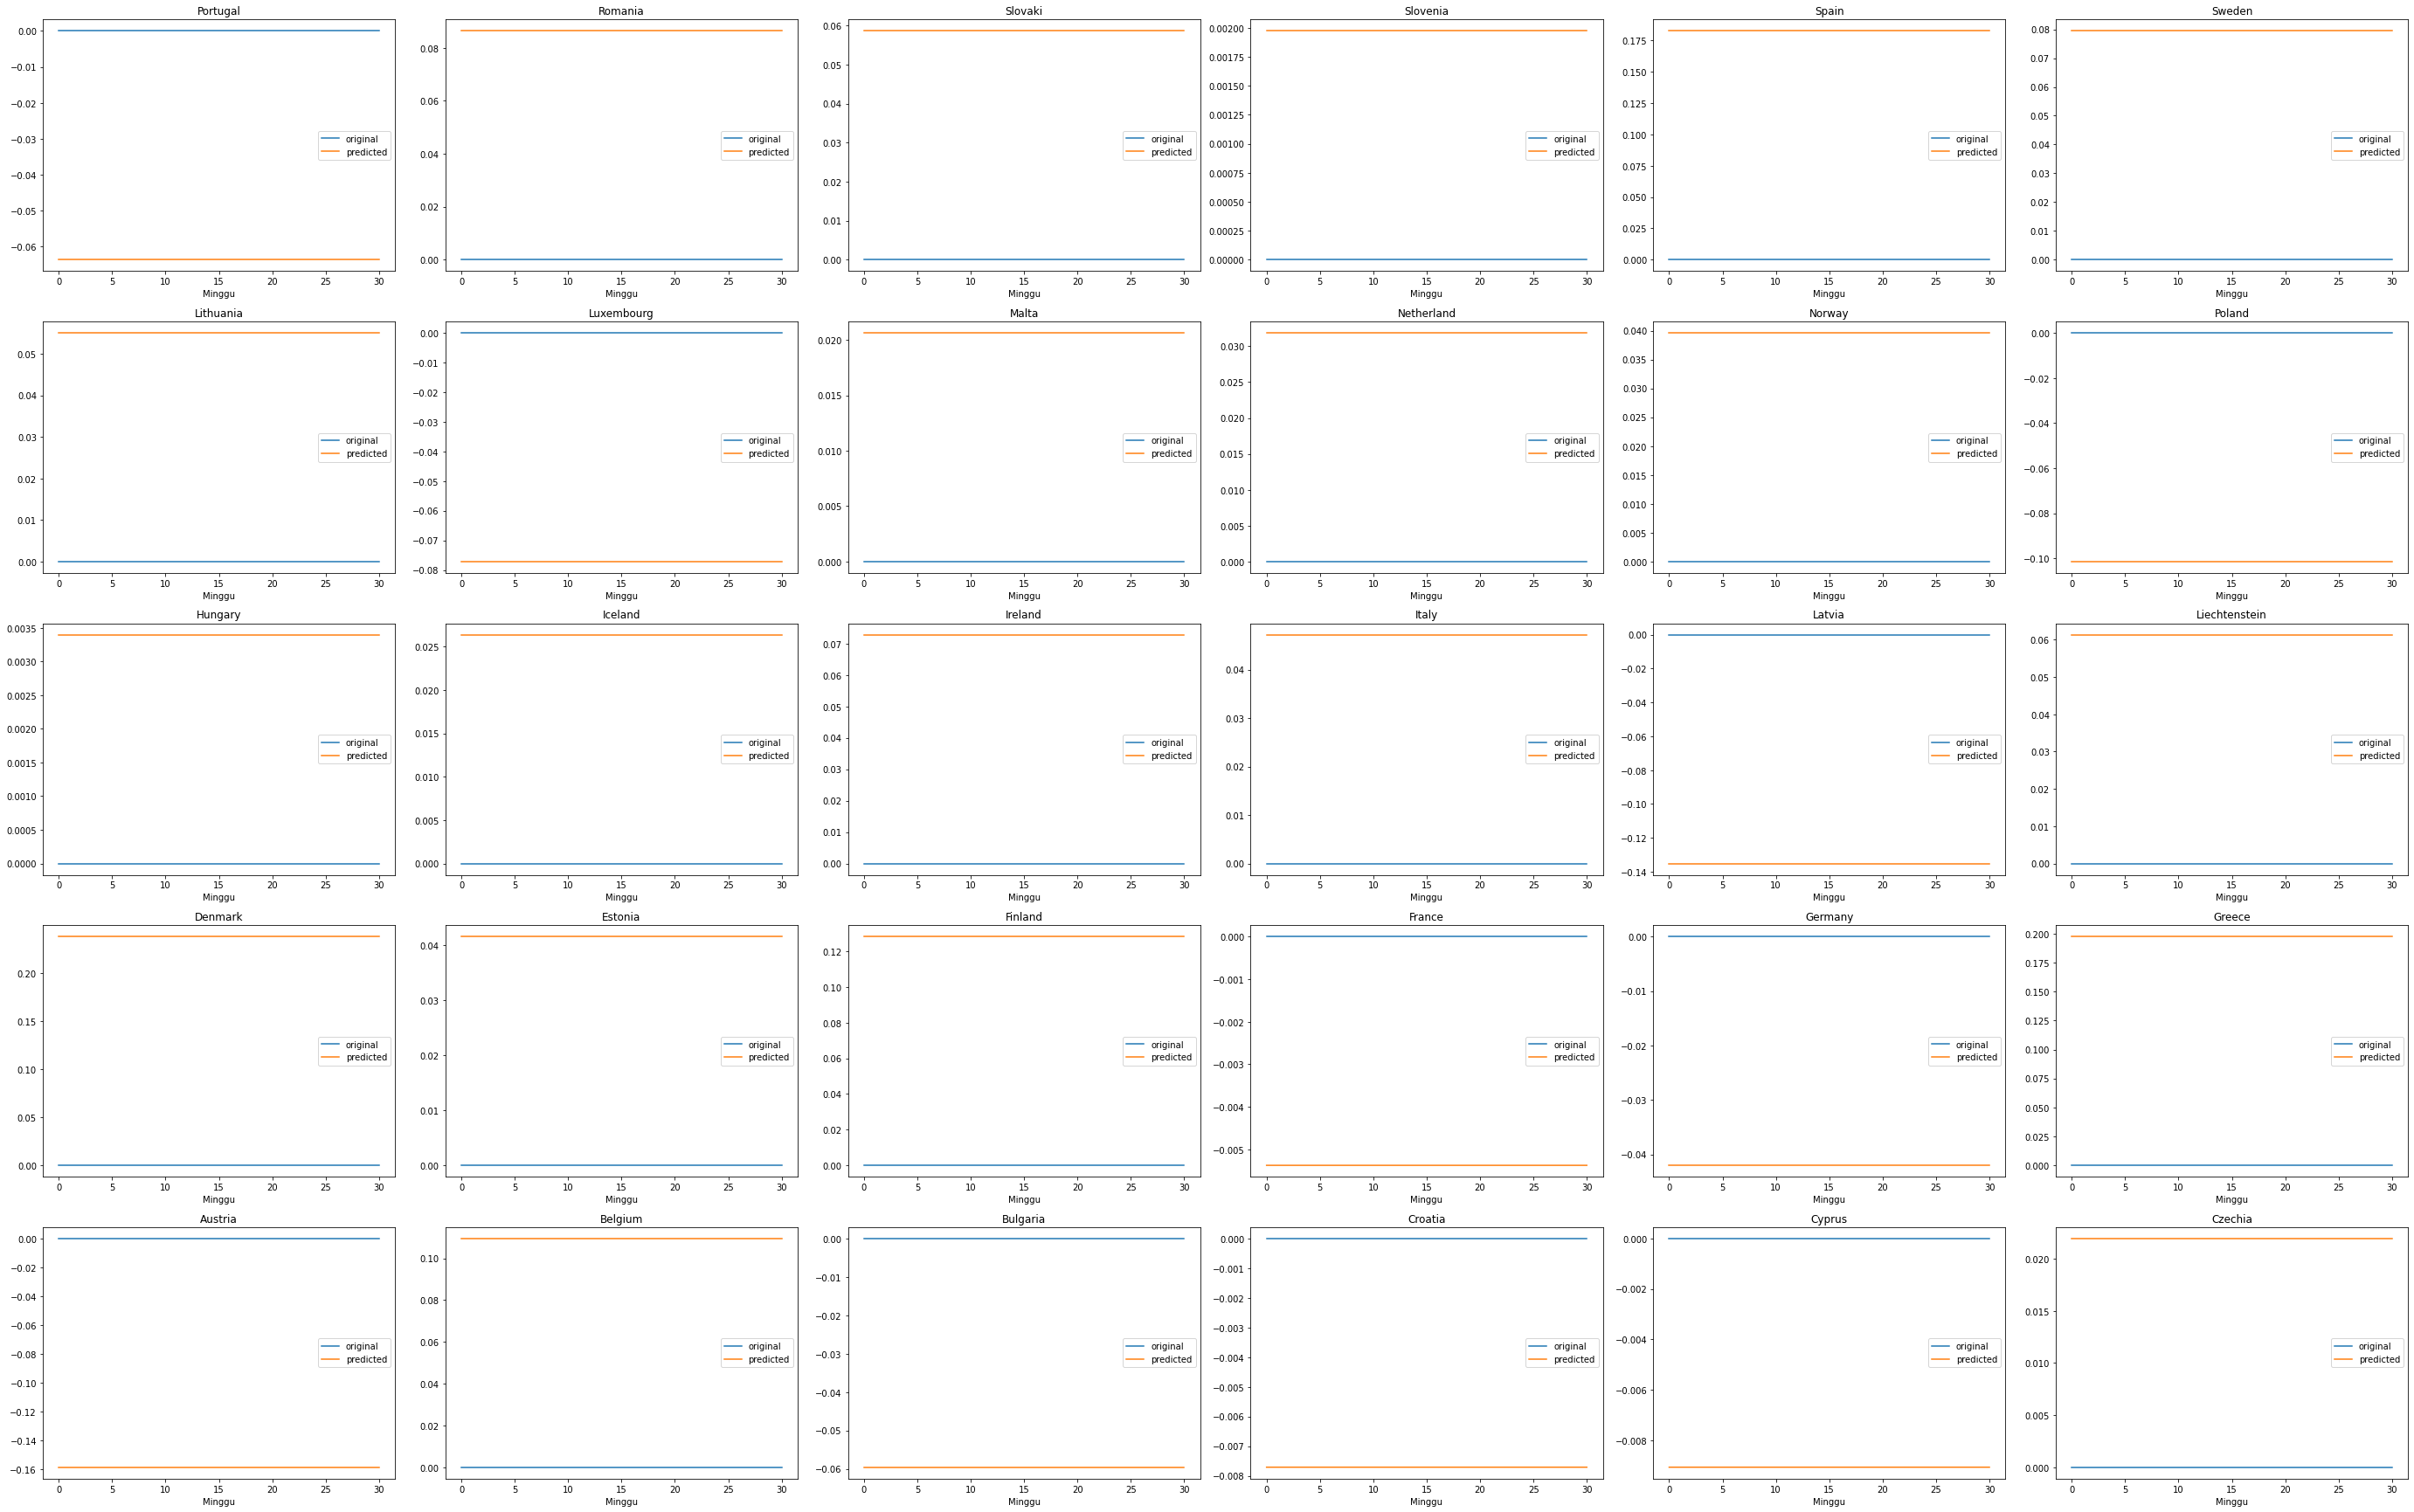

variant :  B.1.427/B.1.429 , model type :  rnn , epoch :  1 , MSE :  0.01979038305580616 , RMSE :  0.1406783014535904


KeyboardInterrupt: ignored

In [ ]:
# Test Process
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {}.".format(device))
mse_final_test = []
rmse_final_test = []
for k, test_data in enumerate(test_data_list):
    variant = variant_list[k]  # variant1, ...., variantn
    models = model_variant_list[k]
    mse_model_test = []
    rmse_model_test = []
    for model, model_name in models:
        model.to(device)
        criterion = nn.MSELoss()
        epochs = 1
        data = test_data
        x_test, y_test = multi_seq(data, 10)
        x_test, y_test = x_test.to(device), y_test.to(device)
        y_pred, loss, loss1 = testing_step(variant, model, model_name, x_test, y_test, criterion, epochs)
        mse_model_test.append(loss.item())
        rmse_model_test.append(loss1.item())
        y_test_t = y_test.T
        y_pred_t = y_pred.T
        fig = plt.figure(figsize=(16,4))
        for i, country in enumerate (y_pred.T):
            ax = fig.add_axes([0.4*(i%6), 1.2*(i//6), 0.35, 1])
            ax = plt.gca()
            ax.plot(y_test_t[i].cpu(), label="original")
            ax = plt.gca()
            ax.plot(y_pred_t[i].cpu().detach().numpy(), label="predicted")
            plt.xlabel('Minggu')
            plt.title(country_list[i])
            plt.legend()
        plt.show()
    mse_final_test.append(mse_model_test)
    rmse_final_test.append(rmse_model_test)      

## Loss Testing

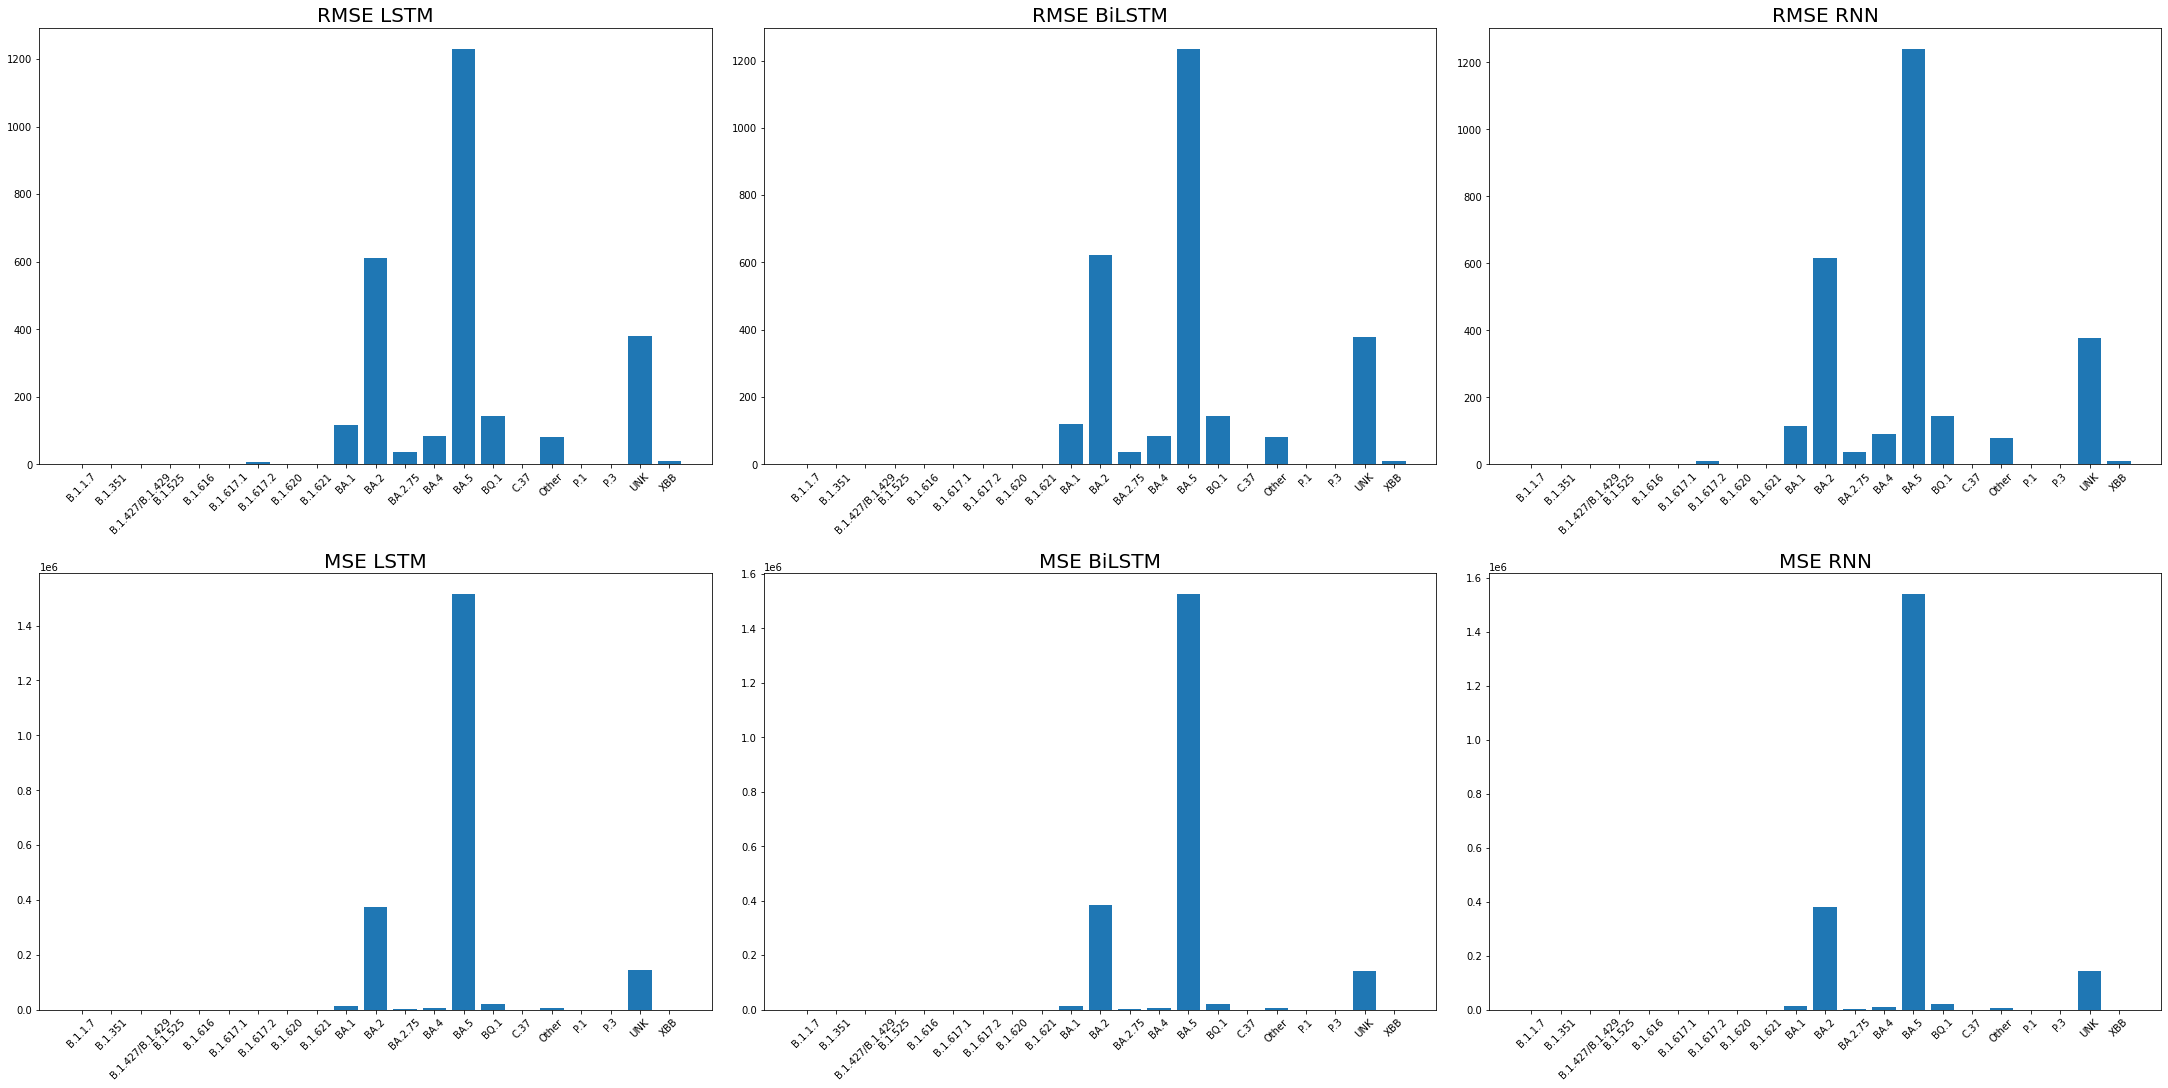


             Variant      MSE LSTM
0           B.1.1.7  6.400554e-02
1           B.1.351  5.621227e-03
2   B.1.427/B.1.429  8.121033e-06
3           B.1.525  9.584578e-04
4           B.1.616  4.826961e-06
5         B.1.617.1  4.321908e-05
6         B.1.617.2  5.780776e+01
7           B.1.620  2.635140e-05
8           B.1.621  5.116125e-05
9              BA.1  1.349464e+04
10             BA.2  3.744050e+05
11          BA.2.75  1.333268e+03
12             BA.4  7.192388e+03
13             BA.5  1.515525e+06
14             BQ.1  2.065429e+04
15             C.37  2.829311e-05
16            Other  6.334763e+03
17              P.1  2.968128e-04
18              P.3  1.806001e-05
19              UNK  1.430255e+05
20              XBB  9.391283e+01 
 
             Variant    MSE BiLSTM
0           B.1.1.7  6.836851e-01
1           B.1.351  1.148453e-02
2   B.1.427/B.1.429  9.478621e-06
3           B.1.525  1.231831e-04
4           B.1.616  4.000111e-06
5         B.1.617.1  3.248747e-05
6       

In [ ]:
mse_lstm_test = []
mse_bilstm_test = [] 
mse_rnn_test = []
for i in mse_final_test:
    mse_lstm_test.append(i[0])
    mse_bilstm_test.append(i[1])
    mse_rnn_test.append(i[2])

rmse_lstm_test = []
rmse_bilstm_test = [] 
rmse_rnn_test = []
for j in rmse_final_test:
    rmse_lstm_test.append(j[0])
    rmse_bilstm_test.append(j[1])
    rmse_rnn_test.append(j[2])

figure, axis1 = plt.subplots(2, 3, figsize=(30,15), constrained_layout = True)
plt.setp(axis1, xticks=tickvalues, xticklabels=variant_list)

axis1[0, 0].bar([k for k in range (len(rmse_lstm_test))], rmse_lstm_test)
axis1[0, 0].set_title("RMSE LSTM", fontsize=20)
axis1[0, 0].set_xticklabels(variant_list, rotation=45)
axis1[0, 1].bar([k for k in range (len(rmse_bilstm_test))], rmse_bilstm_test)
axis1[0, 1].set_title("RMSE BiLSTM", fontsize=20)
axis1[0, 1].set_xticklabels(variant_list, rotation=45)
axis1[0, 2].bar([k for k in range (len(rmse_rnn_test))], rmse_rnn_test)
axis1[0, 2].set_title("RMSE RNN", fontsize=20)
axis1[0, 2].set_xticklabels(variant_list, rotation=45)
axis1[1, 0].bar([k for k in range (len(mse_lstm_test))], mse_lstm_test)
axis1[1, 0].set_title("MSE LSTM", fontsize=20)
axis1[1, 0].set_xticklabels(variant_list, rotation=45)
axis1[1, 1].bar([k for k in range (len(mse_bilstm_test))], mse_bilstm_test)
axis1[1, 1].set_title("MSE BiLSTM", fontsize=20)
axis1[1, 1].set_xticklabels(variant_list, rotation=45)
axis1[1, 2].bar([k for k in range (len(mse_rnn_test))], mse_rnn_test)
axis1[1, 2].set_title("MSE RNN", fontsize=20)
axis1[1, 2].set_xticklabels(variant_list, rotation=45)
plt.show()

mse_lstm_test_df = pd.DataFrame({'Variant': variant_list,'MSE LSTM': mse_lstm_test})
mse_bilstm_test_df = pd.DataFrame({'Variant': variant_list,'MSE BiLSTM': mse_bilstm_test})
mse_rnn_test_df = pd.DataFrame({'Variant': variant_list,'MSE RNN': mse_rnn_test})
print("\n", mse_lstm_test_df, "\n", "\n", mse_bilstm_test_df, "\n", "\n", mse_rnn_test_df, "\n", "\n")

rmse_lstm_test_df = pd.DataFrame({'Variant': variant_list,'RMSE LSTM': rmse_lstm_test})
rmse_bilstm_test_df = pd.DataFrame({'Variant': variant_list,'RMSE BiLSTM': rmse_bilstm_test})
rmse_rnn_test_df = pd.DataFrame({'Variant': variant_list,'RMSE RNN': rmse_rnn_test})
print("\n", rmse_lstm_test_df, "\n", "\n", rmse_bilstm_test_df, "\n", "\n", rmse_rnn_test_df, "\n", "\n")

mean_mse_lstm_test = statistics.mean(mse_lstm_test)
mean_mse_bilstm_test = statistics.mean(mse_bilstm_test)
mean_mse_rnn_test = statistics.mean(mse_rnn_test)
print("Rata - rata Loss MSE tiap model:")
print("LSTM: ", mean_mse_lstm_test)
print("BiLSTM: ", mean_mse_bilstm_test)
print("RNN: ", mean_mse_rnn_test, "\n")

mean_rmse_lstm_test = statistics.mean(rmse_lstm_test)
mean_rmse_bilstm_test = statistics.mean(rmse_bilstm_test)
mean_rmse_rnn_test = statistics.mean(rmse_rnn_test)
print("Rata - Rata Loss RMSE tiap model")
print("LSTM: ", mean_rmse_lstm_test)
print("BiLSTM: ", mean_rmse_bilstm_test)
print("RNN: ", mean_rmse_rnn_test)